In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [2]:
df = pd.read_excel('/Users/yolanda/Downloads/excel_file1.xlsx')
df.set_index('year_month', inplace=True)

v = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_2.xlsx')
v.set_index('year_month', inplace=True)
w = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_4.xlsx')
w.set_index('year_month', inplace=True)
z = pd.read_excel('/Users/yolanda/Documents/Priority compartments/Grootfontein/master spreadsheets for compartment per cluster/cluster_5.xlsx')
z.set_index('year_month', inplace=True)

In [3]:
df['Abstraction'] = w['Usage']
df['D4N0834'] = w[' D4N0834']
df['D4N0111'] = v[' D4N0111']
df['D4N0122'] = v[' D4N0122']
df['D4N0037'] = v[' D4N0037']
df['D4N0115'] = z[' D4N0115']
df['D4N0110'] = z[' D4N0110']

In [4]:
df

Temperature  Precipitation  Discharge  Abstraction  \
year_month                                                       
1950-01-01        23.90           95.9        NaN          NaN   
1950-02-01        25.10           52.8        NaN          NaN   
1950-03-01        23.75           71.4        NaN          NaN   
1950-04-01        19.65           58.6        NaN          NaN   
1950-05-01        14.60           27.7        NaN          NaN   
...                 ...            ...        ...          ...   
2019-08-01          NaN            NaN        NaN          NaN   
2019-09-01          NaN            NaN        NaN          NaN   
2019-10-01          NaN            NaN        NaN          NaN   
2019-11-01          NaN            NaN        NaN          NaN   
2019-12-01          NaN            NaN        NaN          NaN   

            scenario_usage  scenario_precip100  scenario_precip200  \
year_month                                                           
1950-01-01             NaN                95.9                95.9   
1950-02-01             NaN                52.8                52.8   
1950-03-01             NaN                71.4                71.4   
1950-04-01             NaN                58.6                58.6   
1950-05-01             NaN                27.7                27.7   
...                    ...                 ...                 ...   
2019-08-01             0.0                 0.0                 0.0   
2019-09-01             0.0                 0.0                 0.0   
2019-10-01             0.0                 0.0                 0.0   
2019-11-01             0.0                 0.0                 0.0   
2019-12-01             0.0                 0.0                 0.0   

            scenario_preciphalf  precip_trend  trend_scenario100  \
year_month                                                         
1950-01-01                47.95           NaN                NaN   
1950-02-01                26.40           NaN                NaN   
1950-03-01                35.70           NaN                NaN   
1950-04-01                29.30           NaN                NaN   
1950-05-01                13.85           NaN                NaN   
...                         ...           ...                ...   
2019-08-01                 0.00           NaN                NaN   
2019-09-01                 0.00           NaN                NaN   
2019-10-01                 0.00           NaN                NaN   
2019-11-01                 0.00           NaN                NaN   
2019-12-01                 0.00           NaN                NaN   

            trend_scenario200  trend_scenariohalf  D4N0834  D4N0111  D4N0122  \
year_month                                                                     
1950-01-01                NaN                 NaN      NaN      NaN      NaN   
1950-02-01                NaN                 NaN      NaN      NaN      NaN   
1950-03-01                NaN                 NaN      NaN      NaN      NaN   
1950-04-01                NaN                 NaN      NaN      NaN      NaN   
1950-05-01                NaN                 NaN      NaN      NaN      NaN   
...                       ...                 ...      ...      ...      ...   
2019-08-01                NaN                 NaN      NaN      NaN      NaN   
2019-09-01                NaN                 NaN      NaN      NaN      NaN   
2019-10-01                NaN                 NaN      NaN      NaN      NaN   
2019-11-01                NaN                 NaN      NaN      NaN      NaN   
2019-12-01                NaN                 NaN      NaN      NaN      NaN   

            D4N0037  D4N0115  D4N0110  
year_month                             
1950-01-01      NaN      NaN      NaN  
1950-02-01      NaN      NaN      NaN  
1950-03-01      NaN      NaN      NaN  
1950-04-01      NaN      NaN      NaN  
1950-05-01      NaN      NaN      NaN  
...             ...      ...      ..

In [5]:
df = df[['D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' ,'Temperature' ,'precip_trend' ,'Discharge' ,'Abstraction']]

In [6]:
df

D4N0834  D4N0111  D4N0122  D4N0037  D4N0115  D4N0110  Temperature  \
year_month                                                                      
1950-01-01      NaN      NaN      NaN      NaN      NaN      NaN        23.90   
1950-02-01      NaN      NaN      NaN      NaN      NaN      NaN        25.10   
1950-03-01      NaN      NaN      NaN      NaN      NaN      NaN        23.75   
1950-04-01      NaN      NaN      NaN      NaN      NaN      NaN        19.65   
1950-05-01      NaN      NaN      NaN      NaN      NaN      NaN        14.60   
...             ...      ...      ...      ...      ...      ...          ...   
2019-08-01      NaN      NaN      NaN      NaN      NaN      NaN          NaN   
2019-09-01      NaN      NaN      NaN      NaN      NaN      NaN          NaN   
2019-10-01      NaN      NaN      NaN      NaN      NaN      NaN          NaN   
2019-11-01      NaN      NaN      NaN      NaN      NaN      NaN          NaN   
2019-12-01      NaN      NaN      NaN      NaN      NaN      NaN          NaN   

            precip_trend  Discharge  Abstraction  
year_month                                        
1950-01-01           NaN        NaN          NaN  
1950-02-01           NaN        NaN          NaN  
1950-03-01           NaN        NaN          NaN  
1950-04-01           NaN        NaN          NaN  
1950-05-01           NaN        NaN          NaN  
...                  ...        ...          ...  
2019-08-01           NaN        NaN          NaN  
2019-09-01           NaN        NaN          NaN  
2019-10-01           NaN        NaN          NaN  
2019-11-01           NaN        NaN          NaN  
2019-12-01           NaN        NaN          NaN  

[840 rows x 10 columns]

In [7]:
f = lambda x: -x; 
gwls = df[['D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' ]].apply(f, axis=1)

#### checking when each varibale starts and ends 

In [8]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
gwls.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


D4N0834    D4N0111    D4N0122    D4N0037    D4N0115    D4N0110
0 1986-09-01 1976-01-01 1975-05-01 1973-08-01 1975-05-01 1976-11-01
1 2005-01-01 2009-11-01 2003-11-01 2012-02-01 2005-03-01 2000-01-01

#### Limiting period based on minimum start of all 6 bh's and maximum finish of all 6 bh's

In [9]:

gwls = gwls[gwls.index > '1973-09-01']  
gwls = gwls[gwls.index < '2012-03-01']  

#### These boreholes are the onles with less that 32% missing data. 

Text(0, 0.5, 'Groundwater levels')

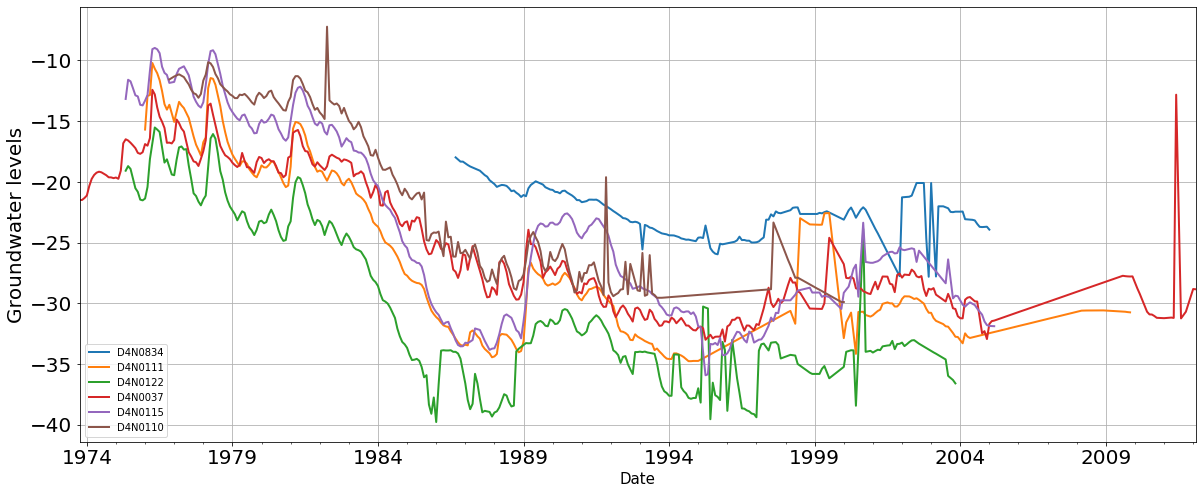

In [10]:
#visual illustration just to show all groundwater levels 

gwls.plot(figsize=(20,8), linewidth=2, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


In [11]:
gwls['Temperature'] = df['Temperature']
gwls['precip_trend'] = df['precip_trend']
gwls['Discharge'] = df['Discharge']
gwls['Abstraction'] = df['Abstraction']
gwls

D4N0834  D4N0111  D4N0122    D4N0037  D4N0115  D4N0110  \
year_month                                                           
1973-10-01      NaN      NaN      NaN -21.500000      NaN      NaN   
1973-11-01      NaN      NaN      NaN -21.500000      NaN      NaN   
1973-12-01      NaN      NaN      NaN -21.340000      NaN      NaN   
1974-01-01      NaN      NaN      NaN -21.130000      NaN      NaN   
1974-02-01      NaN      NaN      NaN -20.347500      NaN      NaN   
...             ...      ...      ...        ...      ...      ...   
2011-10-01      NaN      NaN      NaN -30.700000      NaN      NaN   
2011-11-01      NaN      NaN      NaN -30.069891      NaN      NaN   
2011-12-01      NaN      NaN      NaN -29.460109      NaN      NaN   
2012-01-01      NaN      NaN      NaN -28.830000      NaN      NaN   
2012-02-01      NaN      NaN      NaN -28.850000      NaN      NaN   

            Temperature  precip_trend  Discharge   Abstraction  
year_month                                                      
1973-10-01        21.00     73.158333      0.091  4.519858e+04  
1973-11-01        22.05     73.116667      0.096  4.519858e+04  
1973-12-01        22.80     73.116667      0.096  4.519858e+04  
1974-01-01        23.60     73.045833      0.088  7.444367e+04  
1974-02-01        23.50     71.141667      0.079  7.444367e+04  
...                 ...           ...        ...           ...  
2011-10-01        19.30     44.183333      0.644  2.424806e+06  
2011-11-01        21.50     38.333333      0.633  2.424806e+06  
2011-12-01        22.00     35.783333      0.629  2.424806e+06  
2012-01-01        23.35     34.008333      0.612  2.417254e+06  
2012-02-01        22.70     33.908333      0.588  2.417254e+06  

[461 rows x 10 columns]

### Reframing length of dataset based on bhid D4N0037 start and end dates 

In [12]:
pima = gwls.filter(['D4N0037', 'Temperature', 'precip_trend', 'Discharge', 'Abstraction'])
pima = pima[pima.index > '1973-11-01']  
pima = pima[pima.index < '2005-01-01'] 

In [13]:
pima.apply(lambda x: sum(x.isnull()), axis=0)

D4N0037          0
Temperature     13
precip_trend     0
Discharge       65
Abstraction      0
dtype: int64

#### Interpolating independant varibales only 

In [14]:
pima['Discharge']= pima['Discharge'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())
pima['precip_trend']= pima['precip_trend'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())
pima['Temperature']= pima['Temperature'].interpolate(limit_direction='both', method='time').mask(pima.bfill().isna())

In [15]:
#pima.to_excel('/Users/yolanda/Downloads/BHID_D4N0037.xlsx')

#### Calculating start and end dates for new dataframa

In [16]:
result_dict = {}
def check_date(column):
    x = column.notnull()
    print(type(column[x]))
    result_dict[column.name] = [column[x].head(1).index[0], 
    column[x].tail(1).index[0]]
    
pima.apply(check_date)
dates = pd.DataFrame(result_dict)
dates

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


D4N0037 Temperature precip_trend  Discharge Abstraction
0 1973-12-01  1973-12-01   1973-12-01 1973-12-01  1973-12-01
1 2004-12-01  2004-12-01   2004-12-01 2004-12-01  2004-12-01

### Mutual information stats

In [17]:
from sklearn.feature_selection import mutual_info_regression

In [18]:
X = pima[['Temperature', 'precip_trend', 'Discharge','Abstraction']] # Features
y = pima[['D4N0037']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

In [19]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Temperature     0.000000
precip_trend    0.340854
Discharge       0.602619
Abstraction     1.000000
dtype: float64

## LAG TESTING 

In [20]:
precip037  = pima.filter(['D4N0037', 'precip_trend'])
discha037  = pima.filter(['D4N0037', 'Discharge'])
temp037    = pima.filter(['D4N0037', 'Temperature'])
abstr037   = pima.filter(['D4N0037', 'Abstraction'])

In [21]:
lags = range(1, 24)  # 2year lag

# precip_trend
precip0037 = precip037.assign(**{ '{} (t-{})'.format([ 'precip_trend'], t): precip037[[ 'precip_trend']].shift(t) for t in lags for col in precip037})
# disharge
discha0037 = discha037.assign(**{ '{} (t-{})'.format([ 'Discharge'], t): discha037[[ 'Discharge']].shift(t) for t in lags for col in discha037})
# temperature
temp0037 = temp037.assign(**{ '{} (t-{})'.format([ 'Temperature'], t): temp037[[ 'Temperature']].shift(t) for t in lags for col in temp037})
# abstraction
abstr0037 = abstr037.assign(**{ '{} (t-{})'.format([ 'Abstraction'], t): abstr037[[ 'Abstraction']].shift(t) for t in lags for col in abstr037})

## Cross Correlation

- degree of similarity between two time series in different times or space 
- lag is considred since time is under investigation

### Rainfall

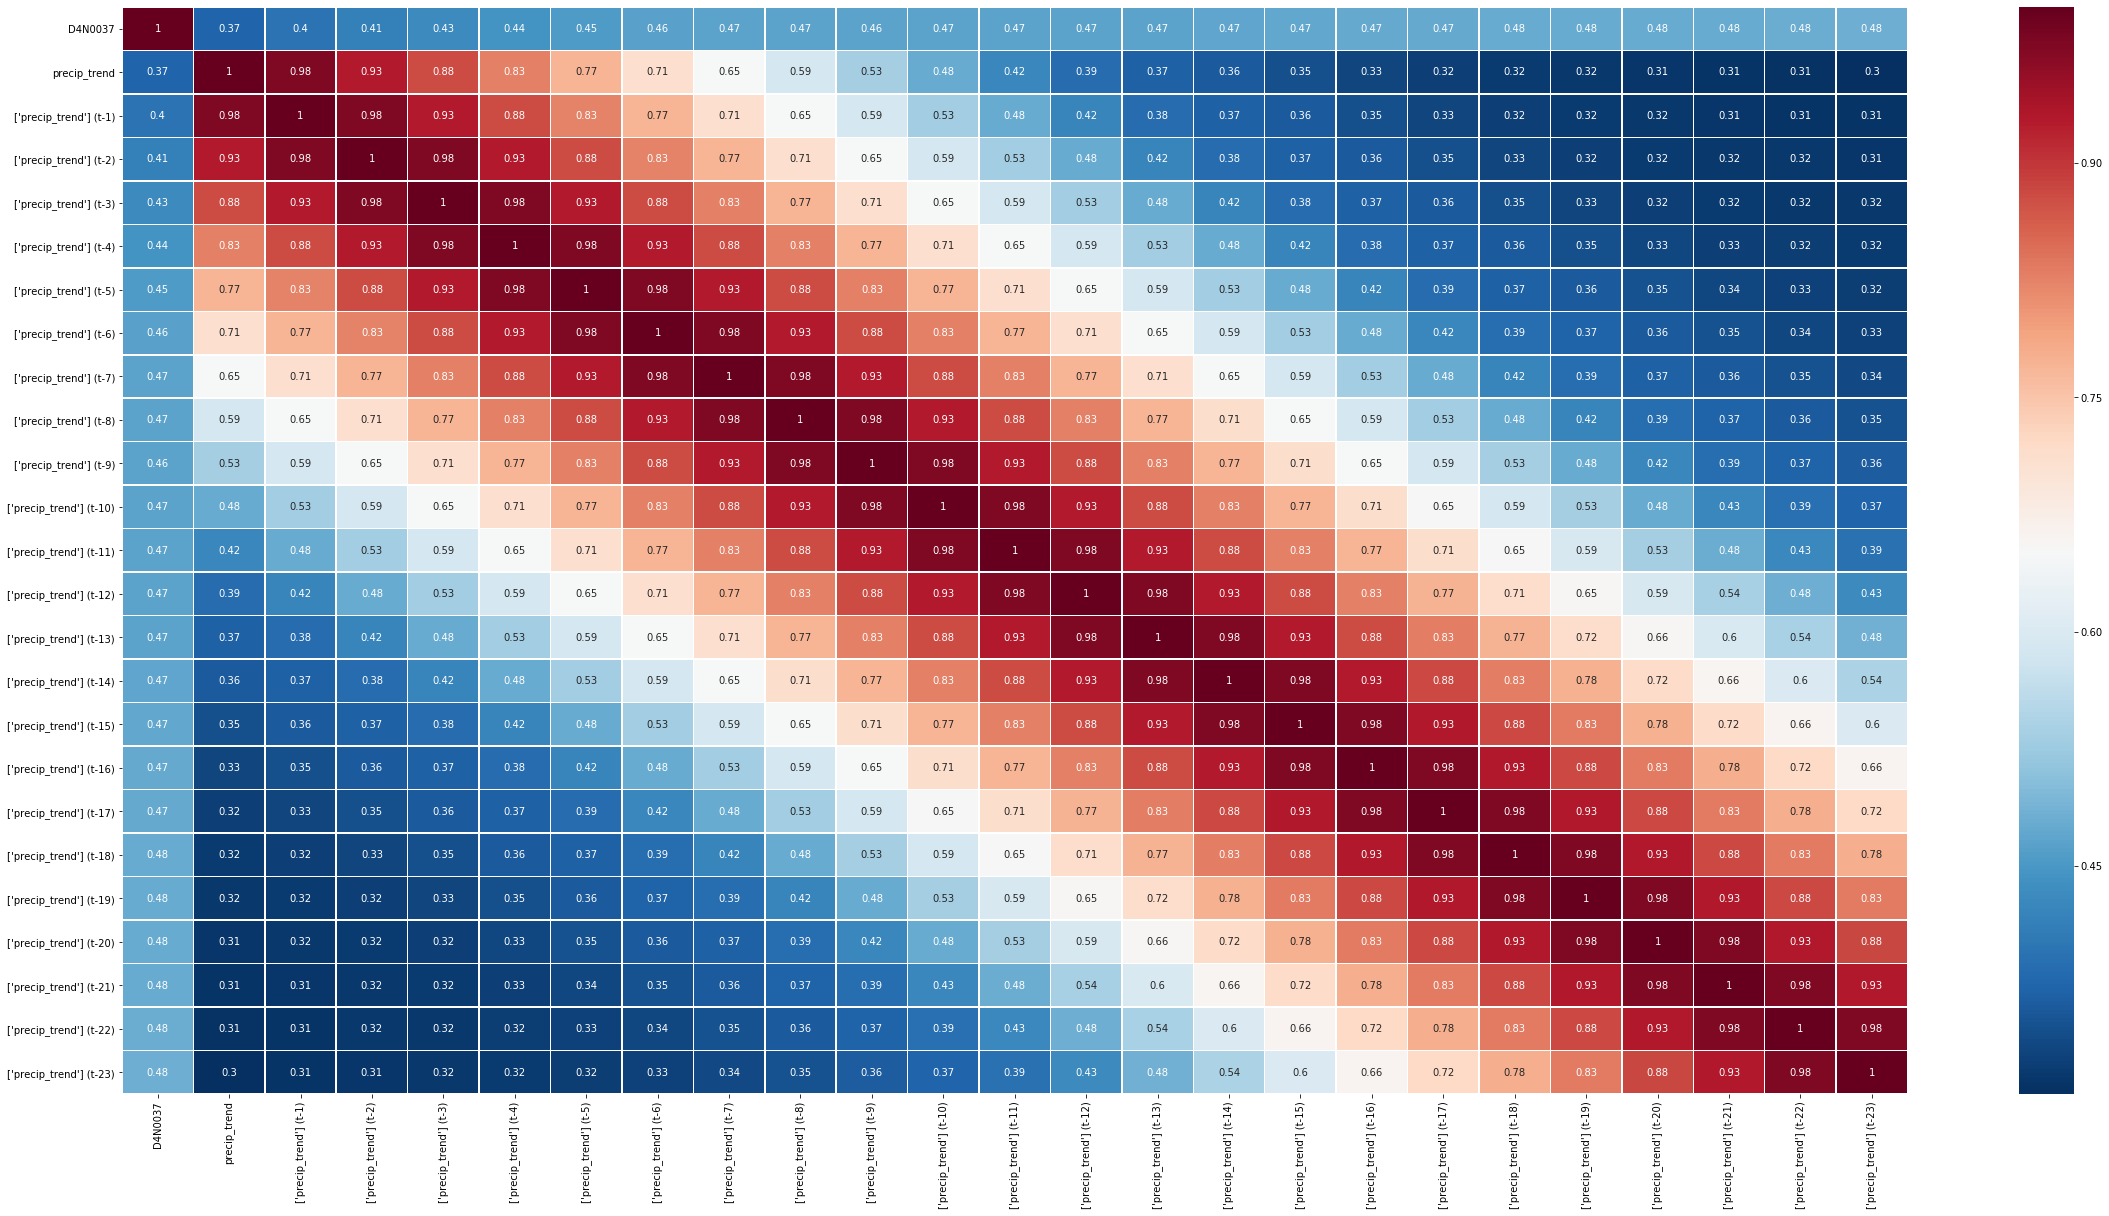

In [22]:
# precip0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = precip0037.corr(method = 'spearman')
corrm2 = precip0037.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

### Discharge

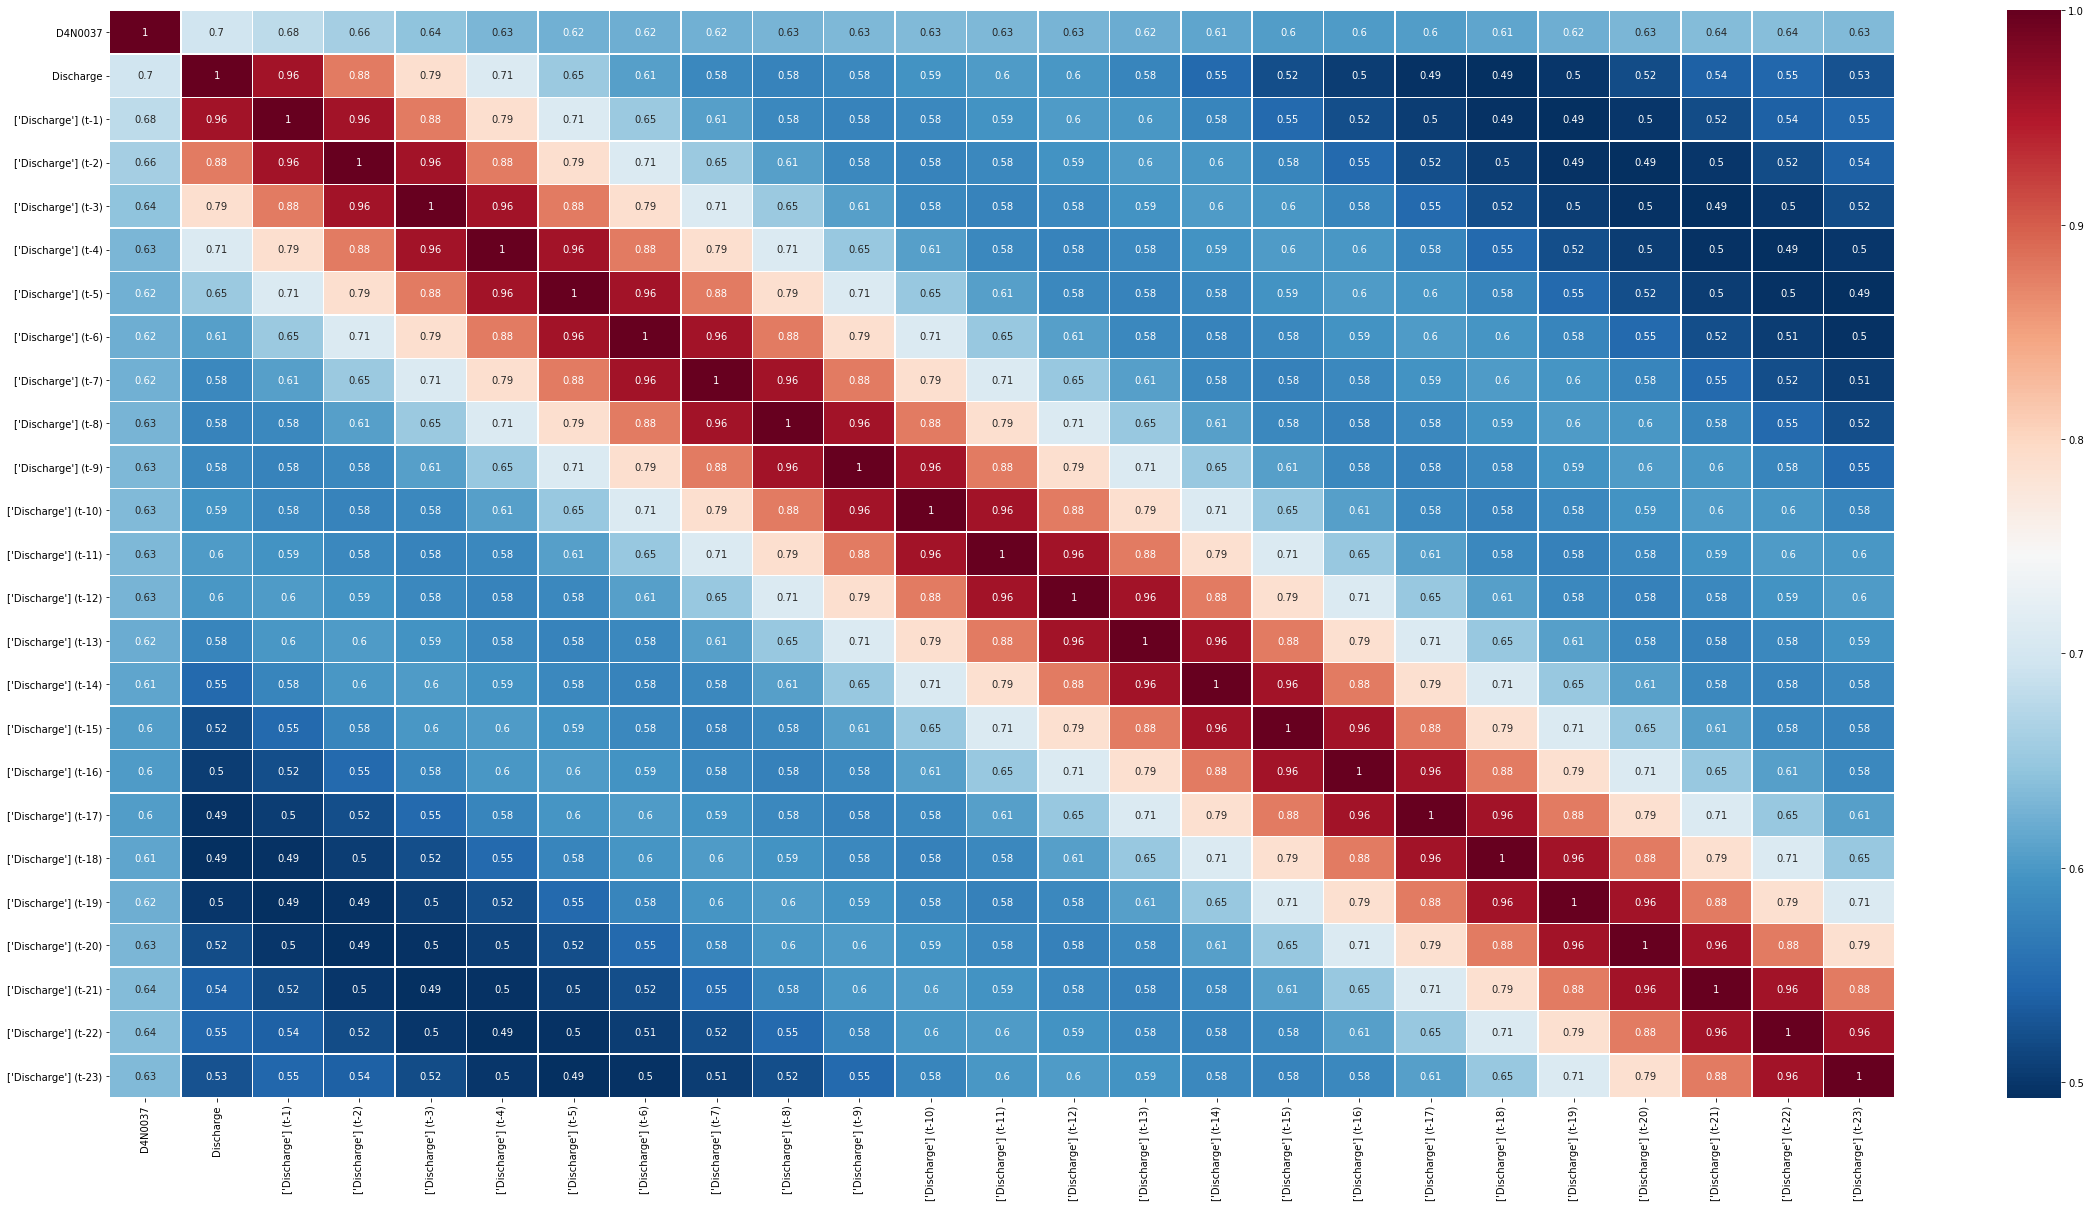

In [23]:
# temp0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = discha0037.corr(method = 'spearman')
corrm2 = discha0037.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

### Temperature

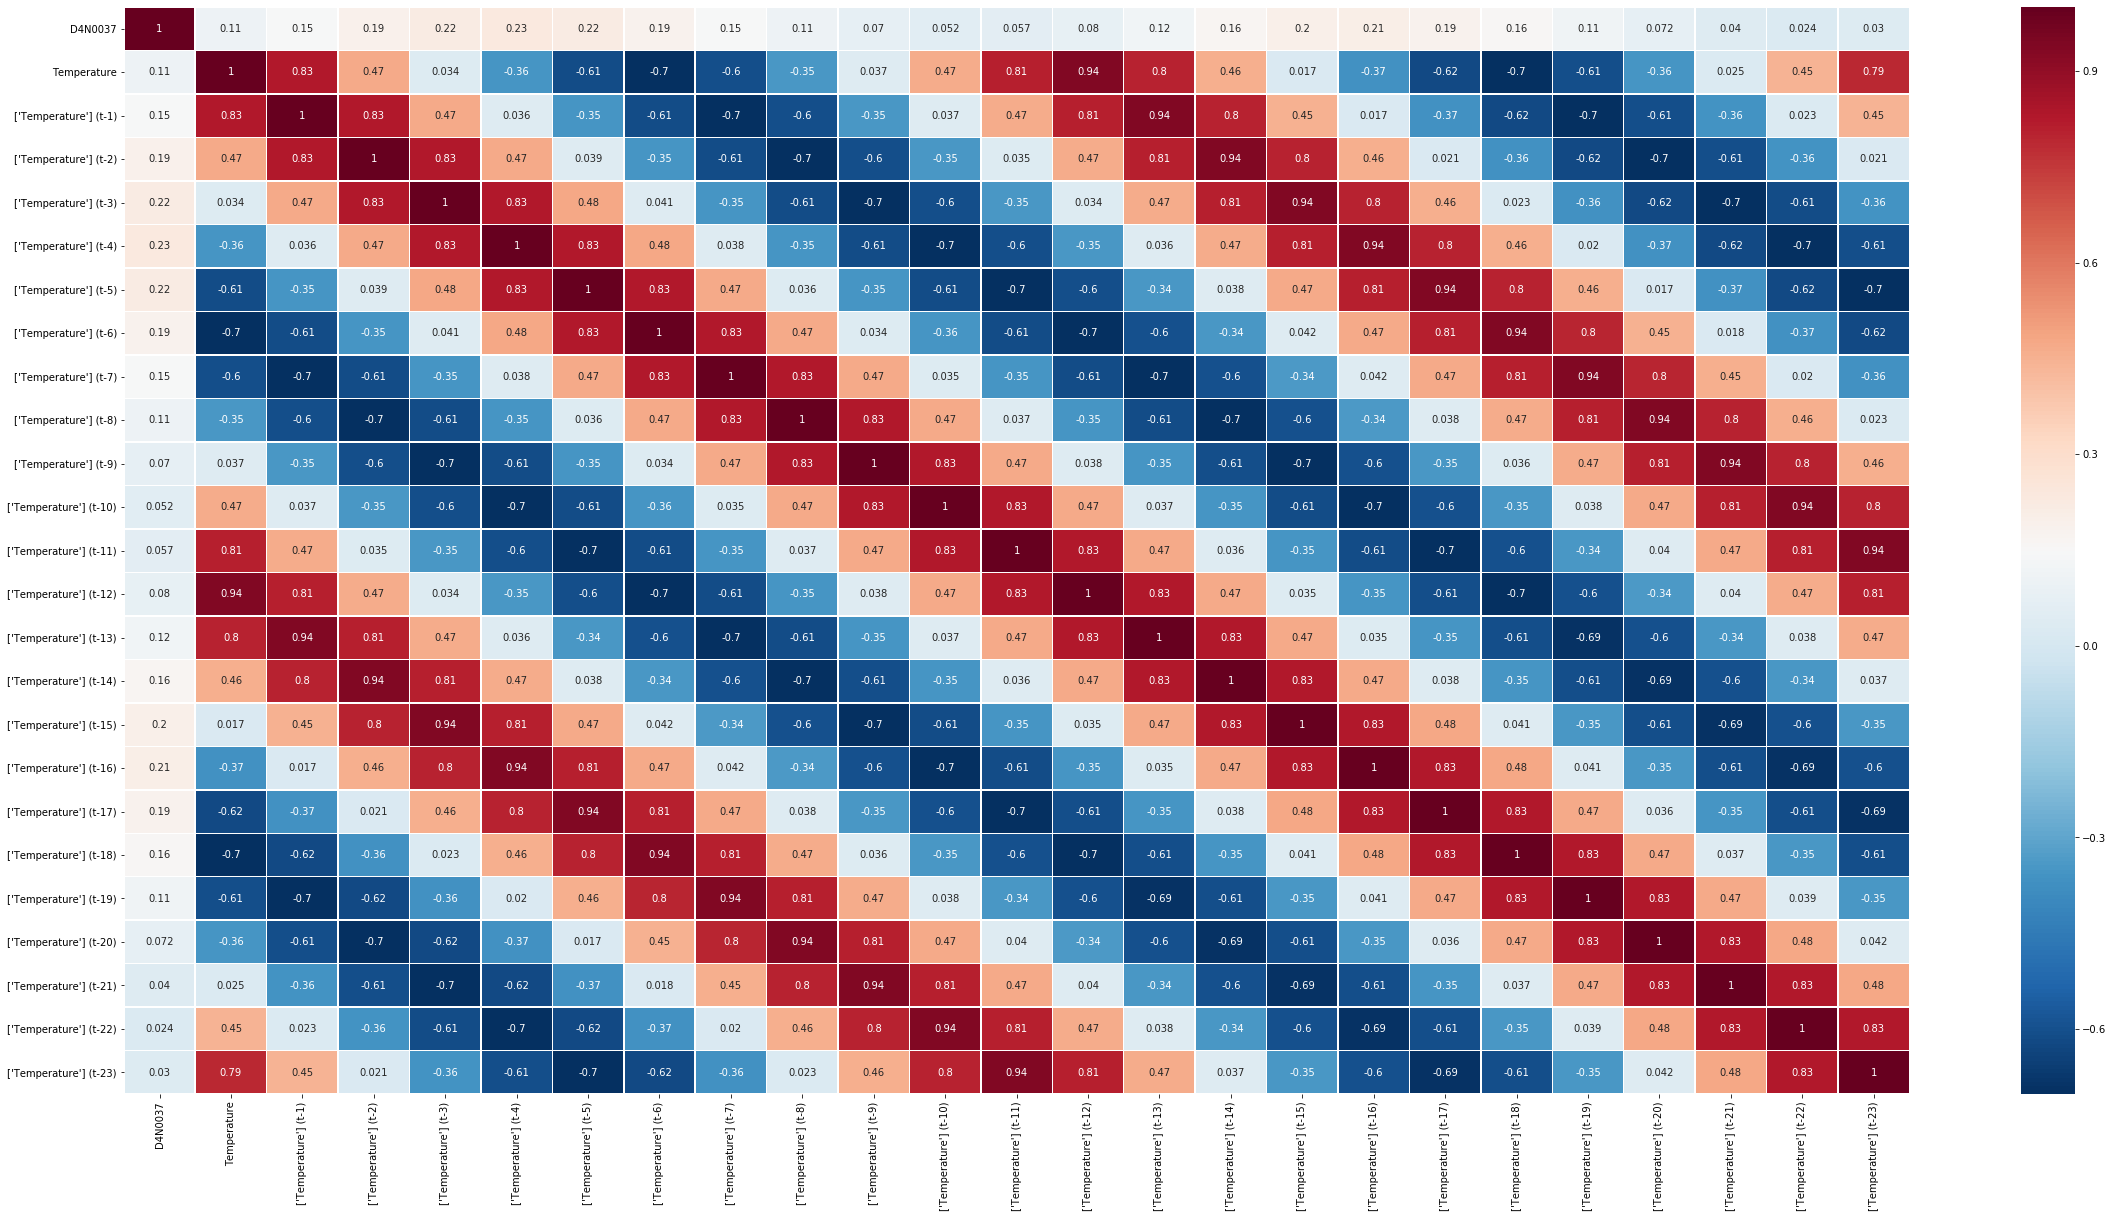

In [24]:
# temp0834 , 0111, 0122 , 0037, 0115, 0110

import seaborn as sns
corrm1 = temp0037.corr(method = 'spearman')
corrm2 = temp0037.corr(method = 'pearson')
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(40,20))         # Sample figsize in inches

sns.heatmap(corrm2, 
            xticklabels=corrm2.columns,
            yticklabels=corrm2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

#A co-efficient close to 1 means that there’s a very strong positive correlation between the two variables.
#In our case, the maroon shows very strong correlations. 
#The diagonal line is the correlation of the variables to themselves — so they’ll obviously be 1.
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

#### Shifting variables based on lag variables 

In [25]:
#pima=pima.drop(['Temperature (t-4)'], axis=1)
#pima=pima.drop(['precip_trend (t-3)'], axis=1)
#pima

In [26]:
pima['Temperature (t-3)'] = pima.Temperature.shift(7)
pima['precip_trend (t-3)'] = pima.precip_trend.shift(5)
#pima = pima['Discharge (t-6)'].drop(axis=1)
pima

D4N0037  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                  
1973-12-01 -21.340000        22.80     73.116667      0.096  4.519858e+04   
1974-01-01 -21.130000        23.60     73.045833      0.088  7.444367e+04   
1974-02-01 -20.347500        23.50     71.141667      0.079  7.444367e+04   
1974-03-01 -19.760000        21.75     68.741667      0.211  7.444367e+04   
1974-04-01 -19.440000        18.25     70.870833      0.399  7.444367e+04   
...               ...          ...           ...        ...           ...   
2004-08-01 -29.860000        14.60     55.216667      0.367  2.572182e+06   
2004-09-01 -31.188020        15.55     50.758333      0.355  2.572182e+06   
2004-10-01 -32.473200        20.35     49.933333      0.349  2.572182e+06   
2004-11-01 -32.298778        23.75     53.341667      0.344  2.572182e+06   
2004-12-01 -32.950000        23.10     53.633333      0.341  2.572182e+06   

            Temperature (t-3)  precip_trend (t-3)  
year_month                                         
1973-12-01                NaN                 NaN  
1974-01-01                NaN                 NaN  
1974-02-01                NaN                 NaN  
1974-03-01                NaN                 NaN  
1974-04-01                NaN                 NaN  
...                       ...                 ...  
2004-08-01              23.00           55.891667  
2004-09-01              21.65           51.433333  
2004-10-01              20.05           46.725000  
2004-11-01              17.05           46.216667  
2004-12-01              14.20           52.108333  

[373 rows x 7 columns]

In [27]:
X = pima[['Temperature (t-3)', 'precip_trend (t-3)', 'Discharge','Abstraction']] # Features
y = pima[['D4N0037']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

In [28]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [29]:
mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Temperature (t-3)     0.069400
precip_trend (t-3)    0.463953
Discharge             0.604464
Abstraction           1.000000
dtype: float64

### Auto and Cross corr plots combined 

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [31]:
rainfall = X['precip_trend (t-3)']
temperature = X['Temperature (t-3)']
discharge = X['Discharge']
usage =  X['Abstraction']
bhid =  y['D4N0037']

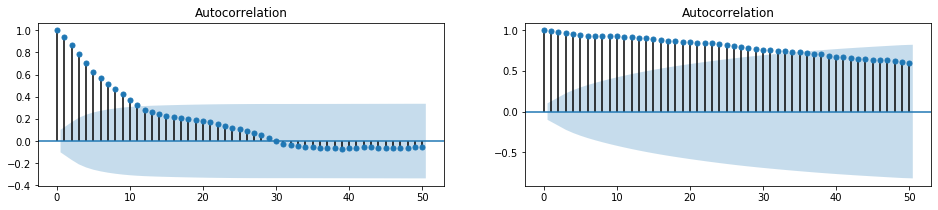

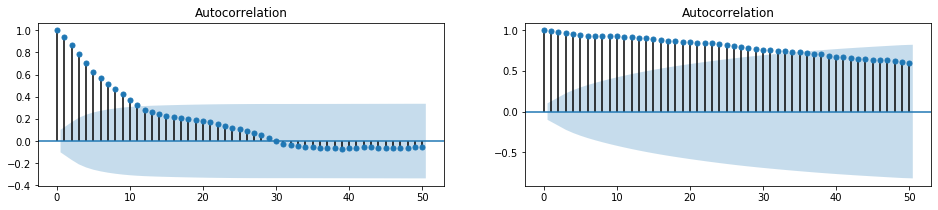

In [32]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(rainfall.tolist(), lags=50, ax=axes[0])
plot_acf(bhid.tolist(), lags=50, ax=axes[1])

Checking if target variable is auto correlated.
Auto-corr (similarity between observations as a function of the lag time)

- plot looks like a sigmoid funtion (hint for seasonality)

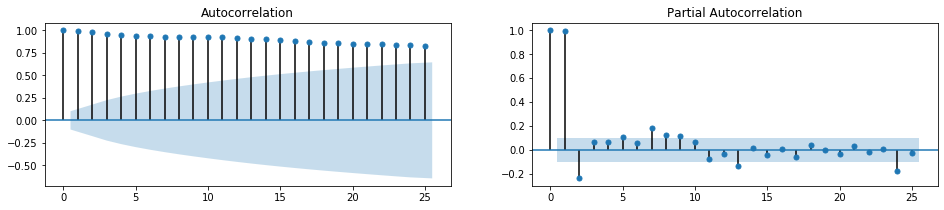

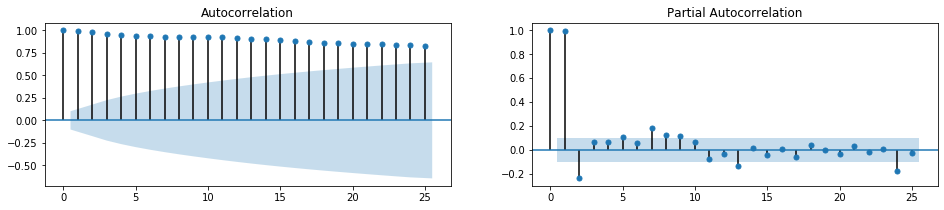

In [33]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(bhid, lags=25, ax=axes[0])
plot_pacf(bhid, lags=25, ax=axes[1])

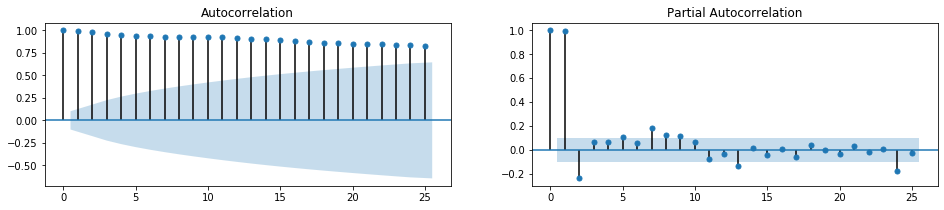

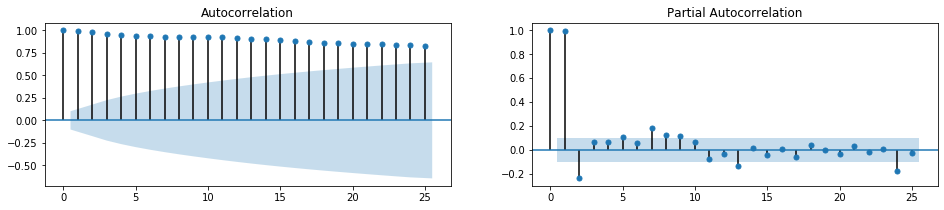

In [34]:
fig, axes = plt.subplots(1,2,figsize=(16,3))
plot_acf(bhid, lags=25, ax=axes[0])
plot_pacf(bhid, lags=25, ax=axes[1])

#### To check whether data is stationary we use Augmented Dickey-Fuller (ADF) Test

For time series modeling, data needs to be stationary — if there is a trend in the data we need to get rid of it. 

#### BHID

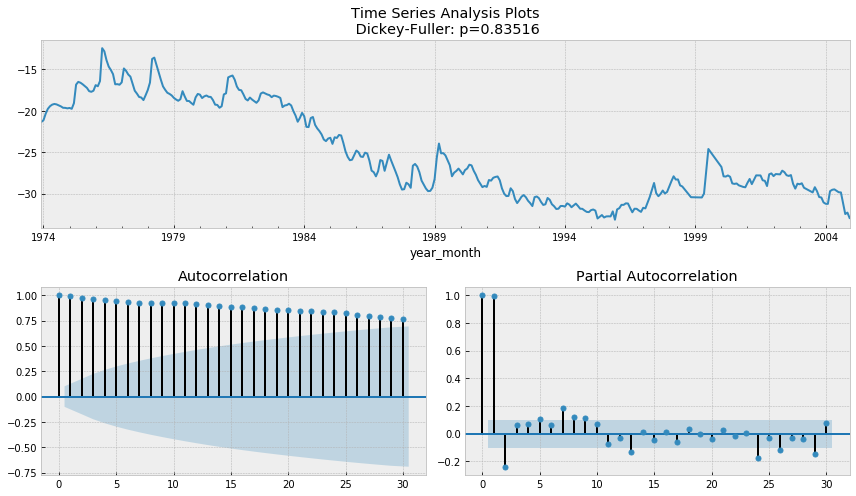

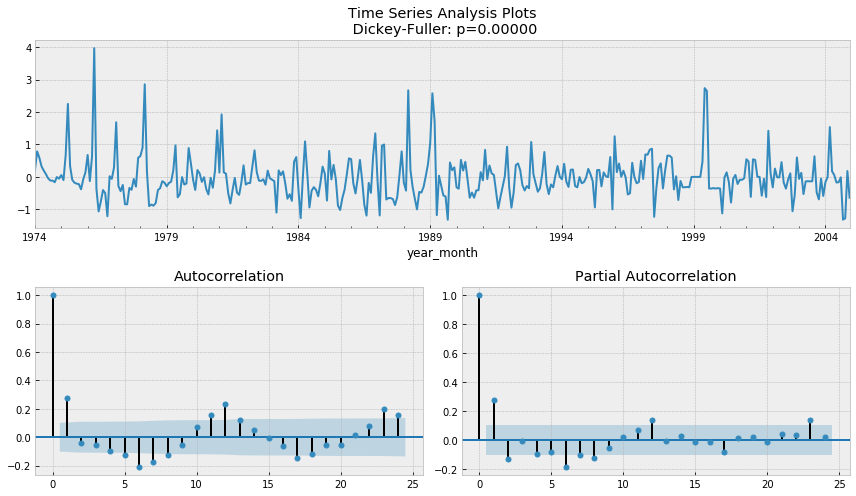

In [35]:
In [2]: import statsmodels.api as sm
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(bhid, lags=30)

# Take the first difference to remove to make the process stationary
D4N0037_diff = bhid - bhid.shift(1)

tsplot(D4N0037_diff[1:], lags=24)

#### Rainfall

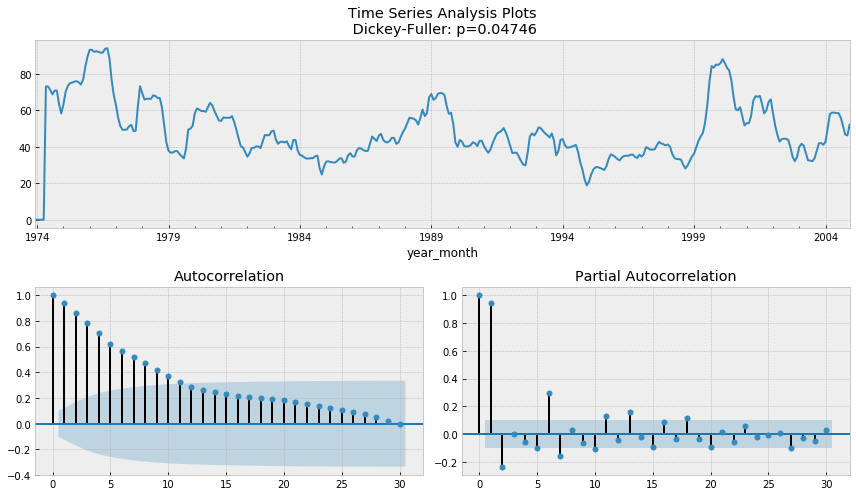

In [36]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(rainfall, lags=30)

#### Temp

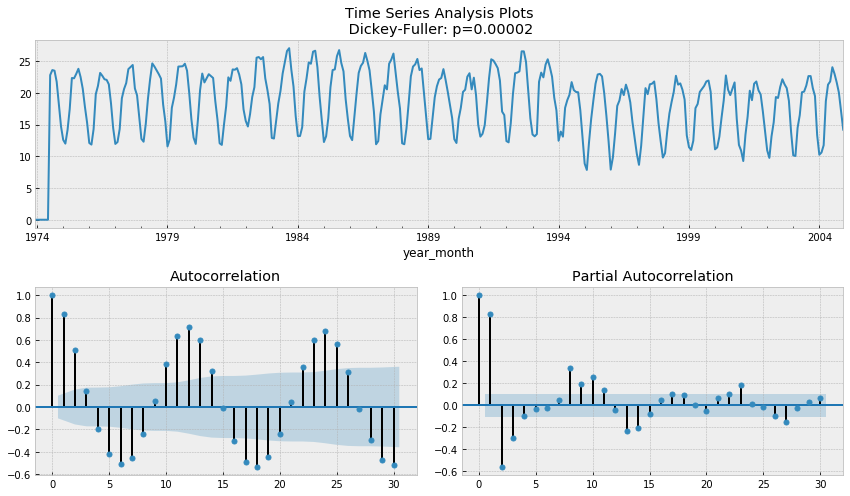

In [37]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(temperature, lags=30)


#### Discharge

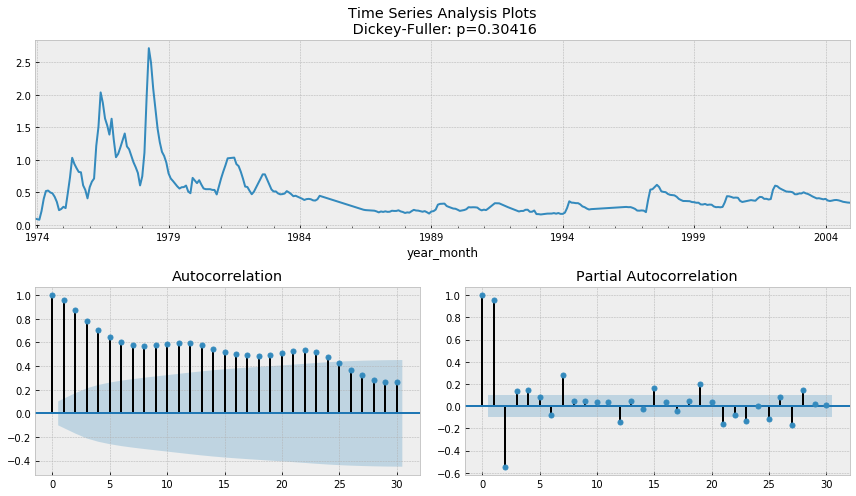

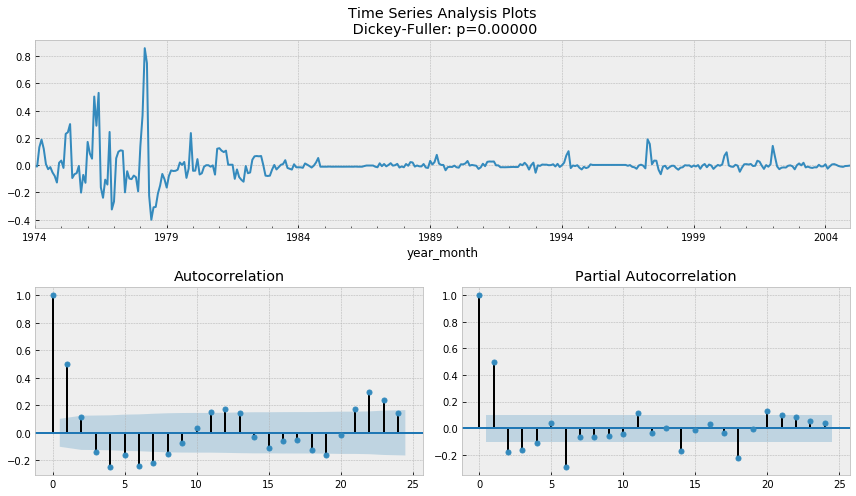

In [38]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(discharge, lags=30)

# Take the first difference to remove to make the process stationary
dis_diff = discharge - discharge.shift(1)

tsplot(dis_diff[1:], lags=24)

#### Usage

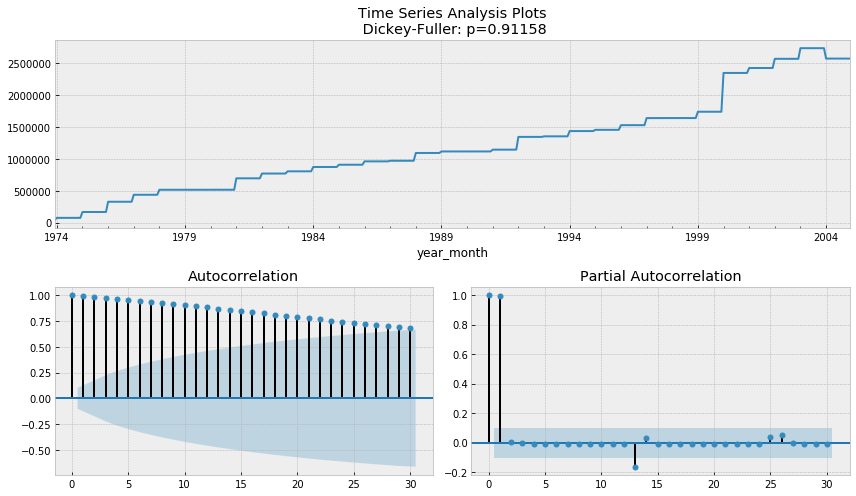

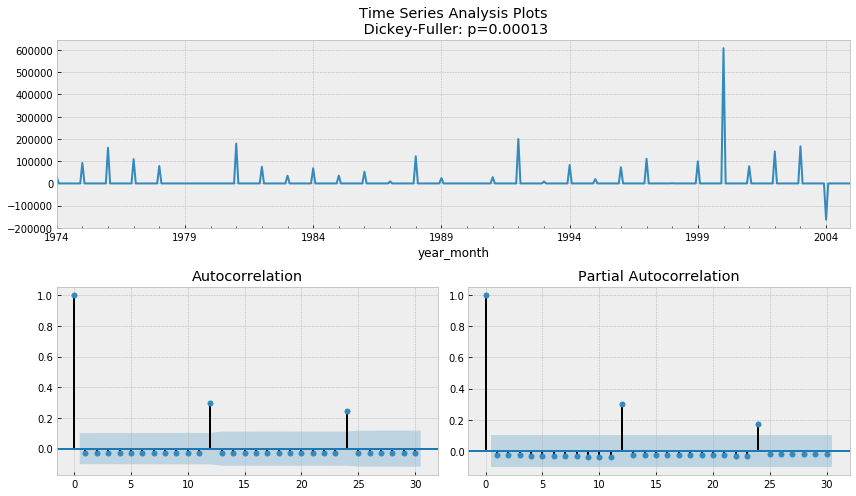

In [39]:
import statsmodels.tsa.api as smt

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
	    
	    if not isinstance(y, pd.Series):
	        y = pd.Series(y)
	        
	    with plt.style.context(style='bmh'):
	        fig = plt.figure(figsize=figsize)
	        layout = (2,2)
	        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
	        acf_ax = plt.subplot2grid(layout, (1,0))
	        pacf_ax = plt.subplot2grid(layout, (1,1))
	        
	        y.plot(ax=ts_ax)
	        p_value = sm.tsa.stattools.adfuller(y)[1]
	        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
	        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
	        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
	        plt.tight_layout()
	        
tsplot(usage, lags=30)

#Take the first difference to remove to make the process stationary
usage_diff = usage - usage.shift(1)


tsplot(usage_diff[1:], lags=30)



### Differenced dataframe (poor model results)

In [40]:
pima_diff = pd.DataFrame({'D4N0037': D4N0037_diff ,'Temperature': temperature,  'Rainfall': rainfall,  'Discharge': dis_diff, 'Abstraction': usage_diff}, columns=['D4N0037','Temperature','precip_trend','Discharge', 'Abstraction'])
pima_diff.apply(lambda x: sum(x.isnull()), axis=0)

D4N0037           1
Temperature       0
precip_trend    373
Discharge         1
Abstraction       1
dtype: int64

In [41]:
#X = pima_diff[['Temperature', 'Discharge','Abstraction']] # Features
#y = pima_diff[['D4N0834']] # 'D4N0834', 'D4N0111' ,'D4N0122' ,'D4N0037','D4N0115','D4N0110' 

### Visual illustration to help select train and test data

Text(0, 0.5, 'Groundwater levels')

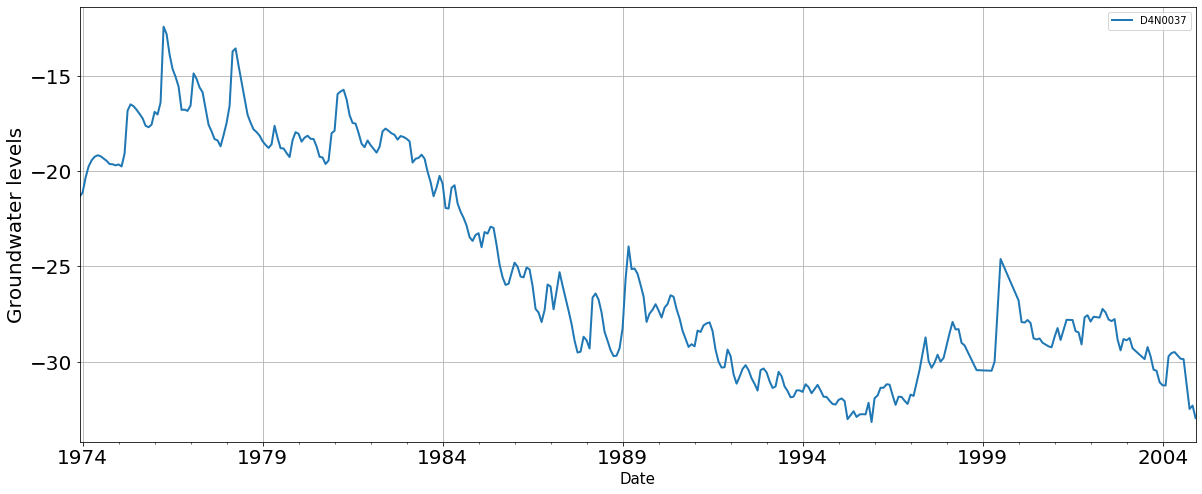

In [42]:
pima[['D4N0037']].plot(figsize=(20,8), linewidth=2, fontsize = 20, grid=True);
plt.xlabel("Date",fontsize=15)
plt.ylabel("Groundwater levels",fontsize=20)


### Model Parameters

In [43]:
pima['precip_trend_log'] = 1 +np.log1p(pima['precip_trend (t-3)'])
pima['Temperature_log'] = 1 +np.log1p(pima['Temperature (t-3)'])
pima['Discharge_log'] = 1 + np.log1p(pima['Discharge'])
pima['Abstraction_log'] = 1 + np.log1p(pima['Abstraction'])

In [44]:
pima

D4N0037  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                  
1973-12-01 -21.340000        22.80     73.116667      0.096  4.519858e+04   
1974-01-01 -21.130000        23.60     73.045833      0.088  7.444367e+04   
1974-02-01 -20.347500        23.50     71.141667      0.079  7.444367e+04   
1974-03-01 -19.760000        21.75     68.741667      0.211  7.444367e+04   
1974-04-01 -19.440000        18.25     70.870833      0.399  7.444367e+04   
...               ...          ...           ...        ...           ...   
2004-08-01 -29.860000        14.60     55.216667      0.367  2.572182e+06   
2004-09-01 -31.188020        15.55     50.758333      0.355  2.572182e+06   
2004-10-01 -32.473200        20.35     49.933333      0.349  2.572182e+06   
2004-11-01 -32.298778        23.75     53.341667      0.344  2.572182e+06   
2004-12-01 -32.950000        23.10     53.633333      0.341  2.572182e+06   

            Temperature (t-3)  precip_trend (t-3)  precip_trend_log  \
year_month                                                            
1973-12-01                NaN                 NaN               NaN   
1974-01-01                NaN                 NaN               NaN   
1974-02-01                NaN                 NaN               NaN   
1974-03-01                NaN                 NaN               NaN   
1974-04-01                NaN                 NaN               NaN   
...                       ...                 ...               ...   
2004-08-01              23.00           55.891667          5.041149   
2004-09-01              21.65           51.433333          4.959543   
2004-10-01              20.05           46.725000          4.865455   
2004-11-01              17.05           46.216667          4.854747   
2004-12-01              14.20           52.108333          4.972334   

            Temperature_log  Discharge_log  Abstraction_log  
year_month                                                   
1973-12-01              NaN       1.091667        11.718843  
1974-01-01              NaN       1.084341        12.217811  
1974-02-01              NaN       1.076035        12.217811  
1974-03-01              NaN       1.191446        12.217811  
1974-04-01              NaN       1.335758        12.217811  
...                     ...            ...              ...  
2004-08-01         4.178054       1.312619        15.760266  
2004-09-01         4.120160       1.303801        15.760266  
2004-10-01         4.046901       1.299364        15.760266  
2004-11-01         3.893146       1.295650        15.760266  
2004-12-01         3.721295       1.293416        15.760266  

[373 rows x 11 columns]

In [45]:
for obs in range(1,5):
    pima["t_" + str(obs)] = pima.D4N0037.shift(obs)
pima.fillna(0, inplace=True)

In [46]:
pima

D4N0037  Temperature  precip_trend  Discharge   Abstraction  \
year_month                                                                  
1973-12-01 -21.340000        22.80     73.116667      0.096  4.519858e+04   
1974-01-01 -21.130000        23.60     73.045833      0.088  7.444367e+04   
1974-02-01 -20.347500        23.50     71.141667      0.079  7.444367e+04   
1974-03-01 -19.760000        21.75     68.741667      0.211  7.444367e+04   
1974-04-01 -19.440000        18.25     70.870833      0.399  7.444367e+04   
...               ...          ...           ...        ...           ...   
2004-08-01 -29.860000        14.60     55.216667      0.367  2.572182e+06   
2004-09-01 -31.188020        15.55     50.758333      0.355  2.572182e+06   
2004-10-01 -32.473200        20.35     49.933333      0.349  2.572182e+06   
2004-11-01 -32.298778        23.75     53.341667      0.344  2.572182e+06   
2004-12-01 -32.950000        23.10     53.633333      0.341  2.572182e+06   

            Temperature (t-3)  precip_trend (t-3)  precip_trend_log  \
year_month                                                            
1973-12-01               0.00            0.000000          0.000000   
1974-01-01               0.00            0.000000          0.000000   
1974-02-01               0.00            0.000000          0.000000   
1974-03-01               0.00            0.000000          0.000000   
1974-04-01               0.00            0.000000          0.000000   
...                       ...                 ...               ...   
2004-08-01              23.00           55.891667          5.041149   
2004-09-01              21.65           51.433333          4.959543   
2004-10-01              20.05           46.725000          4.865455   
2004-11-01              17.05           46.216667          4.854747   
2004-12-01              14.20           52.108333          4.972334   

            Temperature_log  Discharge_log  Abstraction_log        t_1  \
year_month                                                               
1973-12-01         0.000000       1.091667        11.718843   0.000000   
1974-01-01         0.000000       1.084341        12.217811 -21.340000   
1974-02-01         0.000000       1.076035        12.217811 -21.130000   
1974-03-01         0.000000       1.191446        12.217811 -20.347500   
1974-04-01         0.000000       1.335758        12.217811 -19.760000   
...                     ...            ...              ...        ...   
2004-08-01         4.178054       1.312619        15.760266 -29.840000   
2004-09-01         4.120160       1.303801        15.760266 -29.860000   
2004-10-01         4.046901       1.299364        15.760266 -31.188020   
2004-11-01         3.893146       1.295650        15.760266 -32.473200   
2004-12-01         3.721295       1.293416        15.760266 -32.298778   

                  t_2        t_3        t_4  
year_month                                   
1973-12-01   0.000000   0.000000   0.000000  
1974-01-01   0.000000   0.000000   0.000000  
1974-02-01 -21.340000   0.000000   0.000000  
1974-03-01 -21.130000 -21.340000   0.000000  
1974-04-01 -20.347500 -21.130000 -21.340000  
...               ...        ...        ...  
2004-08-01 -29.667869 -29.490000 -29.540000  
2004-09-01 -29.840000 -29.667869 -29.490000  
2004-10-01 -29.860000 -29.840000 -29.667869  
2004-11-01 -31.188020 -29.860000 -29.840000  
2004-12-01 -32.473200 -31.188020 -29.860000  

[373 rows x 15 columns]

In [47]:
pima.shape

(373, 15)

In [48]:
pima1  = pima[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2','D4N0037']]
scaler = StandardScaler()
pima1  = pd.DataFrame(scaler.fit_transform(pima1), columns=pima1.columns, index=pima1.index)

### All variables

In [49]:
X = pima1[['Temperature_log','precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']]
y = pima1['D4N0037']

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False)
mi

Temperature_log     0.016263
precip_trend_log    0.301962
Discharge_log       0.428464
Abstraction_log     0.687219
t_1                 1.000000
t_2                 0.802350
dtype: float64

In [50]:
X = pima1[['Discharge_log' ,'precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']].values
y = pima1['D4N0037'].values
y = y.reshape(-1,1)

In [51]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(311, 6) (311, 1)
(62, 6) (62, 1)


In [52]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.predict(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

### LSTM

In [75]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU, LSTM
from tensorflow.keras.optimizers import Adam

In [54]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_lstm', 'rmse_lstm', 'r2_lstm','mae_lstm'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(LSTM(50, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mae', optimizer='adam')

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
    
    history = model.fit(X_t_reshaped, y_train, epochs=700
                    , batch_size=72, validation_data=(X_val_reshaped, y_test), verbose=2, callbacks=[check, early], shuffle=False)

    #running function
    gwl =  -0.16225336
    test_forecast = X_test
    steps_ahead = 62
    y_pred = forecast(model, test_forecast, gwl, steps_ahead)
    y_pred = np.array(y_pred)
    
    #metrics for test
    y_lstm = y_pred
    test_pred.append(y_lstm)
    mse_lstm = mean_squared_error(y_test, y_lstm)
    rmse_lstm = np.sqrt(mse_lstm)
    r2_lstm = r2_score(y_test, y_lstm)
    mae_lstm = mean_absolute_error(y_test, y_lstm)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_lstm,Round), round(rmse_lstm,Round), round(r2_lstm,Round),round(mae_lstm,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(311, 6)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 311 samples, validate on 62 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/700

Epoch 00001: val_loss improved from inf to 0.65879, saving model to model.h5
311/311 - 3s - loss: 0.9855 - val_loss: 0.6588
Epoch 2/700

Epoch 00002: val_loss improved from 0.65879 to 0.63125, saving model to model.h5
311/311 - 0s - loss: 0.9367 - val_loss: 0.6312
Epoch 3/700

Epoch 00003: val_loss improved from 0.63125 to 0.60261, saving model to model.h5
311/311 - 0s - loss: 0.8933 - val_loss: 0.6026
Epoch 4/700

Epoch 00004: val_loss improved from 0.60261 to 0.57325, saving model to model.h5
311/311 - 0s - loss: 0.8494 - val_loss: 0.5732
Epoch 5/700

Epoch 00005: val_loss improved from 0.57325 to 0.54328, saving model to model.h5
311/311 - 0s - loss: 0.8037 - val_loss: 0.5433
Epoch 6/700

Epoch

311/311 - 0s - loss: 0.1275 - val_loss: 0.0830
Epoch 56/700

Epoch 00056: val_loss improved from 0.08297 to 0.08295, saving model to model.h5
311/311 - 0s - loss: 0.1289 - val_loss: 0.0830
Epoch 57/700

Epoch 00057: val_loss improved from 0.08295 to 0.08274, saving model to model.h5
311/311 - 0s - loss: 0.1271 - val_loss: 0.0827
Epoch 58/700

Epoch 00058: val_loss did not improve from 0.08274
311/311 - 0s - loss: 0.1272 - val_loss: 0.0828
Epoch 59/700

Epoch 00059: val_loss did not improve from 0.08274
311/311 - 0s - loss: 0.1267 - val_loss: 0.0828
Epoch 60/700

Epoch 00060: val_loss did not improve from 0.08274
311/311 - 0s - loss: 0.1315 - val_loss: 0.0829
Epoch 61/700

Epoch 00061: val_loss did not improve from 0.08274
311/311 - 0s - loss: 0.1296 - val_loss: 0.0828
Epoch 62/700

Epoch 00062: val_loss improved from 0.08274 to 0.08269, saving model to model.h5
311/311 - 0s - loss: 0.1217 - val_loss: 0.0827
Epoch 63/700

Epoch 00063: val_loss did not improve from 0.08269
311/311 - 0s -

Epoch 126/700

Epoch 00126: val_loss did not improve from 0.08087
311/311 - 0s - loss: 0.1129 - val_loss: 0.0894
Epoch 127/700

Epoch 00127: val_loss did not improve from 0.08087
311/311 - 0s - loss: 0.1100 - val_loss: 0.0879
Epoch 128/700

Epoch 00128: val_loss did not improve from 0.08087
311/311 - 0s - loss: 0.1142 - val_loss: 0.0860
Epoch 129/700

Epoch 00129: val_loss did not improve from 0.08087
311/311 - 0s - loss: 0.1134 - val_loss: 0.0843
Epoch 130/700

Epoch 00130: val_loss did not improve from 0.08087
311/311 - 0s - loss: 0.1121 - val_loss: 0.0812
Epoch 131/700

Epoch 00131: val_loss did not improve from 0.08087
311/311 - 0s - loss: 0.1084 - val_loss: 0.0810
Epoch 132/700

Epoch 00132: val_loss did not improve from 0.08087
311/311 - 0s - loss: 0.1150 - val_loss: 0.0831
Epoch 133/700

Epoch 00133: val_loss did not improve from 0.08087
311/311 - 0s - loss: 0.1143 - val_loss: 0.0835
Epoch 134/700

Epoch 00134: val_loss did not improve from 0.08087
311/311 - 0s - loss: 0.1093 - 


Epoch 00195: val_loss did not improve from 0.07504
311/311 - 0s - loss: 0.1049 - val_loss: 0.0769
Epoch 196/700

Epoch 00196: val_loss did not improve from 0.07504
311/311 - 0s - loss: 0.1109 - val_loss: 0.0764
Epoch 197/700

Epoch 00197: val_loss did not improve from 0.07504
311/311 - 0s - loss: 0.1041 - val_loss: 0.0770
Epoch 198/700

Epoch 00198: val_loss did not improve from 0.07504
311/311 - 0s - loss: 0.1069 - val_loss: 0.0787
Epoch 199/700

Epoch 00199: val_loss did not improve from 0.07504
311/311 - 0s - loss: 0.1095 - val_loss: 0.0796
Epoch 200/700

Epoch 00200: val_loss did not improve from 0.07504
311/311 - 0s - loss: 0.1040 - val_loss: 0.0772
Epoch 201/700

Epoch 00201: val_loss improved from 0.07504 to 0.07405, saving model to model.h5
311/311 - 0s - loss: 0.1071 - val_loss: 0.0741
Epoch 202/700

Epoch 00202: val_loss did not improve from 0.07405
311/311 - 0s - loss: 0.1039 - val_loss: 0.0742
Epoch 203/700

Epoch 00203: val_loss did not improve from 0.07405
311/311 - 0s -

Epoch 264/700

Epoch 00264: val_loss did not improve from 0.06816
311/311 - 0s - loss: 0.0981 - val_loss: 0.0715
Epoch 265/700

Epoch 00265: val_loss did not improve from 0.06816
311/311 - 0s - loss: 0.0995 - val_loss: 0.0712
Epoch 266/700

Epoch 00266: val_loss did not improve from 0.06816
311/311 - 0s - loss: 0.0951 - val_loss: 0.0713
Epoch 267/700

Epoch 00267: val_loss did not improve from 0.06816
311/311 - 0s - loss: 0.1003 - val_loss: 0.0714
Epoch 268/700

Epoch 00268: val_loss did not improve from 0.06816
311/311 - 0s - loss: 0.0990 - val_loss: 0.0703
Epoch 269/700

Epoch 00269: val_loss improved from 0.06816 to 0.06811, saving model to model.h5
311/311 - 0s - loss: 0.0956 - val_loss: 0.0681
Epoch 270/700

Epoch 00270: val_loss improved from 0.06811 to 0.06800, saving model to model.h5
311/311 - 0s - loss: 0.0943 - val_loss: 0.0680
Epoch 271/700

Epoch 00271: val_loss improved from 0.06800 to 0.06716, saving model to model.h5
311/311 - 0s - loss: 0.0887 - val_loss: 0.0672
Epoch 


Epoch 00333: val_loss did not improve from 0.06287
311/311 - 0s - loss: 0.0894 - val_loss: 0.0632
Epoch 334/700

Epoch 00334: val_loss did not improve from 0.06287
311/311 - 0s - loss: 0.0925 - val_loss: 0.0632
Epoch 335/700

Epoch 00335: val_loss improved from 0.06287 to 0.06276, saving model to model.h5
311/311 - 0s - loss: 0.0905 - val_loss: 0.0628
Epoch 336/700

Epoch 00336: val_loss improved from 0.06276 to 0.06249, saving model to model.h5
311/311 - 0s - loss: 0.0886 - val_loss: 0.0625
Epoch 337/700

Epoch 00337: val_loss did not improve from 0.06249
311/311 - 0s - loss: 0.0897 - val_loss: 0.0631
Epoch 338/700

Epoch 00338: val_loss did not improve from 0.06249
311/311 - 0s - loss: 0.0882 - val_loss: 0.0635
Epoch 339/700

Epoch 00339: val_loss did not improve from 0.06249
311/311 - 0s - loss: 0.0951 - val_loss: 0.0638
Epoch 340/700

Epoch 00340: val_loss did not improve from 0.06249
311/311 - 0s - loss: 0.0910 - val_loss: 0.0638
Epoch 341/700

Epoch 00341: val_loss did not impro

Epoch 405/700

Epoch 00405: val_loss did not improve from 0.06158
311/311 - 0s - loss: 0.0882 - val_loss: 0.0638
Epoch 406/700

Epoch 00406: val_loss did not improve from 0.06158
311/311 - 0s - loss: 0.0870 - val_loss: 0.0635
Epoch 407/700

Epoch 00407: val_loss did not improve from 0.06158
311/311 - 0s - loss: 0.0923 - val_loss: 0.0631
Epoch 408/700

Epoch 00408: val_loss did not improve from 0.06158
311/311 - 0s - loss: 0.0863 - val_loss: 0.0641
Epoch 409/700

Epoch 00409: val_loss did not improve from 0.06158
311/311 - 0s - loss: 0.0860 - val_loss: 0.0637
Epoch 410/700

Epoch 00410: val_loss did not improve from 0.06158
311/311 - 0s - loss: 0.0912 - val_loss: 0.0640
Epoch 411/700

Epoch 00411: val_loss did not improve from 0.06158
311/311 - 0s - loss: 0.0886 - val_loss: 0.0642
Epoch 412/700

Epoch 00412: val_loss did not improve from 0.06158
311/311 - 0s - loss: 0.0906 - val_loss: 0.0660
Epoch 413/700

Epoch 00413: val_loss did not improve from 0.06158
311/311 - 0s - loss: 0.0862 - 

Epoch 12/700

Epoch 00012: val_loss improved from 0.39498 to 0.36393, saving model to model.h5
311/311 - 0s - loss: 0.4921 - val_loss: 0.3639
Epoch 13/700

Epoch 00013: val_loss improved from 0.36393 to 0.33261, saving model to model.h5
311/311 - 0s - loss: 0.4410 - val_loss: 0.3326
Epoch 14/700

Epoch 00014: val_loss improved from 0.33261 to 0.30199, saving model to model.h5
311/311 - 0s - loss: 0.3941 - val_loss: 0.3020
Epoch 15/700

Epoch 00015: val_loss improved from 0.30199 to 0.27087, saving model to model.h5
311/311 - 0s - loss: 0.3536 - val_loss: 0.2709
Epoch 16/700

Epoch 00016: val_loss improved from 0.27087 to 0.23988, saving model to model.h5
311/311 - 0s - loss: 0.3192 - val_loss: 0.2399
Epoch 17/700

Epoch 00017: val_loss improved from 0.23988 to 0.21020, saving model to model.h5
311/311 - 0s - loss: 0.2859 - val_loss: 0.2102
Epoch 18/700

Epoch 00018: val_loss improved from 0.21020 to 0.18464, saving model to model.h5
311/311 - 0s - loss: 0.2673 - val_loss: 0.1846
Epoch 

Epoch 74/700

Epoch 00074: val_loss did not improve from 0.07630
311/311 - 0s - loss: 0.1129 - val_loss: 0.0770
Epoch 75/700

Epoch 00075: val_loss did not improve from 0.07630
311/311 - 0s - loss: 0.1191 - val_loss: 0.0771
Epoch 76/700

Epoch 00076: val_loss improved from 0.07630 to 0.07623, saving model to model.h5
311/311 - 0s - loss: 0.1168 - val_loss: 0.0762
Epoch 77/700

Epoch 00077: val_loss improved from 0.07623 to 0.07606, saving model to model.h5
311/311 - 0s - loss: 0.1162 - val_loss: 0.0761
Epoch 78/700

Epoch 00078: val_loss did not improve from 0.07606
311/311 - 0s - loss: 0.1151 - val_loss: 0.0764
Epoch 79/700

Epoch 00079: val_loss did not improve from 0.07606
311/311 - 0s - loss: 0.1142 - val_loss: 0.0774
Epoch 80/700

Epoch 00080: val_loss did not improve from 0.07606
311/311 - 0s - loss: 0.1154 - val_loss: 0.0770
Epoch 81/700

Epoch 00081: val_loss did not improve from 0.07606
311/311 - 0s - loss: 0.1129 - val_loss: 0.0765
Epoch 82/700

Epoch 00082: val_loss improved

311/311 - 0s - loss: 0.1027 - val_loss: 0.0730
Epoch 144/700

Epoch 00144: val_loss improved from 0.07300 to 0.07288, saving model to model.h5
311/311 - 0s - loss: 0.1079 - val_loss: 0.0729
Epoch 145/700

Epoch 00145: val_loss did not improve from 0.07288
311/311 - 0s - loss: 0.1040 - val_loss: 0.0731
Epoch 146/700

Epoch 00146: val_loss improved from 0.07288 to 0.07250, saving model to model.h5
311/311 - 0s - loss: 0.1083 - val_loss: 0.0725
Epoch 147/700

Epoch 00147: val_loss improved from 0.07250 to 0.07222, saving model to model.h5
311/311 - 0s - loss: 0.1042 - val_loss: 0.0722
Epoch 148/700

Epoch 00148: val_loss did not improve from 0.07222
311/311 - 0s - loss: 0.1042 - val_loss: 0.0725
Epoch 149/700

Epoch 00149: val_loss did not improve from 0.07222
311/311 - 0s - loss: 0.1069 - val_loss: 0.0727
Epoch 150/700

Epoch 00150: val_loss did not improve from 0.07222
311/311 - 0s - loss: 0.1057 - val_loss: 0.0729
Epoch 151/700

Epoch 00151: val_loss did not improve from 0.07222
311/31

Epoch 213/700

Epoch 00213: val_loss did not improve from 0.06724
311/311 - 0s - loss: 0.0991 - val_loss: 0.0705
Epoch 214/700

Epoch 00214: val_loss did not improve from 0.06724
311/311 - 0s - loss: 0.1055 - val_loss: 0.0723
Epoch 215/700

Epoch 00215: val_loss did not improve from 0.06724
311/311 - 0s - loss: 0.0947 - val_loss: 0.0705
Epoch 216/700

Epoch 00216: val_loss did not improve from 0.06724
311/311 - 0s - loss: 0.0963 - val_loss: 0.0680
Epoch 217/700

Epoch 00217: val_loss did not improve from 0.06724
311/311 - 0s - loss: 0.1026 - val_loss: 0.0673
Epoch 218/700

Epoch 00218: val_loss improved from 0.06724 to 0.06690, saving model to model.h5
311/311 - 0s - loss: 0.0975 - val_loss: 0.0669
Epoch 219/700

Epoch 00219: val_loss improved from 0.06690 to 0.06665, saving model to model.h5
311/311 - 0s - loss: 0.0968 - val_loss: 0.0667
Epoch 220/700

Epoch 00220: val_loss improved from 0.06665 to 0.06657, saving model to model.h5
311/311 - 0s - loss: 0.0944 - val_loss: 0.0666
Epoch 

Epoch 282/700

Epoch 00282: val_loss did not improve from 0.06300
311/311 - 0s - loss: 0.0930 - val_loss: 0.0641
Epoch 283/700

Epoch 00283: val_loss did not improve from 0.06300
311/311 - 0s - loss: 0.0919 - val_loss: 0.0639
Epoch 284/700

Epoch 00284: val_loss did not improve from 0.06300
311/311 - 0s - loss: 0.0938 - val_loss: 0.0650
Epoch 285/700

Epoch 00285: val_loss did not improve from 0.06300
311/311 - 0s - loss: 0.0892 - val_loss: 0.0647
Epoch 286/700

Epoch 00286: val_loss did not improve from 0.06300
311/311 - 0s - loss: 0.0913 - val_loss: 0.0641
Epoch 287/700

Epoch 00287: val_loss did not improve from 0.06300
311/311 - 0s - loss: 0.0953 - val_loss: 0.0665
Epoch 288/700

Epoch 00288: val_loss did not improve from 0.06300
311/311 - 0s - loss: 0.0898 - val_loss: 0.0631
Epoch 289/700

Epoch 00289: val_loss did not improve from 0.06300
311/311 - 0s - loss: 0.0912 - val_loss: 0.0639
Epoch 290/700

Epoch 00290: val_loss did not improve from 0.06300
311/311 - 0s - loss: 0.0901 - 

Epoch 353/700

Epoch 00353: val_loss did not improve from 0.06117
311/311 - 0s - loss: 0.0875 - val_loss: 0.0627
Epoch 354/700

Epoch 00354: val_loss did not improve from 0.06117
311/311 - 0s - loss: 0.0873 - val_loss: 0.0622
Epoch 355/700

Epoch 00355: val_loss did not improve from 0.06117
311/311 - 0s - loss: 0.0832 - val_loss: 0.0627
Epoch 356/700

Epoch 00356: val_loss did not improve from 0.06117
311/311 - 0s - loss: 0.0885 - val_loss: 0.0633
Epoch 357/700

Epoch 00357: val_loss did not improve from 0.06117
311/311 - 0s - loss: 0.0889 - val_loss: 0.0629
Epoch 358/700

Epoch 00358: val_loss did not improve from 0.06117
311/311 - 0s - loss: 0.0850 - val_loss: 0.0625
Epoch 359/700

Epoch 00359: val_loss did not improve from 0.06117
311/311 - 0s - loss: 0.0874 - val_loss: 0.0633
Epoch 360/700

Epoch 00360: val_loss did not improve from 0.06117
311/311 - 0s - loss: 0.0891 - val_loss: 0.0628
Epoch 361/700

Epoch 00361: val_loss did not improve from 0.06117
311/311 - 0s - loss: 0.0912 - 

Epoch 8/700

Epoch 00008: val_loss improved from 0.56753 to 0.53725, saving model to model.h5
311/311 - 0s - loss: 0.6961 - val_loss: 0.5372
Epoch 9/700

Epoch 00009: val_loss improved from 0.53725 to 0.50666, saving model to model.h5
311/311 - 0s - loss: 0.6509 - val_loss: 0.5067
Epoch 10/700

Epoch 00010: val_loss improved from 0.50666 to 0.47528, saving model to model.h5
311/311 - 0s - loss: 0.6054 - val_loss: 0.4753
Epoch 11/700

Epoch 00011: val_loss improved from 0.47528 to 0.44364, saving model to model.h5
311/311 - 0s - loss: 0.5585 - val_loss: 0.4436
Epoch 12/700

Epoch 00012: val_loss improved from 0.44364 to 0.41230, saving model to model.h5
311/311 - 0s - loss: 0.5074 - val_loss: 0.4123
Epoch 13/700

Epoch 00013: val_loss improved from 0.41230 to 0.38074, saving model to model.h5
311/311 - 0s - loss: 0.4590 - val_loss: 0.3807
Epoch 14/700

Epoch 00014: val_loss improved from 0.38074 to 0.34855, saving model to model.h5
311/311 - 0s - loss: 0.4148 - val_loss: 0.3486
Epoch 15

Epoch 68/700

Epoch 00068: val_loss improved from 0.08054 to 0.08032, saving model to model.h5
311/311 - 0s - loss: 0.1207 - val_loss: 0.0803
Epoch 69/700

Epoch 00069: val_loss improved from 0.08032 to 0.08011, saving model to model.h5
311/311 - 0s - loss: 0.1184 - val_loss: 0.0801
Epoch 70/700

Epoch 00070: val_loss improved from 0.08011 to 0.08002, saving model to model.h5
311/311 - 0s - loss: 0.1216 - val_loss: 0.0800
Epoch 71/700

Epoch 00071: val_loss improved from 0.08002 to 0.08001, saving model to model.h5
311/311 - 0s - loss: 0.1159 - val_loss: 0.0800
Epoch 72/700

Epoch 00072: val_loss did not improve from 0.08001
311/311 - 0s - loss: 0.1195 - val_loss: 0.0812
Epoch 73/700

Epoch 00073: val_loss did not improve from 0.08001
311/311 - 0s - loss: 0.1191 - val_loss: 0.0816
Epoch 74/700

Epoch 00074: val_loss did not improve from 0.08001
311/311 - 0s - loss: 0.1176 - val_loss: 0.0816
Epoch 75/700

Epoch 00075: val_loss did not improve from 0.08001
311/311 - 0s - loss: 0.1205 - v

Epoch 138/700

Epoch 00138: val_loss did not improve from 0.07746
311/311 - 0s - loss: 0.1093 - val_loss: 0.0777
Epoch 139/700

Epoch 00139: val_loss did not improve from 0.07746
311/311 - 0s - loss: 0.1054 - val_loss: 0.0781
Epoch 140/700

Epoch 00140: val_loss did not improve from 0.07746
311/311 - 0s - loss: 0.1052 - val_loss: 0.0781
Epoch 141/700

Epoch 00141: val_loss improved from 0.07746 to 0.07709, saving model to model.h5
311/311 - 0s - loss: 0.1074 - val_loss: 0.0771
Epoch 142/700

Epoch 00142: val_loss improved from 0.07709 to 0.07633, saving model to model.h5
311/311 - 0s - loss: 0.1079 - val_loss: 0.0763
Epoch 143/700

Epoch 00143: val_loss improved from 0.07633 to 0.07557, saving model to model.h5
311/311 - 0s - loss: 0.1115 - val_loss: 0.0756
Epoch 144/700

Epoch 00144: val_loss did not improve from 0.07557
311/311 - 0s - loss: 0.1071 - val_loss: 0.0764
Epoch 145/700

Epoch 00145: val_loss did not improve from 0.07557
311/311 - 0s - loss: 0.1089 - val_loss: 0.0775
Epoch 

Epoch 208/700

Epoch 00208: val_loss did not improve from 0.07084
311/311 - 0s - loss: 0.1004 - val_loss: 0.0711
Epoch 209/700

Epoch 00209: val_loss did not improve from 0.07084
311/311 - 0s - loss: 0.1008 - val_loss: 0.0711
Epoch 210/700

Epoch 00210: val_loss did not improve from 0.07084
311/311 - 0s - loss: 0.0982 - val_loss: 0.0712
Epoch 211/700

Epoch 00211: val_loss improved from 0.07084 to 0.07077, saving model to model.h5
311/311 - 0s - loss: 0.1002 - val_loss: 0.0708
Epoch 212/700

Epoch 00212: val_loss did not improve from 0.07077
311/311 - 0s - loss: 0.0987 - val_loss: 0.0710
Epoch 213/700

Epoch 00213: val_loss did not improve from 0.07077
311/311 - 0s - loss: 0.0972 - val_loss: 0.0711
Epoch 214/700

Epoch 00214: val_loss did not improve from 0.07077
311/311 - 0s - loss: 0.0986 - val_loss: 0.0709
Epoch 215/700

Epoch 00215: val_loss improved from 0.07077 to 0.07038, saving model to model.h5
311/311 - 0s - loss: 0.0987 - val_loss: 0.0704
Epoch 216/700

Epoch 00216: val_loss

311/311 - 0s - loss: 0.0930 - val_loss: 0.0639
Epoch 277/700

Epoch 00277: val_loss did not improve from 0.06387
311/311 - 0s - loss: 0.0948 - val_loss: 0.0641
Epoch 278/700

Epoch 00278: val_loss did not improve from 0.06387
311/311 - 0s - loss: 0.0931 - val_loss: 0.0642
Epoch 279/700

Epoch 00279: val_loss did not improve from 0.06387
311/311 - 0s - loss: 0.0926 - val_loss: 0.0650
Epoch 280/700

Epoch 00280: val_loss did not improve from 0.06387
311/311 - 0s - loss: 0.0954 - val_loss: 0.0658
Epoch 281/700

Epoch 00281: val_loss did not improve from 0.06387
311/311 - 0s - loss: 0.0920 - val_loss: 0.0658
Epoch 282/700

Epoch 00282: val_loss did not improve from 0.06387
311/311 - 0s - loss: 0.0916 - val_loss: 0.0656
Epoch 283/700

Epoch 00283: val_loss did not improve from 0.06387
311/311 - 0s - loss: 0.0963 - val_loss: 0.0673
Epoch 284/700

Epoch 00284: val_loss did not improve from 0.06387
311/311 - 0s - loss: 0.0944 - val_loss: 0.0648
Epoch 285/700

Epoch 00285: val_loss did not impr

Epoch 348/700

Epoch 00348: val_loss did not improve from 0.06231
311/311 - 0s - loss: 0.0935 - val_loss: 0.0669
Epoch 349/700

Epoch 00349: val_loss did not improve from 0.06231
311/311 - 0s - loss: 0.0893 - val_loss: 0.0657
Epoch 350/700

Epoch 00350: val_loss did not improve from 0.06231
311/311 - 0s - loss: 0.0879 - val_loss: 0.0657
Epoch 351/700

Epoch 00351: val_loss did not improve from 0.06231
311/311 - 0s - loss: 0.0904 - val_loss: 0.0660
Epoch 352/700

Epoch 00352: val_loss did not improve from 0.06231
311/311 - 0s - loss: 0.0880 - val_loss: 0.0654
Epoch 353/700

Epoch 00353: val_loss did not improve from 0.06231
311/311 - 0s - loss: 0.0906 - val_loss: 0.0646
Epoch 354/700

Epoch 00354: val_loss did not improve from 0.06231
311/311 - 0s - loss: 0.0865 - val_loss: 0.0635
Epoch 355/700

Epoch 00355: val_loss did not improve from 0.06231
311/311 - 0s - loss: 0.0825 - val_loss: 0.0632
Epoch 356/700

Epoch 00356: val_loss did not improve from 0.06231
311/311 - 0s - loss: 0.0926 - 

Epoch 421/700

Epoch 00421: val_loss did not improve from 0.06231
311/311 - 0s - loss: 0.0903 - val_loss: 0.0656
Epoch 422/700

Epoch 00422: val_loss did not improve from 0.06231
311/311 - 0s - loss: 0.0823 - val_loss: 0.0656
Epoch 423/700

Epoch 00423: val_loss did not improve from 0.06231
311/311 - 0s - loss: 0.0840 - val_loss: 0.0655
Epoch 424/700

Epoch 00424: val_loss did not improve from 0.06231
311/311 - 0s - loss: 0.0884 - val_loss: 0.0672
Epoch 425/700

Epoch 00425: val_loss did not improve from 0.06231
311/311 - 0s - loss: 0.0943 - val_loss: 0.0659
Epoch 426/700

Epoch 00426: val_loss did not improve from 0.06231
311/311 - 0s - loss: 0.0847 - val_loss: 0.0667
Epoch 427/700

Epoch 00427: val_loss did not improve from 0.06231
311/311 - 0s - loss: 0.0845 - val_loss: 0.0703
Epoch 428/700

Epoch 00428: val_loss did not improve from 0.06231
311/311 - 0s - loss: 0.0856 - val_loss: 0.0690
Epoch 429/700

Epoch 00429: val_loss did not improve from 0.06231
311/311 - 0s - loss: 0.0873 - 

Epoch 46/700

Epoch 00046: val_loss improved from 0.08233 to 0.08229, saving model to model.h5
311/311 - 0s - loss: 0.1314 - val_loss: 0.0823
Epoch 47/700

Epoch 00047: val_loss improved from 0.08229 to 0.08200, saving model to model.h5
311/311 - 0s - loss: 0.1356 - val_loss: 0.0820
Epoch 48/700

Epoch 00048: val_loss improved from 0.08200 to 0.08169, saving model to model.h5
311/311 - 0s - loss: 0.1342 - val_loss: 0.0817
Epoch 49/700

Epoch 00049: val_loss improved from 0.08169 to 0.08144, saving model to model.h5
311/311 - 0s - loss: 0.1320 - val_loss: 0.0814
Epoch 50/700

Epoch 00050: val_loss did not improve from 0.08144
311/311 - 0s - loss: 0.1287 - val_loss: 0.0815
Epoch 51/700

Epoch 00051: val_loss improved from 0.08144 to 0.08143, saving model to model.h5
311/311 - 0s - loss: 0.1329 - val_loss: 0.0814
Epoch 52/700

Epoch 00052: val_loss improved from 0.08143 to 0.08126, saving model to model.h5
311/311 - 0s - loss: 0.1273 - val_loss: 0.0813
Epoch 53/700

Epoch 00053: val_loss 

Epoch 113/700

Epoch 00113: val_loss improved from 0.07659 to 0.07658, saving model to model.h5
311/311 - 0s - loss: 0.1098 - val_loss: 0.0766
Epoch 114/700

Epoch 00114: val_loss did not improve from 0.07658
311/311 - 0s - loss: 0.1093 - val_loss: 0.0771
Epoch 115/700

Epoch 00115: val_loss did not improve from 0.07658
311/311 - 0s - loss: 0.1079 - val_loss: 0.0790
Epoch 116/700

Epoch 00116: val_loss did not improve from 0.07658
311/311 - 0s - loss: 0.1063 - val_loss: 0.0813
Epoch 117/700

Epoch 00117: val_loss did not improve from 0.07658
311/311 - 0s - loss: 0.1114 - val_loss: 0.0813
Epoch 118/700

Epoch 00118: val_loss did not improve from 0.07658
311/311 - 0s - loss: 0.1121 - val_loss: 0.0812
Epoch 119/700

Epoch 00119: val_loss did not improve from 0.07658
311/311 - 0s - loss: 0.1053 - val_loss: 0.0810
Epoch 120/700

Epoch 00120: val_loss did not improve from 0.07658
311/311 - 0s - loss: 0.1140 - val_loss: 0.0806
Epoch 121/700

Epoch 00121: val_loss did not improve from 0.07658



Epoch 00183: val_loss improved from 0.07174 to 0.07172, saving model to model.h5
311/311 - 0s - loss: 0.1006 - val_loss: 0.0717
Epoch 184/700

Epoch 00184: val_loss did not improve from 0.07172
311/311 - 0s - loss: 0.1027 - val_loss: 0.0720
Epoch 185/700

Epoch 00185: val_loss improved from 0.07172 to 0.07104, saving model to model.h5
311/311 - 0s - loss: 0.1064 - val_loss: 0.0710
Epoch 186/700

Epoch 00186: val_loss improved from 0.07104 to 0.07053, saving model to model.h5
311/311 - 0s - loss: 0.1043 - val_loss: 0.0705
Epoch 187/700

Epoch 00187: val_loss did not improve from 0.07053
311/311 - 0s - loss: 0.1005 - val_loss: 0.0709
Epoch 188/700

Epoch 00188: val_loss did not improve from 0.07053
311/311 - 0s - loss: 0.1036 - val_loss: 0.0705
Epoch 189/700

Epoch 00189: val_loss improved from 0.07053 to 0.06940, saving model to model.h5
311/311 - 0s - loss: 0.0983 - val_loss: 0.0694
Epoch 190/700

Epoch 00190: val_loss improved from 0.06940 to 0.06876, saving model to model.h5
311/311


Epoch 00251: val_loss did not improve from 0.06428
311/311 - 0s - loss: 0.0960 - val_loss: 0.0662
Epoch 252/700

Epoch 00252: val_loss did not improve from 0.06428
311/311 - 0s - loss: 0.0945 - val_loss: 0.0656
Epoch 253/700

Epoch 00253: val_loss did not improve from 0.06428
311/311 - 0s - loss: 0.0956 - val_loss: 0.0660
Epoch 254/700

Epoch 00254: val_loss did not improve from 0.06428
311/311 - 0s - loss: 0.0925 - val_loss: 0.0665
Epoch 255/700

Epoch 00255: val_loss did not improve from 0.06428
311/311 - 0s - loss: 0.0960 - val_loss: 0.0670
Epoch 256/700

Epoch 00256: val_loss did not improve from 0.06428
311/311 - 0s - loss: 0.0972 - val_loss: 0.0660
Epoch 257/700

Epoch 00257: val_loss did not improve from 0.06428
311/311 - 0s - loss: 0.0933 - val_loss: 0.0648
Epoch 258/700

Epoch 00258: val_loss did not improve from 0.06428
311/311 - 0s - loss: 0.0915 - val_loss: 0.0655
Epoch 259/700

Epoch 00259: val_loss did not improve from 0.06428
311/311 - 0s - loss: 0.0910 - val_loss: 0.06

Epoch 322/700

Epoch 00322: val_loss did not improve from 0.06211
311/311 - 0s - loss: 0.0884 - val_loss: 0.0641
Epoch 323/700

Epoch 00323: val_loss did not improve from 0.06211
311/311 - 0s - loss: 0.0918 - val_loss: 0.0631
Epoch 324/700

Epoch 00324: val_loss did not improve from 0.06211
311/311 - 0s - loss: 0.0877 - val_loss: 0.0629
Epoch 325/700

Epoch 00325: val_loss did not improve from 0.06211
311/311 - 0s - loss: 0.0891 - val_loss: 0.0632
Epoch 326/700

Epoch 00326: val_loss did not improve from 0.06211
311/311 - 0s - loss: 0.0900 - val_loss: 0.0631
Epoch 327/700

Epoch 00327: val_loss did not improve from 0.06211
311/311 - 0s - loss: 0.0875 - val_loss: 0.0634
Epoch 328/700

Epoch 00328: val_loss did not improve from 0.06211
311/311 - 0s - loss: 0.0918 - val_loss: 0.0639
Epoch 329/700

Epoch 00329: val_loss did not improve from 0.06211
311/311 - 0s - loss: 0.0885 - val_loss: 0.0646
Epoch 330/700

Epoch 00330: val_loss did not improve from 0.06211
311/311 - 0s - loss: 0.0960 - 

Epoch 395/700

Epoch 00395: val_loss did not improve from 0.06211
311/311 - 0s - loss: 0.0907 - val_loss: 0.0669
Epoch 396/700

Epoch 00396: val_loss did not improve from 0.06211
311/311 - 0s - loss: 0.0901 - val_loss: 0.0654
Epoch 397/700

Epoch 00397: val_loss did not improve from 0.06211
311/311 - 0s - loss: 0.0837 - val_loss: 0.0645
Epoch 398/700

Epoch 00398: val_loss did not improve from 0.06211
311/311 - 0s - loss: 0.0854 - val_loss: 0.0677
Epoch 399/700

Epoch 00399: val_loss did not improve from 0.06211
311/311 - 0s - loss: 0.0938 - val_loss: 0.0663
Epoch 400/700

Epoch 00400: val_loss did not improve from 0.06211
311/311 - 0s - loss: 0.0897 - val_loss: 0.0675
Epoch 401/700

Epoch 00401: val_loss did not improve from 0.06211
311/311 - 0s - loss: 0.0894 - val_loss: 0.0694
Epoch 402/700

Epoch 00402: val_loss did not improve from 0.06211
311/311 - 0s - loss: 0.0855 - val_loss: 0.0678
Epoch 403/700

Epoch 00403: val_loss did not improve from 0.06211
311/311 - 0s - loss: 0.0874 - 

Epoch 48/700

Epoch 00048: val_loss did not improve from 0.08204
311/311 - 0s - loss: 0.1208 - val_loss: 0.0835
Epoch 49/700

Epoch 00049: val_loss did not improve from 0.08204
311/311 - 0s - loss: 0.1277 - val_loss: 0.0831
Epoch 50/700

Epoch 00050: val_loss did not improve from 0.08204
311/311 - 0s - loss: 0.1199 - val_loss: 0.0828
Epoch 51/700

Epoch 00051: val_loss did not improve from 0.08204
311/311 - 0s - loss: 0.1236 - val_loss: 0.0821
Epoch 52/700

Epoch 00052: val_loss improved from 0.08204 to 0.08122, saving model to model.h5
311/311 - 0s - loss: 0.1250 - val_loss: 0.0812
Epoch 53/700

Epoch 00053: val_loss improved from 0.08122 to 0.08054, saving model to model.h5
311/311 - 0s - loss: 0.1199 - val_loss: 0.0805
Epoch 54/700

Epoch 00054: val_loss improved from 0.08054 to 0.08029, saving model to model.h5
311/311 - 0s - loss: 0.1216 - val_loss: 0.0803
Epoch 55/700

Epoch 00055: val_loss improved from 0.08029 to 0.08006, saving model to model.h5
311/311 - 0s - loss: 0.1203 - v

Epoch 116/700

Epoch 00116: val_loss did not improve from 0.07562
311/311 - 0s - loss: 0.1078 - val_loss: 0.0760
Epoch 117/700

Epoch 00117: val_loss did not improve from 0.07562
311/311 - 0s - loss: 0.1123 - val_loss: 0.0763
Epoch 118/700

Epoch 00118: val_loss did not improve from 0.07562
311/311 - 0s - loss: 0.1093 - val_loss: 0.0771
Epoch 119/700

Epoch 00119: val_loss did not improve from 0.07562
311/311 - 0s - loss: 0.1103 - val_loss: 0.0786
Epoch 120/700

Epoch 00120: val_loss did not improve from 0.07562
311/311 - 0s - loss: 0.1105 - val_loss: 0.0799
Epoch 121/700

Epoch 00121: val_loss did not improve from 0.07562
311/311 - 0s - loss: 0.1104 - val_loss: 0.0795
Epoch 122/700

Epoch 00122: val_loss did not improve from 0.07562
311/311 - 0s - loss: 0.1086 - val_loss: 0.0790
Epoch 123/700

Epoch 00123: val_loss did not improve from 0.07562
311/311 - 0s - loss: 0.1077 - val_loss: 0.0779
Epoch 124/700

Epoch 00124: val_loss did not improve from 0.07562
311/311 - 0s - loss: 0.1073 - 


Epoch 00185: val_loss did not improve from 0.06994
311/311 - 0s - loss: 0.1004 - val_loss: 0.0705
Epoch 186/700

Epoch 00186: val_loss did not improve from 0.06994
311/311 - 0s - loss: 0.1014 - val_loss: 0.0711
Epoch 187/700

Epoch 00187: val_loss did not improve from 0.06994
311/311 - 0s - loss: 0.1037 - val_loss: 0.0708
Epoch 188/700

Epoch 00188: val_loss did not improve from 0.06994
311/311 - 0s - loss: 0.1044 - val_loss: 0.0709
Epoch 189/700

Epoch 00189: val_loss did not improve from 0.06994
311/311 - 0s - loss: 0.1040 - val_loss: 0.0711
Epoch 190/700

Epoch 00190: val_loss did not improve from 0.06994
311/311 - 0s - loss: 0.0992 - val_loss: 0.0712
Epoch 191/700

Epoch 00191: val_loss improved from 0.06994 to 0.06957, saving model to model.h5
311/311 - 0s - loss: 0.0988 - val_loss: 0.0696
Epoch 192/700

Epoch 00192: val_loss improved from 0.06957 to 0.06852, saving model to model.h5
311/311 - 0s - loss: 0.0987 - val_loss: 0.0685
Epoch 193/700

Epoch 00193: val_loss did not impro

Epoch 254/700

Epoch 00254: val_loss did not improve from 0.06380
311/311 - 0s - loss: 0.0931 - val_loss: 0.0639
Epoch 255/700

Epoch 00255: val_loss did not improve from 0.06380
311/311 - 0s - loss: 0.0919 - val_loss: 0.0644
Epoch 256/700

Epoch 00256: val_loss did not improve from 0.06380
311/311 - 0s - loss: 0.0995 - val_loss: 0.0659
Epoch 257/700

Epoch 00257: val_loss did not improve from 0.06380
311/311 - 0s - loss: 0.0928 - val_loss: 0.0658
Epoch 258/700

Epoch 00258: val_loss did not improve from 0.06380
311/311 - 0s - loss: 0.0885 - val_loss: 0.0655
Epoch 259/700

Epoch 00259: val_loss did not improve from 0.06380
311/311 - 0s - loss: 0.0920 - val_loss: 0.0651
Epoch 260/700

Epoch 00260: val_loss did not improve from 0.06380
311/311 - 0s - loss: 0.0901 - val_loss: 0.0659
Epoch 261/700

Epoch 00261: val_loss did not improve from 0.06380
311/311 - 0s - loss: 0.0886 - val_loss: 0.0676
Epoch 262/700

Epoch 00262: val_loss did not improve from 0.06380
311/311 - 0s - loss: 0.0928 - 

Epoch 323/700

Epoch 00323: val_loss did not improve from 0.06165
311/311 - 0s - loss: 0.0867 - val_loss: 0.0629
Epoch 324/700

Epoch 00324: val_loss did not improve from 0.06165
311/311 - 0s - loss: 0.0895 - val_loss: 0.0631
Epoch 325/700

Epoch 00325: val_loss did not improve from 0.06165
311/311 - 0s - loss: 0.0880 - val_loss: 0.0657
Epoch 326/700

Epoch 00326: val_loss did not improve from 0.06165
311/311 - 0s - loss: 0.0858 - val_loss: 0.0656
Epoch 327/700

Epoch 00327: val_loss did not improve from 0.06165
311/311 - 0s - loss: 0.0876 - val_loss: 0.0653
Epoch 328/700

Epoch 00328: val_loss did not improve from 0.06165
311/311 - 0s - loss: 0.0890 - val_loss: 0.0627
Epoch 329/700

Epoch 00329: val_loss did not improve from 0.06165
311/311 - 0s - loss: 0.0890 - val_loss: 0.0632
Epoch 330/700

Epoch 00330: val_loss did not improve from 0.06165
311/311 - 0s - loss: 0.0892 - val_loss: 0.0622
Epoch 331/700

Epoch 00331: val_loss did not improve from 0.06165
311/311 - 0s - loss: 0.0924 - 

Epoch 396/700

Epoch 00396: val_loss did not improve from 0.06165
311/311 - 0s - loss: 0.0857 - val_loss: 0.0667
Epoch 397/700

Epoch 00397: val_loss did not improve from 0.06165
311/311 - 0s - loss: 0.0857 - val_loss: 0.0652
Epoch 398/700

Epoch 00398: val_loss did not improve from 0.06165
311/311 - 0s - loss: 0.0826 - val_loss: 0.0638
Epoch 399/700

Epoch 00399: val_loss did not improve from 0.06165
311/311 - 0s - loss: 0.0917 - val_loss: 0.0637
Epoch 400/700

Epoch 00400: val_loss did not improve from 0.06165
311/311 - 0s - loss: 0.0863 - val_loss: 0.0652
Epoch 401/700

Epoch 00401: val_loss did not improve from 0.06165
311/311 - 0s - loss: 0.0888 - val_loss: 0.0661
Epoch 402/700

Epoch 00402: val_loss did not improve from 0.06165
311/311 - 0s - loss: 0.0855 - val_loss: 0.0668
Epoch 403/700

Epoch 00403: val_loss did not improve from 0.06165
311/311 - 0s - loss: 0.0855 - val_loss: 0.0661
Epoch 404/700

Epoch 00404: val_loss did not improve from 0.06165
311/311 - 0s - loss: 0.0845 - 

Epoch 48/700

Epoch 00048: val_loss improved from 0.08093 to 0.08087, saving model to model.h5
311/311 - 0s - loss: 0.1224 - val_loss: 0.0809
Epoch 49/700

Epoch 00049: val_loss improved from 0.08087 to 0.08026, saving model to model.h5
311/311 - 0s - loss: 0.1198 - val_loss: 0.0803
Epoch 50/700

Epoch 00050: val_loss improved from 0.08026 to 0.07973, saving model to model.h5
311/311 - 0s - loss: 0.1168 - val_loss: 0.0797
Epoch 51/700

Epoch 00051: val_loss did not improve from 0.07973
311/311 - 0s - loss: 0.1191 - val_loss: 0.0798
Epoch 52/700

Epoch 00052: val_loss did not improve from 0.07973
311/311 - 0s - loss: 0.1205 - val_loss: 0.0801
Epoch 53/700

Epoch 00053: val_loss did not improve from 0.07973
311/311 - 0s - loss: 0.1150 - val_loss: 0.0800
Epoch 54/700

Epoch 00054: val_loss improved from 0.07973 to 0.07937, saving model to model.h5
311/311 - 0s - loss: 0.1121 - val_loss: 0.0794
Epoch 55/700

Epoch 00055: val_loss improved from 0.07937 to 0.07864, saving model to model.h5
3

Epoch 113/700

Epoch 00113: val_loss did not improve from 0.07251
311/311 - 0s - loss: 0.1073 - val_loss: 0.0726
Epoch 114/700

Epoch 00114: val_loss did not improve from 0.07251
311/311 - 0s - loss: 0.1089 - val_loss: 0.0732
Epoch 115/700

Epoch 00115: val_loss did not improve from 0.07251
311/311 - 0s - loss: 0.1075 - val_loss: 0.0732
Epoch 116/700

Epoch 00116: val_loss did not improve from 0.07251
311/311 - 0s - loss: 0.1070 - val_loss: 0.0739
Epoch 117/700

Epoch 00117: val_loss did not improve from 0.07251
311/311 - 0s - loss: 0.1056 - val_loss: 0.0750
Epoch 118/700

Epoch 00118: val_loss did not improve from 0.07251
311/311 - 0s - loss: 0.1067 - val_loss: 0.0748
Epoch 119/700

Epoch 00119: val_loss did not improve from 0.07251
311/311 - 0s - loss: 0.1104 - val_loss: 0.0754
Epoch 120/700

Epoch 00120: val_loss did not improve from 0.07251
311/311 - 0s - loss: 0.1039 - val_loss: 0.0735
Epoch 121/700

Epoch 00121: val_loss improved from 0.07251 to 0.07240, saving model to model.h5


Epoch 183/700

Epoch 00183: val_loss did not improve from 0.06952
311/311 - 0s - loss: 0.1022 - val_loss: 0.0706
Epoch 184/700

Epoch 00184: val_loss did not improve from 0.06952
311/311 - 0s - loss: 0.0982 - val_loss: 0.0701
Epoch 185/700

Epoch 00185: val_loss did not improve from 0.06952
311/311 - 0s - loss: 0.0972 - val_loss: 0.0699
Epoch 186/700

Epoch 00186: val_loss improved from 0.06952 to 0.06907, saving model to model.h5
311/311 - 0s - loss: 0.0976 - val_loss: 0.0691
Epoch 187/700

Epoch 00187: val_loss improved from 0.06907 to 0.06871, saving model to model.h5
311/311 - 0s - loss: 0.0989 - val_loss: 0.0687
Epoch 188/700

Epoch 00188: val_loss did not improve from 0.06871
311/311 - 0s - loss: 0.1028 - val_loss: 0.0689
Epoch 189/700

Epoch 00189: val_loss did not improve from 0.06871
311/311 - 0s - loss: 0.1005 - val_loss: 0.0692
Epoch 190/700

Epoch 00190: val_loss did not improve from 0.06871
311/311 - 0s - loss: 0.0987 - val_loss: 0.0695
Epoch 191/700

Epoch 00191: val_loss

Epoch 252/700

Epoch 00252: val_loss did not improve from 0.06305
311/311 - 0s - loss: 0.0934 - val_loss: 0.0684
Epoch 253/700

Epoch 00253: val_loss did not improve from 0.06305
311/311 - 0s - loss: 0.0964 - val_loss: 0.0655
Epoch 254/700

Epoch 00254: val_loss did not improve from 0.06305
311/311 - 0s - loss: 0.0956 - val_loss: 0.0643
Epoch 255/700

Epoch 00255: val_loss did not improve from 0.06305
311/311 - 0s - loss: 0.0950 - val_loss: 0.0634
Epoch 256/700

Epoch 00256: val_loss did not improve from 0.06305
311/311 - 0s - loss: 0.0885 - val_loss: 0.0631
Epoch 257/700

Epoch 00257: val_loss did not improve from 0.06305
311/311 - 0s - loss: 0.0894 - val_loss: 0.0638
Epoch 258/700

Epoch 00258: val_loss did not improve from 0.06305
311/311 - 0s - loss: 0.0911 - val_loss: 0.0663
Epoch 259/700

Epoch 00259: val_loss did not improve from 0.06305
311/311 - 0s - loss: 0.0906 - val_loss: 0.0678
Epoch 260/700

Epoch 00260: val_loss did not improve from 0.06305
311/311 - 0s - loss: 0.0887 - 

Epoch 324/700

Epoch 00324: val_loss did not improve from 0.06182
311/311 - 0s - loss: 0.0878 - val_loss: 0.0627
Epoch 325/700

Epoch 00325: val_loss did not improve from 0.06182
311/311 - 0s - loss: 0.0875 - val_loss: 0.0621
Epoch 326/700

Epoch 00326: val_loss did not improve from 0.06182
311/311 - 0s - loss: 0.0880 - val_loss: 0.0628
Epoch 327/700

Epoch 00327: val_loss did not improve from 0.06182
311/311 - 0s - loss: 0.0943 - val_loss: 0.0626
Epoch 328/700

Epoch 00328: val_loss did not improve from 0.06182
311/311 - 0s - loss: 0.0870 - val_loss: 0.0628
Epoch 329/700

Epoch 00329: val_loss did not improve from 0.06182
311/311 - 0s - loss: 0.0851 - val_loss: 0.0643
Epoch 330/700

Epoch 00330: val_loss did not improve from 0.06182
311/311 - 0s - loss: 0.0848 - val_loss: 0.0676
Epoch 331/700

Epoch 00331: val_loss did not improve from 0.06182
311/311 - 0s - loss: 0.0894 - val_loss: 0.0646
Epoch 332/700

Epoch 00332: val_loss did not improve from 0.06182
311/311 - 0s - loss: 0.0877 - 

Epoch 397/700

Epoch 00397: val_loss did not improve from 0.06182
311/311 - 0s - loss: 0.0847 - val_loss: 0.0677
Epoch 398/700

Epoch 00398: val_loss did not improve from 0.06182
311/311 - 0s - loss: 0.0831 - val_loss: 0.0667
Running fold 7
(311, 6)
Train on 311 samples, validate on 62 samples
Epoch 1/700

Epoch 00001: val_loss improved from inf to 0.64241, saving model to model.h5
311/311 - 4s - loss: 0.9878 - val_loss: 0.6424
Epoch 2/700

Epoch 00002: val_loss improved from 0.64241 to 0.61523, saving model to model.h5
311/311 - 0s - loss: 0.9420 - val_loss: 0.6152
Epoch 3/700

Epoch 00003: val_loss improved from 0.61523 to 0.58734, saving model to model.h5
311/311 - 0s - loss: 0.9000 - val_loss: 0.5873
Epoch 4/700

Epoch 00004: val_loss improved from 0.58734 to 0.55903, saving model to model.h5
311/311 - 0s - loss: 0.8593 - val_loss: 0.5590
Epoch 5/700

Epoch 00005: val_loss improved from 0.55903 to 0.53018, saving model to model.h5
311/311 - 0s - loss: 0.8197 - val_loss: 0.5302
Epoc

Epoch 61/700

Epoch 00061: val_loss did not improve from 0.07999
311/311 - 0s - loss: 0.1228 - val_loss: 0.0800
Epoch 62/700

Epoch 00062: val_loss did not improve from 0.07999
311/311 - 0s - loss: 0.1183 - val_loss: 0.0800
Epoch 63/700

Epoch 00063: val_loss did not improve from 0.07999
311/311 - 0s - loss: 0.1252 - val_loss: 0.0801
Epoch 64/700

Epoch 00064: val_loss did not improve from 0.07999
311/311 - 0s - loss: 0.1208 - val_loss: 0.0813
Epoch 65/700

Epoch 00065: val_loss did not improve from 0.07999
311/311 - 0s - loss: 0.1199 - val_loss: 0.0823
Epoch 66/700

Epoch 00066: val_loss did not improve from 0.07999
311/311 - 0s - loss: 0.1243 - val_loss: 0.0819
Epoch 67/700

Epoch 00067: val_loss did not improve from 0.07999
311/311 - 0s - loss: 0.1200 - val_loss: 0.0821
Epoch 68/700

Epoch 00068: val_loss did not improve from 0.07999
311/311 - 0s - loss: 0.1156 - val_loss: 0.0825
Epoch 69/700

Epoch 00069: val_loss did not improve from 0.07999
311/311 - 0s - loss: 0.1247 - val_loss:

Epoch 132/700

Epoch 00132: val_loss improved from 0.07786 to 0.07784, saving model to model.h5
311/311 - 0s - loss: 0.1068 - val_loss: 0.0778
Epoch 133/700

Epoch 00133: val_loss improved from 0.07784 to 0.07756, saving model to model.h5
311/311 - 0s - loss: 0.1072 - val_loss: 0.0776
Epoch 134/700

Epoch 00134: val_loss did not improve from 0.07756
311/311 - 0s - loss: 0.1144 - val_loss: 0.0785
Epoch 135/700

Epoch 00135: val_loss did not improve from 0.07756
311/311 - 0s - loss: 0.1119 - val_loss: 0.0802
Epoch 136/700

Epoch 00136: val_loss did not improve from 0.07756
311/311 - 0s - loss: 0.1067 - val_loss: 0.0807
Epoch 137/700

Epoch 00137: val_loss did not improve from 0.07756
311/311 - 0s - loss: 0.1094 - val_loss: 0.0801
Epoch 138/700

Epoch 00138: val_loss did not improve from 0.07756
311/311 - 0s - loss: 0.1075 - val_loss: 0.0793
Epoch 139/700

Epoch 00139: val_loss did not improve from 0.07756
311/311 - 0s - loss: 0.1103 - val_loss: 0.0783
Epoch 140/700

Epoch 00140: val_loss

311/311 - 0s - loss: 0.0971 - val_loss: 0.0695
Epoch 201/700

Epoch 00201: val_loss did not improve from 0.06949
311/311 - 0s - loss: 0.1003 - val_loss: 0.0699
Epoch 202/700

Epoch 00202: val_loss did not improve from 0.06949
311/311 - 0s - loss: 0.0991 - val_loss: 0.0702
Epoch 203/700

Epoch 00203: val_loss did not improve from 0.06949
311/311 - 0s - loss: 0.0981 - val_loss: 0.0701
Epoch 204/700

Epoch 00204: val_loss improved from 0.06949 to 0.06938, saving model to model.h5
311/311 - 0s - loss: 0.1005 - val_loss: 0.0694
Epoch 205/700

Epoch 00205: val_loss did not improve from 0.06938
311/311 - 0s - loss: 0.1031 - val_loss: 0.0703
Epoch 206/700

Epoch 00206: val_loss did not improve from 0.06938
311/311 - 0s - loss: 0.1001 - val_loss: 0.0711
Epoch 207/700

Epoch 00207: val_loss improved from 0.06938 to 0.06923, saving model to model.h5
311/311 - 0s - loss: 0.0965 - val_loss: 0.0692
Epoch 208/700

Epoch 00208: val_loss improved from 0.06923 to 0.06831, saving model to model.h5
311/31

Epoch 270/700

Epoch 00270: val_loss did not improve from 0.06442
311/311 - 0s - loss: 0.0931 - val_loss: 0.0656
Epoch 271/700

Epoch 00271: val_loss did not improve from 0.06442
311/311 - 0s - loss: 0.0918 - val_loss: 0.0656
Epoch 272/700

Epoch 00272: val_loss did not improve from 0.06442
311/311 - 0s - loss: 0.0948 - val_loss: 0.0666
Epoch 273/700

Epoch 00273: val_loss did not improve from 0.06442
311/311 - 0s - loss: 0.0911 - val_loss: 0.0664
Epoch 274/700

Epoch 00274: val_loss did not improve from 0.06442
311/311 - 0s - loss: 0.0973 - val_loss: 0.0651
Epoch 275/700

Epoch 00275: val_loss did not improve from 0.06442
311/311 - 0s - loss: 0.0890 - val_loss: 0.0645
Epoch 276/700

Epoch 00276: val_loss improved from 0.06442 to 0.06425, saving model to model.h5
311/311 - 0s - loss: 0.0923 - val_loss: 0.0642
Epoch 277/700

Epoch 00277: val_loss improved from 0.06425 to 0.06385, saving model to model.h5
311/311 - 0s - loss: 0.0920 - val_loss: 0.0639
Epoch 278/700

Epoch 00278: val_loss


Epoch 00340: val_loss did not improve from 0.06185
311/311 - 0s - loss: 0.0875 - val_loss: 0.0655
Epoch 341/700

Epoch 00341: val_loss did not improve from 0.06185
311/311 - 0s - loss: 0.0842 - val_loss: 0.0636
Epoch 342/700

Epoch 00342: val_loss did not improve from 0.06185
311/311 - 0s - loss: 0.0916 - val_loss: 0.0630
Epoch 343/700

Epoch 00343: val_loss did not improve from 0.06185
311/311 - 0s - loss: 0.0881 - val_loss: 0.0638
Epoch 344/700

Epoch 00344: val_loss did not improve from 0.06185
311/311 - 0s - loss: 0.0872 - val_loss: 0.0635
Epoch 345/700

Epoch 00345: val_loss did not improve from 0.06185
311/311 - 0s - loss: 0.0858 - val_loss: 0.0631
Epoch 346/700

Epoch 00346: val_loss did not improve from 0.06185
311/311 - 0s - loss: 0.0912 - val_loss: 0.0643
Epoch 347/700

Epoch 00347: val_loss did not improve from 0.06185
311/311 - 0s - loss: 0.0895 - val_loss: 0.0636
Epoch 348/700

Epoch 00348: val_loss did not improve from 0.06185
311/311 - 0s - loss: 0.0903 - val_loss: 0.06

Epoch 413/700

Epoch 00413: val_loss did not improve from 0.06185
311/311 - 0s - loss: 0.0918 - val_loss: 0.0642
Epoch 414/700

Epoch 00414: val_loss did not improve from 0.06185
311/311 - 0s - loss: 0.0883 - val_loss: 0.0660
Epoch 415/700

Epoch 00415: val_loss did not improve from 0.06185
311/311 - 0s - loss: 0.0868 - val_loss: 0.0664
Epoch 416/700

Epoch 00416: val_loss did not improve from 0.06185
311/311 - 0s - loss: 0.0859 - val_loss: 0.0654
Epoch 417/700

Epoch 00417: val_loss did not improve from 0.06185
311/311 - 0s - loss: 0.0867 - val_loss: 0.0643
Epoch 418/700

Epoch 00418: val_loss did not improve from 0.06185
311/311 - 0s - loss: 0.0873 - val_loss: 0.0648
Epoch 419/700

Epoch 00419: val_loss did not improve from 0.06185
311/311 - 0s - loss: 0.0801 - val_loss: 0.0673
Epoch 420/700

Epoch 00420: val_loss did not improve from 0.06185
311/311 - 0s - loss: 0.0849 - val_loss: 0.0703
Epoch 421/700

Epoch 00421: val_loss did not improve from 0.06185
311/311 - 0s - loss: 0.0927 - 

Epoch 45/700

Epoch 00045: val_loss improved from 0.08218 to 0.08205, saving model to model.h5
311/311 - 0s - loss: 0.1337 - val_loss: 0.0820
Epoch 46/700

Epoch 00046: val_loss improved from 0.08205 to 0.08203, saving model to model.h5
311/311 - 0s - loss: 0.1332 - val_loss: 0.0820
Epoch 47/700

Epoch 00047: val_loss improved from 0.08203 to 0.08190, saving model to model.h5
311/311 - 0s - loss: 0.1362 - val_loss: 0.0819
Epoch 48/700

Epoch 00048: val_loss improved from 0.08190 to 0.08186, saving model to model.h5
311/311 - 0s - loss: 0.1329 - val_loss: 0.0819
Epoch 49/700

Epoch 00049: val_loss improved from 0.08186 to 0.08165, saving model to model.h5
311/311 - 0s - loss: 0.1301 - val_loss: 0.0816
Epoch 50/700

Epoch 00050: val_loss did not improve from 0.08165
311/311 - 0s - loss: 0.1296 - val_loss: 0.0817
Epoch 51/700

Epoch 00051: val_loss did not improve from 0.08165
311/311 - 0s - loss: 0.1266 - val_loss: 0.0821
Epoch 52/700

Epoch 00052: val_loss did not improve from 0.08165
3

Epoch 114/700

Epoch 00114: val_loss did not improve from 0.07831
311/311 - 0s - loss: 0.1124 - val_loss: 0.0819
Epoch 115/700

Epoch 00115: val_loss did not improve from 0.07831
311/311 - 0s - loss: 0.1079 - val_loss: 0.0838
Epoch 116/700

Epoch 00116: val_loss did not improve from 0.07831
311/311 - 0s - loss: 0.1103 - val_loss: 0.0847
Epoch 117/700

Epoch 00117: val_loss did not improve from 0.07831
311/311 - 0s - loss: 0.1126 - val_loss: 0.0836
Epoch 118/700

Epoch 00118: val_loss did not improve from 0.07831
311/311 - 0s - loss: 0.1086 - val_loss: 0.0832
Epoch 119/700

Epoch 00119: val_loss did not improve from 0.07831
311/311 - 0s - loss: 0.1104 - val_loss: 0.0823
Epoch 120/700

Epoch 00120: val_loss did not improve from 0.07831
311/311 - 0s - loss: 0.1107 - val_loss: 0.0805
Epoch 121/700

Epoch 00121: val_loss did not improve from 0.07831
311/311 - 0s - loss: 0.1130 - val_loss: 0.0813
Epoch 122/700

Epoch 00122: val_loss did not improve from 0.07831
311/311 - 0s - loss: 0.1087 - 

Epoch 185/700

Epoch 00185: val_loss did not improve from 0.07219
311/311 - 0s - loss: 0.1034 - val_loss: 0.0766
Epoch 186/700

Epoch 00186: val_loss did not improve from 0.07219
311/311 - 0s - loss: 0.0962 - val_loss: 0.0769
Epoch 187/700

Epoch 00187: val_loss did not improve from 0.07219
311/311 - 0s - loss: 0.1023 - val_loss: 0.0763
Epoch 188/700

Epoch 00188: val_loss did not improve from 0.07219
311/311 - 0s - loss: 0.1048 - val_loss: 0.0760
Epoch 189/700

Epoch 00189: val_loss did not improve from 0.07219
311/311 - 0s - loss: 0.1027 - val_loss: 0.0768
Epoch 190/700

Epoch 00190: val_loss did not improve from 0.07219
311/311 - 0s - loss: 0.1039 - val_loss: 0.0761
Epoch 191/700

Epoch 00191: val_loss did not improve from 0.07219
311/311 - 0s - loss: 0.0983 - val_loss: 0.0747
Epoch 192/700

Epoch 00192: val_loss did not improve from 0.07219
311/311 - 0s - loss: 0.1053 - val_loss: 0.0753
Epoch 193/700

Epoch 00193: val_loss did not improve from 0.07219
311/311 - 0s - loss: 0.1023 - 

Epoch 255/700

Epoch 00255: val_loss did not improve from 0.06522
311/311 - 0s - loss: 0.0941 - val_loss: 0.0679
Epoch 256/700

Epoch 00256: val_loss did not improve from 0.06522
311/311 - 0s - loss: 0.0916 - val_loss: 0.0694
Epoch 257/700

Epoch 00257: val_loss did not improve from 0.06522
311/311 - 0s - loss: 0.0952 - val_loss: 0.0685
Epoch 258/700

Epoch 00258: val_loss did not improve from 0.06522
311/311 - 0s - loss: 0.0926 - val_loss: 0.0666
Epoch 259/700

Epoch 00259: val_loss did not improve from 0.06522
311/311 - 0s - loss: 0.0928 - val_loss: 0.0659
Epoch 260/700

Epoch 00260: val_loss did not improve from 0.06522
311/311 - 0s - loss: 0.0954 - val_loss: 0.0656
Epoch 261/700

Epoch 00261: val_loss did not improve from 0.06522
311/311 - 0s - loss: 0.0931 - val_loss: 0.0668
Epoch 262/700

Epoch 00262: val_loss did not improve from 0.06522
311/311 - 0s - loss: 0.1009 - val_loss: 0.0682
Epoch 263/700

Epoch 00263: val_loss did not improve from 0.06522
311/311 - 0s - loss: 0.0985 - 

311/311 - 0s - loss: 0.0897 - val_loss: 0.0622
Epoch 325/700

Epoch 00325: val_loss did not improve from 0.06223
311/311 - 0s - loss: 0.0929 - val_loss: 0.0627
Epoch 326/700

Epoch 00326: val_loss did not improve from 0.06223
311/311 - 0s - loss: 0.0845 - val_loss: 0.0654
Epoch 327/700

Epoch 00327: val_loss did not improve from 0.06223
311/311 - 0s - loss: 0.0877 - val_loss: 0.0695
Epoch 328/700

Epoch 00328: val_loss did not improve from 0.06223
311/311 - 0s - loss: 0.0929 - val_loss: 0.0651
Epoch 329/700

Epoch 00329: val_loss did not improve from 0.06223
311/311 - 0s - loss: 0.0903 - val_loss: 0.0630
Epoch 330/700

Epoch 00330: val_loss did not improve from 0.06223
311/311 - 0s - loss: 0.0918 - val_loss: 0.0631
Epoch 331/700

Epoch 00331: val_loss did not improve from 0.06223
311/311 - 0s - loss: 0.0873 - val_loss: 0.0631
Epoch 332/700

Epoch 00332: val_loss improved from 0.06223 to 0.06198, saving model to model.h5
311/311 - 0s - loss: 0.0910 - val_loss: 0.0620
Epoch 333/700

Epoc

Epoch 397/700

Epoch 00397: val_loss did not improve from 0.06140
311/311 - 0s - loss: 0.0860 - val_loss: 0.0641
Epoch 398/700

Epoch 00398: val_loss did not improve from 0.06140
311/311 - 0s - loss: 0.0883 - val_loss: 0.0644
Epoch 399/700

Epoch 00399: val_loss did not improve from 0.06140
311/311 - 0s - loss: 0.0886 - val_loss: 0.0644
Epoch 400/700

Epoch 00400: val_loss did not improve from 0.06140
311/311 - 0s - loss: 0.0881 - val_loss: 0.0642
Epoch 401/700

Epoch 00401: val_loss did not improve from 0.06140
311/311 - 0s - loss: 0.0892 - val_loss: 0.0638
Epoch 402/700

Epoch 00402: val_loss did not improve from 0.06140
311/311 - 0s - loss: 0.0837 - val_loss: 0.0649
Epoch 403/700

Epoch 00403: val_loss did not improve from 0.06140
311/311 - 0s - loss: 0.0855 - val_loss: 0.0650
Epoch 404/700

Epoch 00404: val_loss did not improve from 0.06140
311/311 - 0s - loss: 0.0873 - val_loss: 0.0644
Epoch 405/700

Epoch 00405: val_loss did not improve from 0.06140
311/311 - 0s - loss: 0.0898 - 

Epoch 21/700

Epoch 00021: val_loss improved from 0.10970 to 0.09706, saving model to model.h5
311/311 - 0s - loss: 0.2151 - val_loss: 0.0971
Epoch 22/700

Epoch 00022: val_loss improved from 0.09706 to 0.09215, saving model to model.h5
311/311 - 0s - loss: 0.2053 - val_loss: 0.0921
Epoch 23/700

Epoch 00023: val_loss improved from 0.09215 to 0.09168, saving model to model.h5
311/311 - 0s - loss: 0.2060 - val_loss: 0.0917
Epoch 24/700

Epoch 00024: val_loss did not improve from 0.09168
311/311 - 0s - loss: 0.1906 - val_loss: 0.0922
Epoch 25/700

Epoch 00025: val_loss did not improve from 0.09168
311/311 - 0s - loss: 0.1918 - val_loss: 0.0923
Epoch 26/700

Epoch 00026: val_loss did not improve from 0.09168
311/311 - 0s - loss: 0.1818 - val_loss: 0.0920
Epoch 27/700

Epoch 00027: val_loss improved from 0.09168 to 0.09076, saving model to model.h5
311/311 - 0s - loss: 0.1732 - val_loss: 0.0908
Epoch 28/700

Epoch 00028: val_loss improved from 0.09076 to 0.08934, saving model to model.h5
3

Epoch 85/700

Epoch 00085: val_loss did not improve from 0.07605
311/311 - 0s - loss: 0.1168 - val_loss: 0.0777
Epoch 86/700

Epoch 00086: val_loss did not improve from 0.07605
311/311 - 0s - loss: 0.1119 - val_loss: 0.0788
Epoch 87/700

Epoch 00087: val_loss did not improve from 0.07605
311/311 - 0s - loss: 0.1128 - val_loss: 0.0785
Epoch 88/700

Epoch 00088: val_loss did not improve from 0.07605
311/311 - 0s - loss: 0.1125 - val_loss: 0.0769
Epoch 89/700

Epoch 00089: val_loss did not improve from 0.07605
311/311 - 0s - loss: 0.1137 - val_loss: 0.0761
Epoch 90/700

Epoch 00090: val_loss did not improve from 0.07605
311/311 - 0s - loss: 0.1144 - val_loss: 0.0763
Epoch 91/700

Epoch 00091: val_loss did not improve from 0.07605
311/311 - 0s - loss: 0.1096 - val_loss: 0.0775
Epoch 92/700

Epoch 00092: val_loss did not improve from 0.07605
311/311 - 0s - loss: 0.1150 - val_loss: 0.0789
Epoch 93/700

Epoch 00093: val_loss did not improve from 0.07605
311/311 - 0s - loss: 0.1101 - val_loss:


Epoch 00156: val_loss did not improve from 0.07127
311/311 - 0s - loss: 0.1040 - val_loss: 0.0747
Epoch 157/700

Epoch 00157: val_loss did not improve from 0.07127
311/311 - 0s - loss: 0.1057 - val_loss: 0.0747
Epoch 158/700

Epoch 00158: val_loss did not improve from 0.07127
311/311 - 0s - loss: 0.1068 - val_loss: 0.0737
Epoch 159/700

Epoch 00159: val_loss did not improve from 0.07127
311/311 - 0s - loss: 0.1024 - val_loss: 0.0724
Epoch 160/700

Epoch 00160: val_loss did not improve from 0.07127
311/311 - 0s - loss: 0.1026 - val_loss: 0.0729
Epoch 161/700

Epoch 00161: val_loss did not improve from 0.07127
311/311 - 0s - loss: 0.1051 - val_loss: 0.0742
Epoch 162/700

Epoch 00162: val_loss did not improve from 0.07127
311/311 - 0s - loss: 0.1048 - val_loss: 0.0757
Epoch 163/700

Epoch 00163: val_loss did not improve from 0.07127
311/311 - 0s - loss: 0.1085 - val_loss: 0.0746
Epoch 164/700

Epoch 00164: val_loss did not improve from 0.07127
311/311 - 0s - loss: 0.0996 - val_loss: 0.07

Epoch 225/700

Epoch 00225: val_loss improved from 0.06786 to 0.06761, saving model to model.h5
311/311 - 0s - loss: 0.0972 - val_loss: 0.0676
Epoch 226/700

Epoch 00226: val_loss improved from 0.06761 to 0.06741, saving model to model.h5
311/311 - 0s - loss: 0.0939 - val_loss: 0.0674
Epoch 227/700

Epoch 00227: val_loss improved from 0.06741 to 0.06737, saving model to model.h5
311/311 - 0s - loss: 0.0959 - val_loss: 0.0674
Epoch 228/700

Epoch 00228: val_loss did not improve from 0.06737
311/311 - 0s - loss: 0.0929 - val_loss: 0.0675
Epoch 229/700

Epoch 00229: val_loss did not improve from 0.06737
311/311 - 0s - loss: 0.0960 - val_loss: 0.0674
Epoch 230/700

Epoch 00230: val_loss did not improve from 0.06737
311/311 - 0s - loss: 0.1006 - val_loss: 0.0678
Epoch 231/700

Epoch 00231: val_loss improved from 0.06737 to 0.06736, saving model to model.h5
311/311 - 0s - loss: 0.0935 - val_loss: 0.0674
Epoch 232/700

Epoch 00232: val_loss improved from 0.06736 to 0.06634, saving model to mo

Epoch 294/700

Epoch 00294: val_loss did not improve from 0.06223
311/311 - 0s - loss: 0.0920 - val_loss: 0.0633
Epoch 295/700

Epoch 00295: val_loss did not improve from 0.06223
311/311 - 0s - loss: 0.0953 - val_loss: 0.0630
Epoch 296/700

Epoch 00296: val_loss did not improve from 0.06223
311/311 - 0s - loss: 0.0928 - val_loss: 0.0625
Epoch 297/700

Epoch 00297: val_loss did not improve from 0.06223
311/311 - 0s - loss: 0.0909 - val_loss: 0.0629
Epoch 298/700

Epoch 00298: val_loss did not improve from 0.06223
311/311 - 0s - loss: 0.0917 - val_loss: 0.0630
Epoch 299/700

Epoch 00299: val_loss did not improve from 0.06223
311/311 - 0s - loss: 0.0879 - val_loss: 0.0630
Epoch 300/700

Epoch 00300: val_loss improved from 0.06223 to 0.06220, saving model to model.h5
311/311 - 0s - loss: 0.0917 - val_loss: 0.0622
Epoch 301/700

Epoch 00301: val_loss improved from 0.06220 to 0.06204, saving model to model.h5
311/311 - 0s - loss: 0.0909 - val_loss: 0.0620
Epoch 302/700

Epoch 00302: val_loss

Epoch 364/700

Epoch 00364: val_loss did not improve from 0.06109
311/311 - 0s - loss: 0.0892 - val_loss: 0.0632
Epoch 365/700

Epoch 00365: val_loss did not improve from 0.06109
311/311 - 0s - loss: 0.0901 - val_loss: 0.0641
Epoch 366/700

Epoch 00366: val_loss did not improve from 0.06109
311/311 - 0s - loss: 0.0903 - val_loss: 0.0626
Epoch 367/700

Epoch 00367: val_loss did not improve from 0.06109
311/311 - 0s - loss: 0.0883 - val_loss: 0.0636
Epoch 368/700

Epoch 00368: val_loss did not improve from 0.06109
311/311 - 0s - loss: 0.0856 - val_loss: 0.0630
Epoch 369/700

Epoch 00369: val_loss did not improve from 0.06109
311/311 - 0s - loss: 0.0888 - val_loss: 0.0632
Epoch 370/700

Epoch 00370: val_loss did not improve from 0.06109
311/311 - 0s - loss: 0.0913 - val_loss: 0.0640
Epoch 371/700

Epoch 00371: val_loss did not improve from 0.06109
311/311 - 0s - loss: 0.0881 - val_loss: 0.0650
Epoch 372/700

Epoch 00372: val_loss did not improve from 0.06109
311/311 - 0s - loss: 0.0889 - 

311/311 - 0s - loss: 0.3306 - val_loss: 0.2385
Epoch 15/700

Epoch 00015: val_loss improved from 0.23846 to 0.20863, saving model to model.h5
311/311 - 0s - loss: 0.2892 - val_loss: 0.2086
Epoch 16/700

Epoch 00016: val_loss improved from 0.20863 to 0.18081, saving model to model.h5
311/311 - 0s - loss: 0.2580 - val_loss: 0.1808
Epoch 17/700

Epoch 00017: val_loss improved from 0.18081 to 0.15481, saving model to model.h5
311/311 - 0s - loss: 0.2363 - val_loss: 0.1548
Epoch 18/700

Epoch 00018: val_loss improved from 0.15481 to 0.13380, saving model to model.h5
311/311 - 0s - loss: 0.2217 - val_loss: 0.1338
Epoch 19/700

Epoch 00019: val_loss improved from 0.13380 to 0.11682, saving model to model.h5
311/311 - 0s - loss: 0.2110 - val_loss: 0.1168
Epoch 20/700

Epoch 00020: val_loss improved from 0.11682 to 0.10446, saving model to model.h5
311/311 - 0s - loss: 0.2006 - val_loss: 0.1045
Epoch 21/700

Epoch 00021: val_loss improved from 0.10446 to 0.09625, saving model to model.h5
311/31

Epoch 78/700

Epoch 00078: val_loss improved from 0.07630 to 0.07607, saving model to model.h5
311/311 - 0s - loss: 0.1151 - val_loss: 0.0761
Epoch 79/700

Epoch 00079: val_loss improved from 0.07607 to 0.07563, saving model to model.h5
311/311 - 0s - loss: 0.1111 - val_loss: 0.0756
Epoch 80/700

Epoch 00080: val_loss did not improve from 0.07563
311/311 - 0s - loss: 0.1149 - val_loss: 0.0760
Epoch 81/700

Epoch 00081: val_loss did not improve from 0.07563
311/311 - 0s - loss: 0.1190 - val_loss: 0.0774
Epoch 82/700

Epoch 00082: val_loss did not improve from 0.07563
311/311 - 0s - loss: 0.1133 - val_loss: 0.0781
Epoch 83/700

Epoch 00083: val_loss did not improve from 0.07563
311/311 - 0s - loss: 0.1166 - val_loss: 0.0768
Epoch 84/700

Epoch 00084: val_loss did not improve from 0.07563
311/311 - 0s - loss: 0.1138 - val_loss: 0.0765
Epoch 85/700

Epoch 00085: val_loss did not improve from 0.07563
311/311 - 0s - loss: 0.1130 - val_loss: 0.0765
Epoch 86/700

Epoch 00086: val_loss did not 

311/311 - 0s - loss: 0.1078 - val_loss: 0.0732
Epoch 150/700

Epoch 00150: val_loss improved from 0.07315 to 0.07176, saving model to model.h5
311/311 - 0s - loss: 0.1024 - val_loss: 0.0718
Epoch 151/700

Epoch 00151: val_loss improved from 0.07176 to 0.07164, saving model to model.h5
311/311 - 0s - loss: 0.1021 - val_loss: 0.0716
Epoch 152/700

Epoch 00152: val_loss did not improve from 0.07164
311/311 - 0s - loss: 0.1039 - val_loss: 0.0733
Epoch 153/700

Epoch 00153: val_loss did not improve from 0.07164
311/311 - 0s - loss: 0.1044 - val_loss: 0.0734
Epoch 154/700

Epoch 00154: val_loss did not improve from 0.07164
311/311 - 0s - loss: 0.1028 - val_loss: 0.0723
Epoch 155/700

Epoch 00155: val_loss did not improve from 0.07164
311/311 - 0s - loss: 0.1014 - val_loss: 0.0717
Epoch 156/700

Epoch 00156: val_loss improved from 0.07164 to 0.07138, saving model to model.h5
311/311 - 0s - loss: 0.1012 - val_loss: 0.0714
Epoch 157/700

Epoch 00157: val_loss improved from 0.07138 to 0.07135, s

Epoch 219/700

Epoch 00219: val_loss did not improve from 0.06516
311/311 - 0s - loss: 0.0936 - val_loss: 0.0668
Epoch 220/700

Epoch 00220: val_loss did not improve from 0.06516
311/311 - 0s - loss: 0.0931 - val_loss: 0.0656
Epoch 221/700

Epoch 00221: val_loss did not improve from 0.06516
311/311 - 0s - loss: 0.0931 - val_loss: 0.0656
Epoch 222/700

Epoch 00222: val_loss did not improve from 0.06516
311/311 - 0s - loss: 0.0949 - val_loss: 0.0675
Epoch 223/700

Epoch 00223: val_loss did not improve from 0.06516
311/311 - 0s - loss: 0.0966 - val_loss: 0.0668
Epoch 224/700

Epoch 00224: val_loss did not improve from 0.06516
311/311 - 0s - loss: 0.0950 - val_loss: 0.0660
Epoch 225/700

Epoch 00225: val_loss did not improve from 0.06516
311/311 - 0s - loss: 0.1004 - val_loss: 0.0666
Epoch 226/700

Epoch 00226: val_loss did not improve from 0.06516
311/311 - 0s - loss: 0.0967 - val_loss: 0.0654
Epoch 227/700

Epoch 00227: val_loss improved from 0.06516 to 0.06501, saving model to model.h5


311/311 - 0s - loss: 0.0900 - val_loss: 0.0622
Epoch 289/700

Epoch 00289: val_loss did not improve from 0.06216
311/311 - 0s - loss: 0.0879 - val_loss: 0.0630
Epoch 290/700

Epoch 00290: val_loss did not improve from 0.06216
311/311 - 0s - loss: 0.0915 - val_loss: 0.0673
Epoch 291/700

Epoch 00291: val_loss did not improve from 0.06216
311/311 - 0s - loss: 0.0925 - val_loss: 0.0634
Epoch 292/700

Epoch 00292: val_loss improved from 0.06216 to 0.06210, saving model to model.h5
311/311 - 0s - loss: 0.0921 - val_loss: 0.0621
Epoch 293/700

Epoch 00293: val_loss did not improve from 0.06210
311/311 - 0s - loss: 0.0881 - val_loss: 0.0623
Epoch 294/700

Epoch 00294: val_loss did not improve from 0.06210
311/311 - 0s - loss: 0.0922 - val_loss: 0.0627
Epoch 295/700

Epoch 00295: val_loss improved from 0.06210 to 0.06174, saving model to model.h5
311/311 - 0s - loss: 0.0894 - val_loss: 0.0617
Epoch 296/700

Epoch 00296: val_loss did not improve from 0.06174
311/311 - 0s - loss: 0.0895 - val_lo

Epoch 361/700

Epoch 00361: val_loss did not improve from 0.06130
311/311 - 0s - loss: 0.0926 - val_loss: 0.0641
Epoch 362/700

Epoch 00362: val_loss did not improve from 0.06130
311/311 - 0s - loss: 0.0897 - val_loss: 0.0639
Epoch 363/700

Epoch 00363: val_loss did not improve from 0.06130
311/311 - 0s - loss: 0.0904 - val_loss: 0.0653
Epoch 364/700

Epoch 00364: val_loss did not improve from 0.06130
311/311 - 0s - loss: 0.0861 - val_loss: 0.0670
Epoch 365/700

Epoch 00365: val_loss did not improve from 0.06130
311/311 - 0s - loss: 0.0874 - val_loss: 0.0654
Epoch 366/700

Epoch 00366: val_loss did not improve from 0.06130
311/311 - 0s - loss: 0.0845 - val_loss: 0.0668
Epoch 367/700

Epoch 00367: val_loss did not improve from 0.06130
311/311 - 0s - loss: 0.0886 - val_loss: 0.0678
Epoch 368/700

Epoch 00368: val_loss did not improve from 0.06130
311/311 - 0s - loss: 0.0917 - val_loss: 0.0655
Epoch 369/700

Epoch 00369: val_loss did not improve from 0.06130
311/311 - 0s - loss: 0.0862 - 

In [55]:
summary

Iteration_No  mse_lstm  rmse_lstm  r2_lstm  mae_lstm
0   Iteration_1     0.008      0.092    0.863     0.066
1   Iteration_2     0.008      0.089    0.871     0.062
2   Iteration_3     0.009      0.093    0.859     0.068
3   Iteration_4     0.008      0.091    0.867     0.064
4   Iteration_5     0.008      0.091    0.866     0.064
5   Iteration_6     0.008      0.091    0.866     0.064
6   Iteration_7     0.008      0.091    0.865     0.066
7   Iteration_8     0.008      0.090    0.870     0.063
8   Iteration_9     0.008      0.091    0.867     0.064
9  Iteration_10     0.008      0.089    0.870     0.063

In [56]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:311, 6].values

In [57]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[311:373, 6].values
test_iterations


Iteration1  Iteration2  Iteration3  Iteration4  Iteration5  Iteration6  \
0    -0.134825   -0.145291   -0.125145   -0.141325   -0.141339   -0.148228   
1    -0.211726   -0.220962   -0.203496   -0.215004   -0.215545   -0.221741   
2    -0.297951   -0.309323   -0.284752   -0.302448   -0.299945   -0.304236   
3    -0.339256   -0.351968   -0.325464   -0.344999   -0.342262   -0.346644   
4    -0.506746   -0.527237   -0.493137   -0.509980   -0.513599   -0.513556   
..         ...         ...         ...         ...         ...         ...   
57   -0.834509   -0.852615   -0.827152   -0.839000   -0.834817   -0.837146   
58   -0.850570   -0.867193   -0.845467   -0.854999   -0.848849   -0.853560   
59   -1.113931   -1.123556   -1.103747   -1.108528   -1.105035   -1.110048   
60   -1.284452   -1.296306   -1.273222   -1.280674   -1.278419   -1.283666   
61   -1.188141   -1.209976   -1.177410   -1.194028   -1.189363   -1.193898   

    Iteration7  Iteration8  Iteration9      Mean      Stdv       Max  \
0    -0.132951   -0.135413   -0.143383 -0.138656  0.006771 -0.131885   
1    -0.209138   -0.212543   -0.217715 -0.214208  0.005441 -0.208766   
2    -0.294987   -0.294178   -0.309219 -0.299671  0.007383 -0.292288   
3    -0.334646   -0.335600   -0.351007 -0.341316  0.008048 -0.333268   
4    -0.503353   -0.510387   -0.520455 -0.510939  0.009210 -0.501729   
..         ...         ...         ...       ...       ...       ...   
57   -0.834284   -0.837715   -0.847483 -0.838302  0.007136 -0.831166   
58   -0.850786   -0.853448   -0.862452 -0.854147  0.006396 -0.847751   
59   -1.112548   -1.108651   -1.120229 -1.111808  0.006224 -1.105584   
60   -1.284192   -1.279504   -1.291772 -1.283579  0.006576 -1.277003   
61   -1.186767   -1.189390   -1.200386 -1.192151  0.008627 -1.183524   

         Min    actual  
0  -0.145426 -0.162253  
1  -0.219649 -0.225617  
2  -0.307054 -0.291093  
3  -0.349364 -0.494363  
4  -0.520148 -0.499636  
..       ...       ...  
57 -0.845438 -0.842698  
58 -0.860544 -1.080536  
59 -1.118033 -1.310703  
60 -1.290154 -1.279465  
61 -1.200778 -1.396094  

[62 rows x 14 columns]

In [58]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:311]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))

#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[311:373]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.012
Root mean squared error is: 0.11
Mean absolute error is: 0.073
R^2 score is:  0.989

The model performance for the test set
--------------------------------------
R^2 score is:  0.866
Mean squared error is: 0.008
Root mean squared error is: 0.091
Mean absolute error is: 0.064
Stdv    0.009
dtype: float32


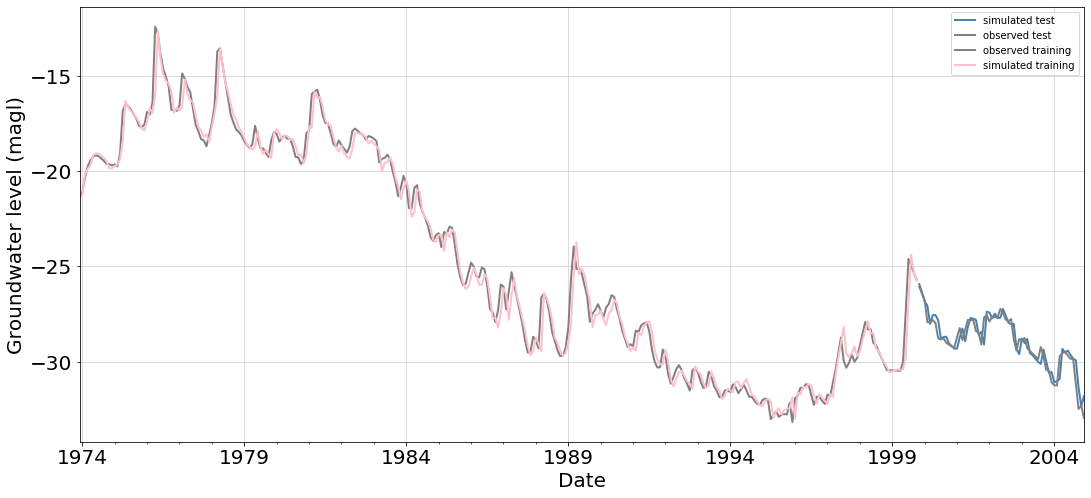

In [59]:
mse_lstm  = summary['mse_lstm'].mean(axis=0)
rmse_lstm = summary['rmse_lstm'].mean(axis=0)
mae_lstm  = summary['mae_lstm'].mean(axis=0)
r2_lstm   = summary['r2_lstm'].mean(axis=0)
stdv_lstm = stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_lstm, 3))
print("Mean squared error is:",round(mse_lstm,3))
print("Root mean squared error is:",round(rmse_lstm, 3))
print("Mean absolute error is:",round(mae_lstm,3))
print(round(stdv_lstm,3))



df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[311:373].index)
df1['observed test']      = pima.iloc[311:373, 0].values

df2 = pd.DataFrame(pima.iloc[0:311, 0].values, columns = ['observed training'],index =pima.iloc[0:311].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [60]:
y_lstm = out_df['simulated test']

### GRU

In [74]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import GRU
from tensorflow.keras.optimizers import Adam

In [62]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_gru', 'rmse_gru', 'r2_gru','mae_gru'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    optimizer = Adam(lr=0.00001)
    model = Sequential()
    model.add(GRU(20, input_shape=(1, 6)))
    model.add(Dropout(0.1))

    model.add(Dense(1))

    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    X_val_reshaped = X_val_reshaped.reshape(62, 6)

    #running function
    gwl = -0.16225336
    test_forecast = X_test
    steps_ahead = 62
    y_gru = forecast(model, test_forecast, gwl, steps_ahead)
    y_gru = np.array(y_gru)
    
    #metrics for test
    y_gru = y_gru
    test_pred.append(y_gru)
    mse_gru = mean_squared_error(y_test, y_gru)
    rmse_gru = np.sqrt(mse_gru)
    r2_gru = r2_score(y_test, y_gru)
    mae_gru = mean_absolute_error(y_test, y_gru)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_gru,Round), round(rmse_gru,Round), round(r2_gru,Round),round(mae_gru,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(311, 6)
Train on 311 samples, validate on 62 samples
Epoch 1/1000
 96/311 [========>.....................] - ETA: 3s - loss: 1.0941 - mean_squared_error: 1.0941
Epoch 00001: val_loss improved from inf to 0.56277, saving model to model.h5
311/311 [==============================] - 4s 13ms/sample - loss: 1.0371 - mean_squared_error: 1.0371 - val_loss: 0.5628 - val_mean_squared_error: 0.5628
Epoch 2/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.8385 - mean_squared_error: 0.8385
Epoch 00002: val_loss improved from 0.56277 to 0.51769, saving model to model.h5
311/311 [==============================] - 0s 178us/sample - loss: 0.8722 - mean_squared_error: 0.8722 - val_loss: 0.5177 - val_mean_squared_error: 0.5177
Epoch 3/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.7511 - mean_squared_error: 0.7511
Epoch 00003: val_loss improved from 0.51769 to 0.46753, saving model to model.h5
311/311 [==============================] - 0s 137us/sample 

Epoch 25/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0598 - mean_squared_error: 0.0598
Epoch 00025: val_loss improved from 0.03135 to 0.02797, saving model to model.h5
311/311 [==============================] - 0s 142us/sample - loss: 0.0581 - mean_squared_error: 0.0581 - val_loss: 0.0280 - val_mean_squared_error: 0.0280
Epoch 26/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0707 - mean_squared_error: 0.0707
Epoch 00026: val_loss improved from 0.02797 to 0.02304, saving model to model.h5
311/311 [==============================] - 0s 139us/sample - loss: 0.0608 - mean_squared_error: 0.0608 - val_loss: 0.0230 - val_mean_squared_error: 0.0230
Epoch 27/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0597 - mean_squared_error: 0.0597
Epoch 00027: val_loss improved from 0.02304 to 0.02197, saving model to model.h5
311/311 [==============================] - 0s 117us/sample - loss: 0.0594 - mean_squared_error: 0.0594 - val_loss: 0.022

Epoch 50/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0412 - mean_squared_error: 0.0412
Epoch 00050: val_loss did not improve from 0.01237
311/311 [==============================] - 0s 123us/sample - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 51/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0456 - mean_squared_error: 0.0456
Epoch 00051: val_loss did not improve from 0.01237
311/311 [==============================] - 0s 105us/sample - loss: 0.0404 - mean_squared_error: 0.0404 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 52/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0284 - mean_squared_error: 0.0284
Epoch 00052: val_loss improved from 0.01237 to 0.01195, saving model to model.h5
311/311 [==============================] - 0s 142us/sample - loss: 0.0380 - mean_squared_error: 0.0380 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 53/1000
 96/311 [==

Epoch 76/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0309 - mean_squared_error: 0.0309
Epoch 00076: val_loss did not improve from 0.01195
311/311 [==============================] - 0s 90us/sample - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 77/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 00077: val_loss did not improve from 0.01195
311/311 [==============================] - 0s 93us/sample - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.0125 - val_mean_squared_error: 0.0125
Epoch 78/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0230 - mean_squared_error: 0.0230
Epoch 00078: val_loss did not improve from 0.01195
311/311 [==============================] - 0s 101us/sample - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.0145 - val_mean_squared_error: 0.0145
Epoch 79/1000
 96/311 [========>.....................] - 

Epoch 128/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0228 - mean_squared_error: 0.0228
Epoch 00128: val_loss did not improve from 0.01094
311/311 [==============================] - 0s 83us/sample - loss: 0.0268 - mean_squared_error: 0.0268 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 129/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0285 - mean_squared_error: 0.0285
Epoch 00129: val_loss did not improve from 0.01094
311/311 [==============================] - 0s 89us/sample - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 130/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0273 - mean_squared_error: 0.0273
Epoch 00130: val_loss did not improve from 0.01094
311/311 [==============================] - 0s 86us/sample - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0125 - val_mean_squared_error: 0.0125
Epoch 131/1000
 96/311 [========>.....................]

Epoch 154/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0351 - mean_squared_error: 0.0351
Epoch 00154: val_loss did not improve from 0.01071
311/311 [==============================] - 0s 89us/sample - loss: 0.0264 - mean_squared_error: 0.0264 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 155/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 00155: val_loss did not improve from 0.01071
311/311 [==============================] - 0s 83us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 156/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 00156: val_loss did not improve from 0.01071
311/311 [==============================] - 0s 76us/sample - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 157/1000
 96/311 [========>.....................]

Epoch 180/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0208 - mean_squared_error: 0.0208
Epoch 00180: val_loss did not improve from 0.01001
311/311 [==============================] - 0s 78us/sample - loss: 0.0261 - mean_squared_error: 0.0261 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 181/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0179 - mean_squared_error: 0.0179
Epoch 00181: val_loss did not improve from 0.01001
311/311 [==============================] - 0s 78us/sample - loss: 0.0268 - mean_squared_error: 0.0268 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 182/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 00182: val_loss did not improve from 0.01001
311/311 [==============================] - 0s 81us/sample - loss: 0.0256 - mean_squared_error: 0.0256 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 183/1000
 96/311 [========>.....................]

Epoch 206/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0226 - mean_squared_error: 0.0226
Epoch 00206: val_loss did not improve from 0.00980
311/311 [==============================] - 0s 90us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 207/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0321 - mean_squared_error: 0.0321
Epoch 00207: val_loss did not improve from 0.00980
311/311 [==============================] - 0s 78us/sample - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 208/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0221 - mean_squared_error: 0.0221
Epoch 00208: val_loss improved from 0.00980 to 0.00975, saving model to model.h5
311/311 [==============================] - 0s 218us/sample - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 209/1000
 96/311 [

Epoch 232/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0187 - mean_squared_error: 0.0187
Epoch 00232: val_loss did not improve from 0.00914
311/311 [==============================] - 0s 115us/sample - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 233/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0234 - mean_squared_error: 0.0234
Epoch 00233: val_loss did not improve from 0.00914
311/311 [==============================] - 0s 98us/sample - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 234/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0302 - mean_squared_error: 0.0302
Epoch 00234: val_loss did not improve from 0.00914
311/311 [==============================] - 0s 91us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 235/1000
 96/311 [========>.....................

Epoch 258/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 00258: val_loss did not improve from 0.00901
311/311 [==============================] - 0s 130us/sample - loss: 0.0208 - mean_squared_error: 0.0208 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 259/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0221 - mean_squared_error: 0.0221
Epoch 00259: val_loss did not improve from 0.00901
311/311 [==============================] - 0s 80us/sample - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 260/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0292 - mean_squared_error: 0.0292
Epoch 00260: val_loss did not improve from 0.00901
311/311 [==============================] - 0s 103us/sample - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 261/1000
 96/311 [========>....................

Epoch 284/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0263 - mean_squared_error: 0.0263
Epoch 00284: val_loss did not improve from 0.00901
311/311 [==============================] - 0s 85us/sample - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 285/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0253 - mean_squared_error: 0.0253
Epoch 00285: val_loss did not improve from 0.00901
311/311 [==============================] - 0s 83us/sample - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 286/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0252 - mean_squared_error: 0.0252
Epoch 00286: val_loss did not improve from 0.00901
311/311 [==============================] - 0s 89us/sample - loss: 0.0217 - mean_squared_error: 0.0217 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 287/1000
 96/311 [========>.....................]

Epoch 310/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 00310: val_loss did not improve from 0.00901
311/311 [==============================] - 0s 97us/sample - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 311/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0261 - mean_squared_error: 0.0261
Epoch 00311: val_loss did not improve from 0.00901
311/311 [==============================] - 0s 97us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 312/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0160 - mean_squared_error: 0.0160
Epoch 00312: val_loss did not improve from 0.00901
311/311 [==============================] - 0s 93us/sample - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 313/1000
 96/311 [========>.....................]

Epoch 336/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0237 - mean_squared_error: 0.0237
Epoch 00336: val_loss did not improve from 0.00879
311/311 [==============================] - 0s 164us/sample - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 337/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0190 - mean_squared_error: 0.0190
Epoch 00337: val_loss did not improve from 0.00879
311/311 [==============================] - 0s 228us/sample - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 338/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0223 - mean_squared_error: 0.0223
Epoch 00338: val_loss did not improve from 0.00879
311/311 [==============================] - 0s 202us/sample - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 339/1000
 96/311 [========>...................

Epoch 362/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 00362: val_loss did not improve from 0.00879
311/311 [==============================] - 0s 82us/sample - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 363/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0257 - mean_squared_error: 0.0257
Epoch 00363: val_loss improved from 0.00879 to 0.00875, saving model to model.h5
311/311 [==============================] - 0s 138us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 364/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0277 - mean_squared_error: 0.0277
Epoch 00364: val_loss improved from 0.00875 to 0.00868, saving model to model.h5
311/311 [==============================] - 0s 134us/sample - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0087 - val_mean_squared_error: 

Epoch 388/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0180 - mean_squared_error: 0.0180
Epoch 00388: val_loss did not improve from 0.00857
311/311 [==============================] - 0s 76us/sample - loss: 0.0208 - mean_squared_error: 0.0208 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 389/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 00389: val_loss did not improve from 0.00857
311/311 [==============================] - 0s 81us/sample - loss: 0.0206 - mean_squared_error: 0.0206 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 390/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 00390: val_loss did not improve from 0.00857
311/311 [==============================] - 0s 74us/sample - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 391/1000
 96/311 [========>.....................]

 96/311 [========>.....................] - ETA: 0s - loss: 0.0160 - mean_squared_error: 0.0160
Epoch 00414: val_loss did not improve from 0.00857
311/311 [==============================] - 0s 76us/sample - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 415/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0202 - mean_squared_error: 0.0202
Epoch 00415: val_loss did not improve from 0.00857
311/311 [==============================] - 0s 78us/sample - loss: 0.0204 - mean_squared_error: 0.0204 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 416/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0189 - mean_squared_error: 0.0189
Epoch 00416: val_loss did not improve from 0.00857
311/311 [==============================] - 0s 73us/sample - loss: 0.0204 - mean_squared_error: 0.0204 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 417/1000
 96/311 [========>.....................] - ETA: 0s - lo

 96/311 [========>.....................] - ETA: 0s - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 00466: val_loss did not improve from 0.00857
311/311 [==============================] - 0s 76us/sample - loss: 0.0206 - mean_squared_error: 0.0206 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 467/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 00467: val_loss did not improve from 0.00857
311/311 [==============================] - 0s 88us/sample - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Running fold 2
(311, 6)
Train on 311 samples, validate on 62 samples
Epoch 1/1000
 96/311 [========>.....................] - ETA: 4s - loss: 0.9063 - mean_squared_error: 0.9063
Epoch 00001: val_loss improved from inf to 0.51195, saving model to model.h5
311/311 [==============================] - 5s 15ms/sample - loss: 0.8060 - mean_squared_error: 0.8060 - val_loss: 0.5119 - val_mean

Epoch 23/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0662 - mean_squared_error: 0.0662
Epoch 00023: val_loss improved from 0.02946 to 0.02588, saving model to model.h5
311/311 [==============================] - 0s 119us/sample - loss: 0.0694 - mean_squared_error: 0.0694 - val_loss: 0.0259 - val_mean_squared_error: 0.0259
Epoch 24/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0614 - mean_squared_error: 0.0614
Epoch 00024: val_loss improved from 0.02588 to 0.02380, saving model to model.h5
311/311 [==============================] - 0s 122us/sample - loss: 0.0606 - mean_squared_error: 0.0606 - val_loss: 0.0238 - val_mean_squared_error: 0.0238
Epoch 25/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0591 - mean_squared_error: 0.0591
Epoch 00025: val_loss improved from 0.02380 to 0.02021, saving model to model.h5
311/311 [==============================] - 0s 136us/sample - loss: 0.0584 - mean_squared_error: 0.0584 - val_loss: 0.020

Epoch 73/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0255 - mean_squared_error: 0.0255
Epoch 00073: val_loss did not improve from 0.01014
311/311 [==============================] - 0s 73us/sample - loss: 0.0313 - mean_squared_error: 0.0313 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 74/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0328 - mean_squared_error: 0.0328
Epoch 00074: val_loss did not improve from 0.01014
311/311 [==============================] - 0s 75us/sample - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 75/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0256 - mean_squared_error: 0.0256
Epoch 00075: val_loss did not improve from 0.01014
311/311 [==============================] - 0s 89us/sample - loss: 0.0298 - mean_squared_error: 0.0298 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 76/1000
 96/311 [========>.....................] - E

Epoch 99/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0215 - mean_squared_error: 0.0215
Epoch 00099: val_loss improved from 0.00959 to 0.00955, saving model to model.h5
311/311 [==============================] - 0s 163us/sample - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 100/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 00100: val_loss did not improve from 0.00955
311/311 [==============================] - 0s 81us/sample - loss: 0.0281 - mean_squared_error: 0.0281 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 101/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0286 - mean_squared_error: 0.0286
Epoch 00101: val_loss improved from 0.00955 to 0.00946, saving model to model.h5
311/311 [==============================] - 0s 122us/sample - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.0095 - val_mean_squared_error: 0

Epoch 125/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0254 - mean_squared_error: 0.0254
Epoch 00125: val_loss did not improve from 0.00907
311/311 [==============================] - 0s 71us/sample - loss: 0.0260 - mean_squared_error: 0.0260 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 126/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0270 - mean_squared_error: 0.0270
Epoch 00126: val_loss did not improve from 0.00907
311/311 [==============================] - 0s 73us/sample - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 127/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0376 - mean_squared_error: 0.0376
Epoch 00127: val_loss did not improve from 0.00907
311/311 [==============================] - 0s 70us/sample - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 128/1000
 96/311 [========>.....................]

Epoch 151/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0182 - mean_squared_error: 0.0182
Epoch 00151: val_loss did not improve from 0.00877
311/311 [==============================] - 0s 72us/sample - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 152/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0252 - mean_squared_error: 0.0252
Epoch 00152: val_loss did not improve from 0.00877
311/311 [==============================] - 0s 70us/sample - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 153/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0188 - mean_squared_error: 0.0188
Epoch 00153: val_loss did not improve from 0.00877
311/311 [==============================] - 0s 71us/sample - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 154/1000
 96/311 [========>.....................]

Epoch 177/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0215 - mean_squared_error: 0.0215
Epoch 00177: val_loss did not improve from 0.00852
311/311 [==============================] - 0s 71us/sample - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 178/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0279 - mean_squared_error: 0.0279
Epoch 00178: val_loss did not improve from 0.00852
311/311 [==============================] - 0s 72us/sample - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 179/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0272 - mean_squared_error: 0.0272
Epoch 00179: val_loss did not improve from 0.00852
311/311 [==============================] - 0s 71us/sample - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 180/1000
 96/311 [========>.....................]

Epoch 203/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0209 - mean_squared_error: 0.0209
Epoch 00203: val_loss did not improve from 0.00852
311/311 [==============================] - 0s 115us/sample - loss: 0.0253 - mean_squared_error: 0.0253 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 204/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0255 - mean_squared_error: 0.0255
Epoch 00204: val_loss did not improve from 0.00852
311/311 [==============================] - 0s 73us/sample - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 205/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0226 - mean_squared_error: 0.0226
Epoch 00205: val_loss did not improve from 0.00852
311/311 [==============================] - 0s 70us/sample - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 206/1000
 96/311 [========>.....................

Epoch 229/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0296 - mean_squared_error: 0.0296
Epoch 00229: val_loss did not improve from 0.00852
311/311 [==============================] - 0s 101us/sample - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 230/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0208 - mean_squared_error: 0.0208
Epoch 00230: val_loss did not improve from 0.00852
311/311 [==============================] - 0s 99us/sample - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 231/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0207 - mean_squared_error: 0.0207
Epoch 00231: val_loss did not improve from 0.00852
311/311 [==============================] - 0s 97us/sample - loss: 0.0186 - mean_squared_error: 0.0186 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 232/1000
 96/311 [========>.....................

 96/311 [========>.....................] - ETA: 0s - loss: 0.0186 - mean_squared_error: 0.0186
Epoch 00255: val_loss did not improve from 0.00852
311/311 [==============================] - 0s 74us/sample - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 256/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0205 - mean_squared_error: 0.0205
Epoch 00256: val_loss did not improve from 0.00852
311/311 [==============================] - 0s 72us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 257/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0221 - mean_squared_error: 0.0221
Epoch 00257: val_loss did not improve from 0.00852
311/311 [==============================] - 0s 72us/sample - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 258/1000
 96/311 [========>.....................] - ETA: 0s - lo

Epoch 33/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0358 - mean_squared_error: 0.0358
Epoch 00033: val_loss improved from 0.01445 to 0.01407, saving model to model.h5
311/311 [==============================] - 0s 127us/sample - loss: 0.0460 - mean_squared_error: 0.0460 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 34/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0468 - mean_squared_error: 0.0468
Epoch 00034: val_loss improved from 0.01407 to 0.01303, saving model to model.h5
311/311 [==============================] - 0s 120us/sample - loss: 0.0452 - mean_squared_error: 0.0452 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 35/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0478 - mean_squared_error: 0.0478
Epoch 00035: val_loss improved from 0.01303 to 0.01248, saving model to model.h5
311/311 [==============================] - 0s 120us/sample - loss: 0.0484 - mean_squared_error: 0.0484 - val_loss: 0.012

 96/311 [========>.....................] - ETA: 0s - loss: 0.0328 - mean_squared_error: 0.0328
Epoch 00084: val_loss did not improve from 0.01044
311/311 [==============================] - 0s 69us/sample - loss: 0.0325 - mean_squared_error: 0.0325 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 85/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 00085: val_loss did not improve from 0.01044
311/311 [==============================] - 0s 70us/sample - loss: 0.0285 - mean_squared_error: 0.0285 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 86/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0282 - mean_squared_error: 0.0282
Epoch 00086: val_loss did not improve from 0.01044
311/311 [==============================] - 0s 69us/sample - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 87/1000
 96/311 [========>.....................] - ETA: 0s - loss:

Epoch 110/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0229 - mean_squared_error: 0.0229
Epoch 00110: val_loss did not improve from 0.01017
311/311 [==============================] - 0s 84us/sample - loss: 0.0248 - mean_squared_error: 0.0248 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 111/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0280 - mean_squared_error: 0.0280
Epoch 00111: val_loss improved from 0.01017 to 0.01012, saving model to model.h5
311/311 [==============================] - 0s 115us/sample - loss: 0.0264 - mean_squared_error: 0.0264 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 112/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0284 - mean_squared_error: 0.0284
Epoch 00112: val_loss improved from 0.01012 to 0.00998, saving model to model.h5
311/311 [==============================] - 0s 119us/sample - loss: 0.0270 - mean_squared_error: 0.0270 - val_loss: 0.0100 - val_mean_squared_error: 

Epoch 161/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 00161: val_loss did not improve from 0.00912
311/311 [==============================] - 0s 79us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 162/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0336 - mean_squared_error: 0.0336
Epoch 00162: val_loss did not improve from 0.00912
311/311 [==============================] - 0s 83us/sample - loss: 0.0250 - mean_squared_error: 0.0250 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 163/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0257 - mean_squared_error: 0.0257
Epoch 00163: val_loss did not improve from 0.00912
311/311 [==============================] - 0s 78us/sample - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 164/1000
 96/311 [========>.....................]

Epoch 187/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0192 - mean_squared_error: 0.0192
Epoch 00187: val_loss did not improve from 0.00869
311/311 [==============================] - 0s 78us/sample - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 188/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0274 - mean_squared_error: 0.0274
Epoch 00188: val_loss did not improve from 0.00869
311/311 [==============================] - 0s 74us/sample - loss: 0.0227 - mean_squared_error: 0.0227 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 189/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0188 - mean_squared_error: 0.0188
Epoch 00189: val_loss did not improve from 0.00869
311/311 [==============================] - 0s 72us/sample - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 190/1000
 96/311 [========>.....................]

 96/311 [========>.....................] - ETA: 0s - loss: 0.0262 - mean_squared_error: 0.0262
Epoch 00213: val_loss did not improve from 0.00869
311/311 [==============================] - 0s 75us/sample - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 214/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 00214: val_loss did not improve from 0.00869
311/311 [==============================] - 0s 77us/sample - loss: 0.0227 - mean_squared_error: 0.0227 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 215/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0176 - mean_squared_error: 0.0176
Epoch 00215: val_loss did not improve from 0.00869
311/311 [==============================] - 0s 79us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 216/1000
 96/311 [========>.....................] - ETA: 0s - lo

Epoch 239/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0282 - mean_squared_error: 0.0282
Epoch 00239: val_loss did not improve from 0.00866
311/311 [==============================] - 0s 75us/sample - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 240/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0209 - mean_squared_error: 0.0209
Epoch 00240: val_loss did not improve from 0.00866
311/311 [==============================] - 0s 83us/sample - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 241/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0203 - mean_squared_error: 0.0203
Epoch 00241: val_loss did not improve from 0.00866
311/311 [==============================] - 0s 78us/sample - loss: 0.0213 - mean_squared_error: 0.0213 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 242/1000
 96/311 [========>.....................]

Epoch 265/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0193 - mean_squared_error: 0.0193
Epoch 00265: val_loss did not improve from 0.00853
311/311 [==============================] - 0s 78us/sample - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 266/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 00266: val_loss did not improve from 0.00853
311/311 [==============================] - 0s 73us/sample - loss: 0.0191 - mean_squared_error: 0.0191 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 267/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 00267: val_loss did not improve from 0.00853
311/311 [==============================] - 0s 78us/sample - loss: 0.0208 - mean_squared_error: 0.0208 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 268/1000
 96/311 [========>.....................]

Epoch 291/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0195 - mean_squared_error: 0.0195
Epoch 00291: val_loss did not improve from 0.00853
311/311 [==============================] - 0s 165us/sample - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 292/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 00292: val_loss did not improve from 0.00853
311/311 [==============================] - 0s 275us/sample - loss: 0.0208 - mean_squared_error: 0.0208 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 293/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0248 - mean_squared_error: 0.0248
Epoch 00293: val_loss did not improve from 0.00853
311/311 [==============================] - 0s 211us/sample - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 294/1000
 96/311 [========>...................

Epoch 317/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 00317: val_loss did not improve from 0.00853
311/311 [==============================] - 0s 119us/sample - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 318/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 00318: val_loss did not improve from 0.00853
311/311 [==============================] - 0s 266us/sample - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 319/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0205 - mean_squared_error: 0.0205
Epoch 00319: val_loss did not improve from 0.00853
311/311 [==============================] - 0s 192us/sample - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 320/1000
 96/311 [========>...................

Epoch 343/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0187 - mean_squared_error: 0.0187
Epoch 00343: val_loss did not improve from 0.00853
311/311 [==============================] - 0s 116us/sample - loss: 0.0206 - mean_squared_error: 0.0206 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 344/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0201 - mean_squared_error: 0.0201
Epoch 00344: val_loss did not improve from 0.00853
311/311 [==============================] - 0s 122us/sample - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 345/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0228 - mean_squared_error: 0.0228
Epoch 00345: val_loss did not improve from 0.00853
311/311 [==============================] - 0s 123us/sample - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 346/1000
 96/311 [========>...................

 96/311 [========>.....................] - ETA: 0s - loss: 0.0653 - mean_squared_error: 0.0653
Epoch 00020: val_loss improved from 0.02071 to 0.01918, saving model to model.h5
311/311 [==============================] - 0s 271us/sample - loss: 0.0527 - mean_squared_error: 0.0527 - val_loss: 0.0192 - val_mean_squared_error: 0.0192
Epoch 21/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0472 - mean_squared_error: 0.0472
Epoch 00021: val_loss improved from 0.01918 to 0.01805, saving model to model.h5
311/311 [==============================] - 0s 241us/sample - loss: 0.0478 - mean_squared_error: 0.0478 - val_loss: 0.0180 - val_mean_squared_error: 0.0180
Epoch 22/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0481 - mean_squared_error: 0.0481
Epoch 00022: val_loss did not improve from 0.01805
311/311 [==============================] - 0s 105us/sample - loss: 0.0486 - mean_squared_error: 0.0486 - val_loss: 0.0181 - val_mean_squared_error: 0.0181
Epoch 23/

Epoch 71/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0295 - mean_squared_error: 0.0295
Epoch 00071: val_loss did not improve from 0.01421
311/311 [==============================] - 0s 172us/sample - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 72/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0276 - mean_squared_error: 0.0276
Epoch 00072: val_loss did not improve from 0.01421
311/311 [==============================] - 0s 112us/sample - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.0146 - val_mean_squared_error: 0.0146
Epoch 73/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0270 - mean_squared_error: 0.0270
Epoch 00073: val_loss did not improve from 0.01421
311/311 [==============================] - 0s 105us/sample - loss: 0.0301 - mean_squared_error: 0.0301 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 74/1000
 96/311 [========>.....................] 

Epoch 97/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0348 - mean_squared_error: 0.0348
Epoch 00097: val_loss did not improve from 0.01312
311/311 [==============================] - 0s 122us/sample - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 98/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0270 - mean_squared_error: 0.0270
Epoch 00098: val_loss did not improve from 0.01312
311/311 [==============================] - 0s 95us/sample - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 99/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0320 - mean_squared_error: 0.0320
Epoch 00099: val_loss did not improve from 0.01312
311/311 [==============================] - 0s 109us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 100/1000
 96/311 [========>.....................] 

Epoch 123/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0319 - mean_squared_error: 0.0319
Epoch 00123: val_loss did not improve from 0.01256
311/311 [==============================] - 0s 118us/sample - loss: 0.0281 - mean_squared_error: 0.0281 - val_loss: 0.0147 - val_mean_squared_error: 0.0147
Epoch 124/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 00124: val_loss did not improve from 0.01256
311/311 [==============================] - 0s 102us/sample - loss: 0.0264 - mean_squared_error: 0.0264 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 125/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 00125: val_loss did not improve from 0.01256
311/311 [==============================] - 0s 79us/sample - loss: 0.0274 - mean_squared_error: 0.0274 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 126/1000
 96/311 [========>....................

Epoch 149/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0223 - mean_squared_error: 0.0223
Epoch 00149: val_loss did not improve from 0.01147
311/311 [==============================] - 0s 97us/sample - loss: 0.0255 - mean_squared_error: 0.0255 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 150/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 00150: val_loss did not improve from 0.01147
311/311 [==============================] - 0s 114us/sample - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 151/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0205 - mean_squared_error: 0.0205
Epoch 00151: val_loss did not improve from 0.01147
311/311 [==============================] - 0s 87us/sample - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0124 - val_mean_squared_error: 0.0124
Epoch 152/1000
 96/311 [========>.....................

Epoch 175/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0273 - mean_squared_error: 0.0273
Epoch 00175: val_loss did not improve from 0.01091
311/311 [==============================] - 0s 86us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 176/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0229 - mean_squared_error: 0.0229
Epoch 00176: val_loss did not improve from 0.01091
311/311 [==============================] - 0s 85us/sample - loss: 0.0234 - mean_squared_error: 0.0234 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 177/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0306 - mean_squared_error: 0.0306
Epoch 00177: val_loss did not improve from 0.01091
311/311 [==============================] - 0s 84us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 178/1000
 96/311 [========>.....................]

Epoch 201/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0222 - mean_squared_error: 0.0222
Epoch 00201: val_loss did not improve from 0.01091
311/311 [==============================] - 0s 112us/sample - loss: 0.0213 - mean_squared_error: 0.0213 - val_loss: 0.0125 - val_mean_squared_error: 0.0125
Epoch 202/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0187 - mean_squared_error: 0.0187
Epoch 00202: val_loss did not improve from 0.01091
311/311 [==============================] - 0s 144us/sample - loss: 0.0200 - mean_squared_error: 0.0200 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 203/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 00203: val_loss did not improve from 0.01091
311/311 [==============================] - 0s 80us/sample - loss: 0.0234 - mean_squared_error: 0.0234 - val_loss: 0.0123 - val_mean_squared_error: 0.0123
Epoch 204/1000
 96/311 [========>....................

Epoch 227/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 00227: val_loss did not improve from 0.01027
311/311 [==============================] - 0s 229us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 228/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0264 - mean_squared_error: 0.0264
Epoch 00228: val_loss did not improve from 0.01027
311/311 [==============================] - 0s 85us/sample - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 229/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 00229: val_loss did not improve from 0.01027
311/311 [==============================] - 0s 78us/sample - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 230/1000
 96/311 [========>.....................

Epoch 253/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 00253: val_loss did not improve from 0.01027
311/311 [==============================] - 0s 80us/sample - loss: 0.0191 - mean_squared_error: 0.0191 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 254/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0227 - mean_squared_error: 0.0227
Epoch 00254: val_loss improved from 0.01027 to 0.01013, saving model to model.h5
311/311 [==============================] - 0s 172us/sample - loss: 0.0201 - mean_squared_error: 0.0201 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 255/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0187 - mean_squared_error: 0.0187
Epoch 00255: val_loss did not improve from 0.01013
311/311 [==============================] - 0s 103us/sample - loss: 0.0231 - mean_squared_error: 0.0231 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 256/1000
 96/311 

Epoch 279/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0163 - mean_squared_error: 0.0163
Epoch 00279: val_loss did not improve from 0.01013
311/311 [==============================] - 0s 112us/sample - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 280/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 00280: val_loss did not improve from 0.01013
311/311 [==============================] - 0s 81us/sample - loss: 0.0187 - mean_squared_error: 0.0187 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 281/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0197 - mean_squared_error: 0.0197
Epoch 00281: val_loss did not improve from 0.01013
311/311 [==============================] - 0s 79us/sample - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 282/1000
 96/311 [========>.....................

Epoch 305/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0276 - mean_squared_error: 0.0276
Epoch 00305: val_loss did not improve from 0.01013
311/311 [==============================] - 0s 135us/sample - loss: 0.0234 - mean_squared_error: 0.0234 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 306/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0217 - mean_squared_error: 0.0217
Epoch 00306: val_loss did not improve from 0.01013
311/311 [==============================] - 0s 108us/sample - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 307/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 00307: val_loss did not improve from 0.01013
311/311 [==============================] - 0s 90us/sample - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 308/1000
 96/311 [========>....................

Epoch 331/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 00331: val_loss did not improve from 0.00973
311/311 [==============================] - 0s 77us/sample - loss: 0.0200 - mean_squared_error: 0.0200 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 332/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0190 - mean_squared_error: 0.0190
Epoch 00332: val_loss did not improve from 0.00973
311/311 [==============================] - 0s 124us/sample - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 333/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 00333: val_loss did not improve from 0.00973
311/311 [==============================] - 0s 75us/sample - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 334/1000
 96/311 [========>.....................

Epoch 357/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 00357: val_loss did not improve from 0.00954
311/311 [==============================] - 0s 90us/sample - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 358/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0160 - mean_squared_error: 0.0160
Epoch 00358: val_loss did not improve from 0.00954
311/311 [==============================] - 0s 95us/sample - loss: 0.0204 - mean_squared_error: 0.0204 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 359/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 00359: val_loss did not improve from 0.00954
311/311 [==============================] - 0s 91us/sample - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 360/1000
 96/311 [========>.....................]

Epoch 383/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0177 - mean_squared_error: 0.0177
Epoch 00383: val_loss did not improve from 0.00954
311/311 [==============================] - 0s 157us/sample - loss: 0.0175 - mean_squared_error: 0.0175 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 384/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0204 - mean_squared_error: 0.0204
Epoch 00384: val_loss did not improve from 0.00954
311/311 [==============================] - 0s 93us/sample - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 385/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 00385: val_loss did not improve from 0.00954
311/311 [==============================] - 0s 111us/sample - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 386/1000
 96/311 [========>....................

Epoch 409/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0245 - mean_squared_error: 0.0245
Epoch 00409: val_loss did not improve from 0.00954
311/311 [==============================] - 0s 76us/sample - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 410/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0204 - mean_squared_error: 0.0204
Epoch 00410: val_loss did not improve from 0.00954
311/311 [==============================] - 0s 77us/sample - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 411/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0206 - mean_squared_error: 0.0206
Epoch 00411: val_loss did not improve from 0.00954
311/311 [==============================] - 0s 78us/sample - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 412/1000
 96/311 [========>.....................]

Epoch 435/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0260 - mean_squared_error: 0.0260
Epoch 00435: val_loss did not improve from 0.00954
311/311 [==============================] - 0s 111us/sample - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 436/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 00436: val_loss did not improve from 0.00954
311/311 [==============================] - 0s 163us/sample - loss: 0.0174 - mean_squared_error: 0.0174 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 437/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0187 - mean_squared_error: 0.0187
Epoch 00437: val_loss did not improve from 0.00954
311/311 [==============================] - 0s 145us/sample - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 438/1000
 96/311 [========>...................

Epoch 12/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0846 - mean_squared_error: 0.0846
Epoch 00012: val_loss improved from 0.01381 to 0.01341, saving model to model.h5
311/311 [==============================] - 0s 162us/sample - loss: 0.0814 - mean_squared_error: 0.0814 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 13/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0949 - mean_squared_error: 0.0949
Epoch 00013: val_loss did not improve from 0.01341
311/311 [==============================] - 0s 91us/sample - loss: 0.0723 - mean_squared_error: 0.0723 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 14/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0631 - mean_squared_error: 0.0631
Epoch 00014: val_loss did not improve from 0.01341
311/311 [==============================] - 0s 176us/sample - loss: 0.0627 - mean_squared_error: 0.0627 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 15/1000
 96/311 [===

Epoch 38/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0404 - mean_squared_error: 0.0404
Epoch 00038: val_loss did not improve from 0.01195
311/311 [==============================] - 0s 87us/sample - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 39/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0266 - mean_squared_error: 0.0266
Epoch 00039: val_loss did not improve from 0.01195
311/311 [==============================] - 0s 79us/sample - loss: 0.0330 - mean_squared_error: 0.0330 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 40/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0263 - mean_squared_error: 0.0263
Epoch 00040: val_loss did not improve from 0.01195
311/311 [==============================] - 0s 87us/sample - loss: 0.0292 - mean_squared_error: 0.0292 - val_loss: 0.0125 - val_mean_squared_error: 0.0125
Epoch 41/1000
 96/311 [========>.....................] - E

Epoch 64/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0308 - mean_squared_error: 0.0308
Epoch 00064: val_loss did not improve from 0.01034
311/311 [==============================] - 0s 112us/sample - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 65/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 00065: val_loss did not improve from 0.01034
311/311 [==============================] - 0s 96us/sample - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 66/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 00066: val_loss did not improve from 0.01034
311/311 [==============================] - 0s 102us/sample - loss: 0.0326 - mean_squared_error: 0.0326 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 67/1000
 96/311 [========>.....................] -

Epoch 90/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0215 - mean_squared_error: 0.0215
Epoch 00090: val_loss did not improve from 0.00908
311/311 [==============================] - 0s 126us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 91/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0283 - mean_squared_error: 0.0283
Epoch 00091: val_loss did not improve from 0.00908
311/311 [==============================] - 0s 164us/sample - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 92/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0315 - mean_squared_error: 0.0315
Epoch 00092: val_loss did not improve from 0.00908
311/311 [==============================] - 0s 157us/sample - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 93/1000
 96/311 [========>.....................] 

Epoch 116/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0245 - mean_squared_error: 0.0245
Epoch 00116: val_loss did not improve from 0.00881
311/311 [==============================] - 0s 112us/sample - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 117/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 00117: val_loss did not improve from 0.00881
311/311 [==============================] - 0s 158us/sample - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 118/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0229 - mean_squared_error: 0.0229
Epoch 00118: val_loss did not improve from 0.00881
311/311 [==============================] - 0s 148us/sample - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 119/1000
 96/311 [========>...................

Epoch 142/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0262 - mean_squared_error: 0.0262
Epoch 00142: val_loss did not improve from 0.00879
311/311 [==============================] - 0s 106us/sample - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 143/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0225 - mean_squared_error: 0.0225
Epoch 00143: val_loss did not improve from 0.00879
311/311 [==============================] - 0s 134us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 144/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0240 - mean_squared_error: 0.0240
Epoch 00144: val_loss did not improve from 0.00879
311/311 [==============================] - 0s 108us/sample - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 145/1000
 96/311 [========>...................

Epoch 168/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 00168: val_loss did not improve from 0.00865
311/311 [==============================] - 0s 95us/sample - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 169/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 00169: val_loss did not improve from 0.00865
311/311 [==============================] - 0s 90us/sample - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 170/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 00170: val_loss did not improve from 0.00865
311/311 [==============================] - 0s 87us/sample - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 171/1000
 96/311 [========>.....................]

Epoch 194/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0201 - mean_squared_error: 0.0201
Epoch 00194: val_loss did not improve from 0.00835
311/311 [==============================] - 0s 106us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 195/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0212 - mean_squared_error: 0.0212
Epoch 00195: val_loss did not improve from 0.00835
311/311 [==============================] - 0s 120us/sample - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 196/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 00196: val_loss did not improve from 0.00835
311/311 [==============================] - 0s 125us/sample - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 197/1000
 96/311 [========>...................

Epoch 220/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0152 - mean_squared_error: 0.0152
Epoch 00220: val_loss did not improve from 0.00828
311/311 [==============================] - 0s 92us/sample - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 221/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0164 - mean_squared_error: 0.0164
Epoch 00221: val_loss did not improve from 0.00828
311/311 [==============================] - 0s 84us/sample - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 222/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0257 - mean_squared_error: 0.0257
Epoch 00222: val_loss did not improve from 0.00828
311/311 [==============================] - 0s 108us/sample - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 223/1000
 96/311 [========>.....................

Epoch 246/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0147 - mean_squared_error: 0.0147
Epoch 00246: val_loss did not improve from 0.00828
311/311 [==============================] - 0s 86us/sample - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 247/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0242 - mean_squared_error: 0.0242
Epoch 00247: val_loss did not improve from 0.00828
311/311 [==============================] - 0s 92us/sample - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 248/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0177 - mean_squared_error: 0.0177
Epoch 00248: val_loss did not improve from 0.00828
311/311 [==============================] - 0s 84us/sample - loss: 0.0203 - mean_squared_error: 0.0203 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 249/1000
 96/311 [========>.....................]

Epoch 272/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 00272: val_loss did not improve from 0.00828
311/311 [==============================] - 0s 150us/sample - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 273/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 00273: val_loss did not improve from 0.00828
311/311 [==============================] - 0s 124us/sample - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.0084 - val_mean_squared_error: 0.0084
Epoch 274/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0214 - mean_squared_error: 0.0214
Epoch 00274: val_loss did not improve from 0.00828
311/311 [==============================] - 0s 115us/sample - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 275/1000
 96/311 [========>...................

Epoch 298/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0182 - mean_squared_error: 0.0182
Epoch 00298: val_loss did not improve from 0.00828
311/311 [==============================] - 0s 84us/sample - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 299/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 00299: val_loss did not improve from 0.00828
311/311 [==============================] - 0s 78us/sample - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 300/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 00300: val_loss did not improve from 0.00828
311/311 [==============================] - 0s 83us/sample - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 301/1000
 96/311 [========>.....................]

 96/311 [========>.....................] - ETA: 0s - loss: 0.0360 - mean_squared_error: 0.0360
Epoch 00030: val_loss did not improve from 0.01299
311/311 [==============================] - 0s 72us/sample - loss: 0.0405 - mean_squared_error: 0.0405 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 31/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0514 - mean_squared_error: 0.0514
Epoch 00031: val_loss did not improve from 0.01299
311/311 [==============================] - 0s 74us/sample - loss: 0.0440 - mean_squared_error: 0.0440 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 32/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0485 - mean_squared_error: 0.0485
Epoch 00032: val_loss improved from 0.01299 to 0.01220, saving model to model.h5
311/311 [==============================] - 0s 178us/sample - loss: 0.0429 - mean_squared_error: 0.0429 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 33/1000
 96/311 [========>.........

Epoch 56/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0253 - mean_squared_error: 0.0253
Epoch 00056: val_loss did not improve from 0.01075
311/311 [==============================] - 0s 105us/sample - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 57/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0291 - mean_squared_error: 0.0291
Epoch 00057: val_loss did not improve from 0.01075
311/311 [==============================] - 0s 81us/sample - loss: 0.0339 - mean_squared_error: 0.0339 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 58/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0402 - mean_squared_error: 0.0402
Epoch 00058: val_loss did not improve from 0.01075
311/311 [==============================] - 0s 87us/sample - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 59/1000
 96/311 [========>.....................] - 

Epoch 82/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0242 - mean_squared_error: 0.0242
Epoch 00082: val_loss did not improve from 0.00988
311/311 [==============================] - 0s 211us/sample - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 83/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0349 - mean_squared_error: 0.0349
Epoch 00083: val_loss did not improve from 0.00988
311/311 [==============================] - 0s 108us/sample - loss: 0.0288 - mean_squared_error: 0.0288 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 84/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0188 - mean_squared_error: 0.0188
Epoch 00084: val_loss did not improve from 0.00988
311/311 [==============================] - 0s 97us/sample - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 85/1000
 96/311 [========>.....................] -

Epoch 108/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0287 - mean_squared_error: 0.0287
Epoch 00108: val_loss did not improve from 0.00973
311/311 [==============================] - 0s 80us/sample - loss: 0.0261 - mean_squared_error: 0.0261 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 109/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0269 - mean_squared_error: 0.0269
Epoch 00109: val_loss did not improve from 0.00973
311/311 [==============================] - 0s 89us/sample - loss: 0.0234 - mean_squared_error: 0.0234 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 110/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0204 - mean_squared_error: 0.0204
Epoch 00110: val_loss did not improve from 0.00973
311/311 [==============================] - 0s 109us/sample - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 111/1000
 96/311 [========>.....................

Epoch 134/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0211 - mean_squared_error: 0.0211
Epoch 00134: val_loss did not improve from 0.00926
311/311 [==============================] - 0s 126us/sample - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 135/1000
192/311 [=================>............] - ETA: 0s - loss: 0.0228 - mean_squared_error: 0.0228
Epoch 00135: val_loss did not improve from 0.00926
311/311 [==============================] - 0s 307us/sample - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 136/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0220 - mean_squared_error: 0.0220
Epoch 00136: val_loss did not improve from 0.00926
311/311 [==============================] - 0s 140us/sample - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 137/1000
 96/311 [========>...................

Epoch 160/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0203 - mean_squared_error: 0.0203
Epoch 00160: val_loss did not improve from 0.00884
311/311 [==============================] - 0s 121us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 161/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0236 - mean_squared_error: 0.0236
Epoch 00161: val_loss did not improve from 0.00884
311/311 [==============================] - 0s 114us/sample - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 162/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0185 - mean_squared_error: 0.0185
Epoch 00162: val_loss did not improve from 0.00884
311/311 [==============================] - 0s 258us/sample - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 163/1000
 96/311 [========>...................

Epoch 186/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0213 - mean_squared_error: 0.0213
Epoch 00186: val_loss did not improve from 0.00874
311/311 [==============================] - 0s 155us/sample - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 187/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0279 - mean_squared_error: 0.0279
Epoch 00187: val_loss did not improve from 0.00874
311/311 [==============================] - 0s 106us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 188/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0266 - mean_squared_error: 0.0266
Epoch 00188: val_loss did not improve from 0.00874
311/311 [==============================] - 0s 164us/sample - loss: 0.0271 - mean_squared_error: 0.0271 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 189/1000
 96/311 [========>...................

Epoch 212/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0239 - mean_squared_error: 0.0239
Epoch 00212: val_loss did not improve from 0.00873
311/311 [==============================] - 0s 87us/sample - loss: 0.0227 - mean_squared_error: 0.0227 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 213/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0201 - mean_squared_error: 0.0201
Epoch 00213: val_loss did not improve from 0.00873
311/311 [==============================] - 0s 114us/sample - loss: 0.0248 - mean_squared_error: 0.0248 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 214/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0275 - mean_squared_error: 0.0275
Epoch 00214: val_loss did not improve from 0.00873
311/311 [==============================] - 0s 120us/sample - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 215/1000
 96/311 [========>....................

Epoch 238/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0194 - mean_squared_error: 0.0194
Epoch 00238: val_loss did not improve from 0.00864
311/311 [==============================] - 0s 93us/sample - loss: 0.0187 - mean_squared_error: 0.0187 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 239/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 00239: val_loss did not improve from 0.00864
311/311 [==============================] - 0s 104us/sample - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 240/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0225 - mean_squared_error: 0.0225
Epoch 00240: val_loss did not improve from 0.00864
311/311 [==============================] - 0s 126us/sample - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 241/1000
 96/311 [========>....................

Epoch 264/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0237 - mean_squared_error: 0.0237
Epoch 00264: val_loss did not improve from 0.00852
311/311 [==============================] - 0s 118us/sample - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 265/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0223 - mean_squared_error: 0.0223
Epoch 00265: val_loss did not improve from 0.00852
311/311 [==============================] - 0s 145us/sample - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 266/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0193 - mean_squared_error: 0.0193
Epoch 00266: val_loss did not improve from 0.00852
311/311 [==============================] - 0s 105us/sample - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 267/1000
 96/311 [========>...................

Epoch 290/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0216 - mean_squared_error: 0.0216
Epoch 00290: val_loss did not improve from 0.00852
311/311 [==============================] - 0s 112us/sample - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 291/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0206 - mean_squared_error: 0.0206
Epoch 00291: val_loss did not improve from 0.00852
311/311 [==============================] - 0s 91us/sample - loss: 0.0206 - mean_squared_error: 0.0206 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 292/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0222 - mean_squared_error: 0.0222
Epoch 00292: val_loss did not improve from 0.00852
311/311 [==============================] - 0s 78us/sample - loss: 0.0203 - mean_squared_error: 0.0203 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 293/1000
 96/311 [========>.....................

Epoch 316/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0206 - mean_squared_error: 0.0206
Epoch 00316: val_loss did not improve from 0.00852
311/311 [==============================] - 0s 107us/sample - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 317/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0195 - mean_squared_error: 0.0195
Epoch 00317: val_loss did not improve from 0.00852
311/311 [==============================] - 0s 123us/sample - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 318/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0152 - mean_squared_error: 0.0152
Epoch 00318: val_loss did not improve from 0.00852
311/311 [==============================] - 0s 106us/sample - loss: 0.0204 - mean_squared_error: 0.0204 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 319/1000
 96/311 [========>...................

Epoch 342/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 00342: val_loss did not improve from 0.00852
311/311 [==============================] - 0s 101us/sample - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 343/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0227 - mean_squared_error: 0.0227
Epoch 00343: val_loss did not improve from 0.00852
311/311 [==============================] - 0s 106us/sample - loss: 0.0202 - mean_squared_error: 0.0202 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 344/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0180 - mean_squared_error: 0.0180
Epoch 00344: val_loss did not improve from 0.00852
311/311 [==============================] - 0s 112us/sample - loss: 0.0196 - mean_squared_error: 0.0196 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 345/1000
 96/311 [========>...................

311/311 [==============================] - 0s 153us/sample - loss: 0.1227 - mean_squared_error: 0.1227 - val_loss: 0.0616 - val_mean_squared_error: 0.0616
Epoch 15/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.1182 - mean_squared_error: 0.1182
Epoch 00015: val_loss improved from 0.06158 to 0.05179, saving model to model.h5
311/311 [==============================] - 0s 146us/sample - loss: 0.1196 - mean_squared_error: 0.1196 - val_loss: 0.0518 - val_mean_squared_error: 0.0518
Epoch 16/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.1152 - mean_squared_error: 0.1152
Epoch 00016: val_loss improved from 0.05179 to 0.04223, saving model to model.h5
311/311 [==============================] - 0s 235us/sample - loss: 0.0992 - mean_squared_error: 0.0992 - val_loss: 0.0422 - val_mean_squared_error: 0.0422
Epoch 17/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0963 - mean_squared_error: 0.0963
Epoch 00017: val_loss improved from 0.04223 to

Epoch 40/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0643 - mean_squared_error: 0.0643
Epoch 00040: val_loss did not improve from 0.01377
311/311 [==============================] - 0s 132us/sample - loss: 0.0438 - mean_squared_error: 0.0438 - val_loss: 0.0162 - val_mean_squared_error: 0.0162
Epoch 41/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0423 - mean_squared_error: 0.0423
Epoch 00041: val_loss did not improve from 0.01377
311/311 [==============================] - 0s 156us/sample - loss: 0.0469 - mean_squared_error: 0.0469 - val_loss: 0.0144 - val_mean_squared_error: 0.0144
Epoch 42/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0427 - mean_squared_error: 0.0427
Epoch 00042: val_loss did not improve from 0.01377
311/311 [==============================] - 0s 153us/sample - loss: 0.0366 - mean_squared_error: 0.0366 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 43/1000
 96/311 [========>.....................] 

Epoch 66/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0254 - mean_squared_error: 0.0254
Epoch 00066: val_loss did not improve from 0.01125
311/311 [==============================] - 0s 96us/sample - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 67/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0273 - mean_squared_error: 0.0273
Epoch 00067: val_loss did not improve from 0.01125
311/311 [==============================] - 0s 103us/sample - loss: 0.0332 - mean_squared_error: 0.0332 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 68/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0429 - mean_squared_error: 0.0429
Epoch 00068: val_loss did not improve from 0.01125
311/311 [==============================] - 0s 102us/sample - loss: 0.0345 - mean_squared_error: 0.0345 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 69/1000
 96/311 [========>.....................] -

Epoch 92/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0260 - mean_squared_error: 0.0260
Epoch 00092: val_loss did not improve from 0.01063
311/311 [==============================] - 0s 158us/sample - loss: 0.0266 - mean_squared_error: 0.0266 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 93/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0301 - mean_squared_error: 0.0301
Epoch 00093: val_loss did not improve from 0.01063
311/311 [==============================] - 0s 176us/sample - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 94/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0323 - mean_squared_error: 0.0323
Epoch 00094: val_loss did not improve from 0.01063
311/311 [==============================] - 0s 135us/sample - loss: 0.0261 - mean_squared_error: 0.0261 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 95/1000
 96/311 [========>.....................] 

Epoch 118/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0503 - mean_squared_error: 0.0503
Epoch 00118: val_loss did not improve from 0.00982
311/311 [==============================] - 0s 108us/sample - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 119/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0347 - mean_squared_error: 0.0347
Epoch 00119: val_loss did not improve from 0.00982
311/311 [==============================] - 0s 103us/sample - loss: 0.0291 - mean_squared_error: 0.0291 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 120/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0383 - mean_squared_error: 0.0383
Epoch 00120: val_loss did not improve from 0.00982
311/311 [==============================] - 0s 109us/sample - loss: 0.0264 - mean_squared_error: 0.0264 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 121/1000
 96/311 [========>...................

Epoch 144/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0216 - mean_squared_error: 0.0216
Epoch 00144: val_loss did not improve from 0.00958
311/311 [==============================] - 0s 100us/sample - loss: 0.0260 - mean_squared_error: 0.0260 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 145/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0203 - mean_squared_error: 0.0203
Epoch 00145: val_loss did not improve from 0.00958
311/311 [==============================] - 0s 121us/sample - loss: 0.0247 - mean_squared_error: 0.0247 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 146/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0253 - mean_squared_error: 0.0253
Epoch 00146: val_loss improved from 0.00958 to 0.00932, saving model to model.h5
311/311 [==============================] - 0s 226us/sample - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 147/1000
 96/311

Epoch 170/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0269 - mean_squared_error: 0.0269
Epoch 00170: val_loss did not improve from 0.00932
311/311 [==============================] - 0s 136us/sample - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 171/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0255 - mean_squared_error: 0.0255
Epoch 00171: val_loss did not improve from 0.00932
311/311 [==============================] - 0s 118us/sample - loss: 0.0244 - mean_squared_error: 0.0244 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 172/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0202 - mean_squared_error: 0.0202
Epoch 00172: val_loss did not improve from 0.00932
311/311 [==============================] - 0s 270us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 173/1000
 96/311 [========>...................

Epoch 196/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0159 - mean_squared_error: 0.0159
Epoch 00196: val_loss did not improve from 0.00932
311/311 [==============================] - 0s 131us/sample - loss: 0.0220 - mean_squared_error: 0.0220 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 197/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 00197: val_loss did not improve from 0.00932
311/311 [==============================] - 0s 161us/sample - loss: 0.0210 - mean_squared_error: 0.0210 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 198/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 00198: val_loss did not improve from 0.00932
311/311 [==============================] - 0s 84us/sample - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 199/1000
 96/311 [========>....................

Epoch 222/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0274 - mean_squared_error: 0.0274
Epoch 00222: val_loss did not improve from 0.00891
311/311 [==============================] - 0s 79us/sample - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 223/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0256 - mean_squared_error: 0.0256
Epoch 00223: val_loss did not improve from 0.00891
311/311 [==============================] - 0s 98us/sample - loss: 0.0233 - mean_squared_error: 0.0233 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 224/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0280 - mean_squared_error: 0.0280
Epoch 00224: val_loss did not improve from 0.00891
311/311 [==============================] - 0s 91us/sample - loss: 0.0266 - mean_squared_error: 0.0266 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 225/1000
 96/311 [========>.....................]

Epoch 248/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0209 - mean_squared_error: 0.0209
Epoch 00248: val_loss improved from 0.00891 to 0.00882, saving model to model.h5
311/311 [==============================] - 0s 142us/sample - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 249/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 00249: val_loss did not improve from 0.00882
311/311 [==============================] - 0s 80us/sample - loss: 0.0195 - mean_squared_error: 0.0195 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 250/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0273 - mean_squared_error: 0.0273
Epoch 00250: val_loss did not improve from 0.00882
311/311 [==============================] - 0s 75us/sample - loss: 0.0260 - mean_squared_error: 0.0260 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 251/1000
 96/311 [

Epoch 274/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0212 - mean_squared_error: 0.0212
Epoch 00274: val_loss improved from 0.00879 to 0.00859, saving model to model.h5
311/311 [==============================] - 0s 136us/sample - loss: 0.0186 - mean_squared_error: 0.0186 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 275/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 00275: val_loss did not improve from 0.00859
311/311 [==============================] - 0s 83us/sample - loss: 0.0204 - mean_squared_error: 0.0204 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 276/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0183 - mean_squared_error: 0.0183
Epoch 00276: val_loss did not improve from 0.00859
311/311 [==============================] - 0s 86us/sample - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 277/1000
 96/311 [

Epoch 300/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0156 - mean_squared_error: 0.0156
Epoch 00300: val_loss did not improve from 0.00859
311/311 [==============================] - 0s 99us/sample - loss: 0.0185 - mean_squared_error: 0.0185 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 301/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0193 - mean_squared_error: 0.0193
Epoch 00301: val_loss did not improve from 0.00859
311/311 [==============================] - 0s 86us/sample - loss: 0.0187 - mean_squared_error: 0.0187 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 302/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 00302: val_loss did not improve from 0.00859
311/311 [==============================] - 0s 84us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 303/1000
 96/311 [========>.....................]

Epoch 326/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0143 - mean_squared_error: 0.0143
Epoch 00326: val_loss did not improve from 0.00859
311/311 [==============================] - 0s 87us/sample - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 327/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0188 - mean_squared_error: 0.0188
Epoch 00327: val_loss did not improve from 0.00859
311/311 [==============================] - 0s 115us/sample - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 328/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 00328: val_loss did not improve from 0.00859
311/311 [==============================] - 0s 85us/sample - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 329/1000
 96/311 [========>.....................

Epoch 352/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 00352: val_loss did not improve from 0.00859
311/311 [==============================] - 0s 123us/sample - loss: 0.0175 - mean_squared_error: 0.0175 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 353/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 00353: val_loss did not improve from 0.00859
311/311 [==============================] - 0s 112us/sample - loss: 0.0175 - mean_squared_error: 0.0175 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 354/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0185 - mean_squared_error: 0.0185
Epoch 00354: val_loss did not improve from 0.00859
311/311 [==============================] - 0s 107us/sample - loss: 0.0201 - mean_squared_error: 0.0201 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 355/1000
 96/311 [========>...................

Epoch 4/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.9896 - mean_squared_error: 0.9896
Epoch 00004: val_loss improved from 0.31020 to 0.27587, saving model to model.h5
311/311 [==============================] - 0s 174us/sample - loss: 0.9897 - mean_squared_error: 0.9897 - val_loss: 0.2759 - val_mean_squared_error: 0.2759
Epoch 5/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.9962 - mean_squared_error: 0.9962
Epoch 00005: val_loss improved from 0.27587 to 0.24669, saving model to model.h5
311/311 [==============================] - 0s 252us/sample - loss: 0.8964 - mean_squared_error: 0.8964 - val_loss: 0.2467 - val_mean_squared_error: 0.2467
Epoch 6/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.8597 - mean_squared_error: 0.8597
Epoch 00006: val_loss improved from 0.24669 to 0.22427, saving model to model.h5
311/311 [==============================] - 0s 185us/sample - loss: 0.8200 - mean_squared_error: 0.8200 - val_loss: 0.2243 -

Epoch 28/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0544 - mean_squared_error: 0.0544
Epoch 00028: val_loss did not improve from 0.01952
311/311 [==============================] - 0s 100us/sample - loss: 0.0526 - mean_squared_error: 0.0526 - val_loss: 0.0201 - val_mean_squared_error: 0.0201
Epoch 29/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0556 - mean_squared_error: 0.0556
Epoch 00029: val_loss did not improve from 0.01952
311/311 [==============================] - 0s 122us/sample - loss: 0.0533 - mean_squared_error: 0.0533 - val_loss: 0.0205 - val_mean_squared_error: 0.0205
Epoch 30/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0429 - mean_squared_error: 0.0429
Epoch 00030: val_loss did not improve from 0.01952
311/311 [==============================] - 0s 104us/sample - loss: 0.0505 - mean_squared_error: 0.0505 - val_loss: 0.0198 - val_mean_squared_error: 0.0198
Epoch 31/1000
 96/311 [========>.....................] 

 96/311 [========>.....................] - ETA: 0s - loss: 0.0446 - mean_squared_error: 0.0446
Epoch 00079: val_loss did not improve from 0.01218
311/311 [==============================] - 0s 83us/sample - loss: 0.0297 - mean_squared_error: 0.0297 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 80/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 00080: val_loss did not improve from 0.01218
311/311 [==============================] - 0s 88us/sample - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 81/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0297 - mean_squared_error: 0.0297
Epoch 00081: val_loss did not improve from 0.01218
311/311 [==============================] - 0s 90us/sample - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 82/1000
 96/311 [========>.....................] - ETA: 0s - loss:

Epoch 105/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0261 - mean_squared_error: 0.0261
Epoch 00105: val_loss did not improve from 0.01118
311/311 [==============================] - 0s 139us/sample - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 106/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0326 - mean_squared_error: 0.0326
Epoch 00106: val_loss did not improve from 0.01118
311/311 [==============================] - 0s 126us/sample - loss: 0.0277 - mean_squared_error: 0.0277 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 107/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0236 - mean_squared_error: 0.0236
Epoch 00107: val_loss improved from 0.01118 to 0.01112, saving model to model.h5
311/311 [==============================] - 0s 186us/sample - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 108/1000
 96/311

Epoch 131/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0256 - mean_squared_error: 0.0256
Epoch 00131: val_loss did not improve from 0.01019
311/311 [==============================] - 0s 111us/sample - loss: 0.0226 - mean_squared_error: 0.0226 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 132/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0251 - mean_squared_error: 0.0251
Epoch 00132: val_loss improved from 0.01019 to 0.01014, saving model to model.h5
311/311 [==============================] - 0s 180us/sample - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 133/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0274 - mean_squared_error: 0.0274
Epoch 00133: val_loss did not improve from 0.01014
311/311 [==============================] - 0s 88us/sample - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 134/1000
 96/311 

Epoch 157/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0252 - mean_squared_error: 0.0252
Epoch 00157: val_loss did not improve from 0.00962
311/311 [==============================] - 0s 131us/sample - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 158/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 00158: val_loss did not improve from 0.00962
311/311 [==============================] - 0s 123us/sample - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 159/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0242 - mean_squared_error: 0.0242
Epoch 00159: val_loss did not improve from 0.00962
311/311 [==============================] - 0s 138us/sample - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 160/1000
 96/311 [========>...................

Epoch 183/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0212 - mean_squared_error: 0.0212
Epoch 00183: val_loss did not improve from 0.00962
311/311 [==============================] - 0s 137us/sample - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 184/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0190 - mean_squared_error: 0.0190
Epoch 00184: val_loss did not improve from 0.00962
311/311 [==============================] - 0s 235us/sample - loss: 0.0248 - mean_squared_error: 0.0248 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 185/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0225 - mean_squared_error: 0.0225
Epoch 00185: val_loss did not improve from 0.00962
311/311 [==============================] - 0s 184us/sample - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 186/1000
 96/311 [========>...................

Epoch 209/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0226 - mean_squared_error: 0.0226
Epoch 00209: val_loss did not improve from 0.00924
311/311 [==============================] - 0s 87us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 210/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0190 - mean_squared_error: 0.0190
Epoch 00210: val_loss improved from 0.00924 to 0.00911, saving model to model.h5
311/311 [==============================] - 0s 154us/sample - loss: 0.0234 - mean_squared_error: 0.0234 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 211/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0245 - mean_squared_error: 0.0245
Epoch 00211: val_loss did not improve from 0.00911
311/311 [==============================] - 0s 105us/sample - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 212/1000
 96/311 

Epoch 235/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 00235: val_loss did not improve from 0.00903
311/311 [==============================] - 0s 190us/sample - loss: 0.0202 - mean_squared_error: 0.0202 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 236/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0240 - mean_squared_error: 0.0240
Epoch 00236: val_loss did not improve from 0.00903
311/311 [==============================] - 0s 151us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 237/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0175 - mean_squared_error: 0.0175
Epoch 00237: val_loss did not improve from 0.00903
311/311 [==============================] - 0s 122us/sample - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 238/1000
 96/311 [========>...................

Epoch 261/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0261 - mean_squared_error: 0.0261
Epoch 00261: val_loss did not improve from 0.00896
311/311 [==============================] - 0s 82us/sample - loss: 0.0258 - mean_squared_error: 0.0258 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 262/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 00262: val_loss did not improve from 0.00896
311/311 [==============================] - 0s 82us/sample - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 263/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0208 - mean_squared_error: 0.0208
Epoch 00263: val_loss did not improve from 0.00896
311/311 [==============================] - 0s 91us/sample - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 264/1000
 96/311 [========>.....................]

Epoch 287/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0284 - mean_squared_error: 0.0284
Epoch 00287: val_loss did not improve from 0.00877
311/311 [==============================] - 0s 82us/sample - loss: 0.0227 - mean_squared_error: 0.0227 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 288/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0295 - mean_squared_error: 0.0295
Epoch 00288: val_loss did not improve from 0.00877
311/311 [==============================] - 0s 84us/sample - loss: 0.0217 - mean_squared_error: 0.0217 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 289/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 00289: val_loss did not improve from 0.00877
311/311 [==============================] - 0s 99us/sample - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 290/1000
 96/311 [========>.....................]

Epoch 313/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0145 - mean_squared_error: 0.0145
Epoch 00313: val_loss did not improve from 0.00877
311/311 [==============================] - 0s 81us/sample - loss: 0.0187 - mean_squared_error: 0.0187 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 314/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0236 - mean_squared_error: 0.0236
Epoch 00314: val_loss did not improve from 0.00877
311/311 [==============================] - 0s 81us/sample - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 315/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0166 - mean_squared_error: 0.0166
Epoch 00315: val_loss did not improve from 0.00877
311/311 [==============================] - 0s 109us/sample - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 316/1000
 96/311 [========>.....................

Epoch 339/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 00339: val_loss did not improve from 0.00864
311/311 [==============================] - 0s 92us/sample - loss: 0.0178 - mean_squared_error: 0.0178 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 340/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0182 - mean_squared_error: 0.0182
Epoch 00340: val_loss did not improve from 0.00864
311/311 [==============================] - 0s 119us/sample - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.0089 - val_mean_squared_error: 0.0089
Epoch 341/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0196 - mean_squared_error: 0.0196
Epoch 00341: val_loss did not improve from 0.00864
311/311 [==============================] - 0s 87us/sample - loss: 0.0203 - mean_squared_error: 0.0203 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 342/1000
 96/311 [========>.....................

Epoch 365/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0178 - mean_squared_error: 0.0178
Epoch 00365: val_loss did not improve from 0.00864
311/311 [==============================] - 0s 75us/sample - loss: 0.0201 - mean_squared_error: 0.0201 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 366/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0172 - mean_squared_error: 0.0172
Epoch 00366: val_loss did not improve from 0.00864
311/311 [==============================] - 0s 83us/sample - loss: 0.0185 - mean_squared_error: 0.0185 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 367/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0300 - mean_squared_error: 0.0300
Epoch 00367: val_loss did not improve from 0.00864
311/311 [==============================] - 0s 82us/sample - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 368/1000
 96/311 [========>.....................]

Epoch 391/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0135 - mean_squared_error: 0.0135
Epoch 00391: val_loss did not improve from 0.00864
311/311 [==============================] - 0s 91us/sample - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 392/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0174 - mean_squared_error: 0.0174
Epoch 00392: val_loss did not improve from 0.00864
311/311 [==============================] - 0s 89us/sample - loss: 0.0195 - mean_squared_error: 0.0195 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 393/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 00393: val_loss did not improve from 0.00864
311/311 [==============================] - 0s 83us/sample - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 394/1000
 96/311 [========>.....................]

 96/311 [========>.....................] - ETA: 0s - loss: 0.0185 - mean_squared_error: 0.0185
Epoch 00417: val_loss did not improve from 0.00864
311/311 [==============================] - 0s 78us/sample - loss: 0.0200 - mean_squared_error: 0.0200 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 418/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0211 - mean_squared_error: 0.0211
Epoch 00418: val_loss did not improve from 0.00864
311/311 [==============================] - 0s 79us/sample - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 419/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 00419: val_loss did not improve from 0.00864
311/311 [==============================] - 0s 81us/sample - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0.0094 - val_mean_squared_error: 0.0094
Epoch 420/1000
 96/311 [========>.....................] - ETA: 0s - lo

Epoch 7/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.2160 - mean_squared_error: 0.2160
Epoch 00007: val_loss improved from 0.18906 to 0.17372, saving model to model.h5
311/311 [==============================] - 0s 182us/sample - loss: 0.2527 - mean_squared_error: 0.2527 - val_loss: 0.1737 - val_mean_squared_error: 0.1737
Epoch 8/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.2752 - mean_squared_error: 0.2752
Epoch 00008: val_loss improved from 0.17372 to 0.15924, saving model to model.h5
311/311 [==============================] - 0s 174us/sample - loss: 0.2340 - mean_squared_error: 0.2340 - val_loss: 0.1592 - val_mean_squared_error: 0.1592
Epoch 9/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.1939 - mean_squared_error: 0.1939
Epoch 00009: val_loss improved from 0.15924 to 0.14173, saving model to model.h5
311/311 [==============================] - 0s 175us/sample - loss: 0.2053 - mean_squared_error: 0.2053 - val_loss: 0.1417 -

Epoch 31/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0486 - mean_squared_error: 0.0486
Epoch 00031: val_loss improved from 0.01428 to 0.01392, saving model to model.h5
311/311 [==============================] - 0s 153us/sample - loss: 0.0444 - mean_squared_error: 0.0444 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 32/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0544 - mean_squared_error: 0.0544
Epoch 00032: val_loss improved from 0.01392 to 0.01336, saving model to model.h5
311/311 [==============================] - 0s 181us/sample - loss: 0.0490 - mean_squared_error: 0.0490 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 33/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0403 - mean_squared_error: 0.0403
Epoch 00033: val_loss improved from 0.01336 to 0.01321, saving model to model.h5
311/311 [==============================] - 0s 134us/sample - loss: 0.0396 - mean_squared_error: 0.0396 - val_loss: 0.013

Epoch 56/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0348 - mean_squared_error: 0.0348
Epoch 00056: val_loss did not improve from 0.01191
311/311 [==============================] - 0s 101us/sample - loss: 0.0334 - mean_squared_error: 0.0334 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 57/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0379 - mean_squared_error: 0.0379
Epoch 00057: val_loss did not improve from 0.01191
311/311 [==============================] - 0s 100us/sample - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 58/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0341 - mean_squared_error: 0.0341
Epoch 00058: val_loss did not improve from 0.01191
311/311 [==============================] - 0s 100us/sample - loss: 0.0310 - mean_squared_error: 0.0310 - val_loss: 0.0123 - val_mean_squared_error: 0.0123
Epoch 59/1000
 96/311 [========>.....................] 

Epoch 82/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0333 - mean_squared_error: 0.0333
Epoch 00082: val_loss did not improve from 0.01183
311/311 [==============================] - 0s 104us/sample - loss: 0.0316 - mean_squared_error: 0.0316 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 83/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0366 - mean_squared_error: 0.0366
Epoch 00083: val_loss did not improve from 0.01183
311/311 [==============================] - 0s 95us/sample - loss: 0.0368 - mean_squared_error: 0.0368 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 84/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0347 - mean_squared_error: 0.0347
Epoch 00084: val_loss did not improve from 0.01183
311/311 [==============================] - 0s 112us/sample - loss: 0.0315 - mean_squared_error: 0.0315 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 85/1000
 96/311 [========>.....................] -

Epoch 108/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0319 - mean_squared_error: 0.0319
Epoch 00108: val_loss did not improve from 0.01123
311/311 [==============================] - 0s 93us/sample - loss: 0.0293 - mean_squared_error: 0.0293 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 109/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0309 - mean_squared_error: 0.0309
Epoch 00109: val_loss did not improve from 0.01123
311/311 [==============================] - 0s 110us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 110/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0261 - mean_squared_error: 0.0261
Epoch 00110: val_loss did not improve from 0.01123
311/311 [==============================] - 0s 114us/sample - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 111/1000
 96/311 [========>....................

Epoch 134/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0303 - mean_squared_error: 0.0303
Epoch 00134: val_loss did not improve from 0.01123
311/311 [==============================] - 0s 82us/sample - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 135/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0274 - mean_squared_error: 0.0274
Epoch 00135: val_loss did not improve from 0.01123
311/311 [==============================] - 0s 84us/sample - loss: 0.0252 - mean_squared_error: 0.0252 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 136/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0277 - mean_squared_error: 0.0277
Epoch 00136: val_loss improved from 0.01123 to 0.01106, saving model to model.h5
311/311 [==============================] - 0s 150us/sample - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 137/1000
 96/311 [

Epoch 160/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0248 - mean_squared_error: 0.0248
Epoch 00160: val_loss did not improve from 0.01074
311/311 [==============================] - 0s 121us/sample - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 161/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 00161: val_loss did not improve from 0.01074
311/311 [==============================] - 0s 86us/sample - loss: 0.0231 - mean_squared_error: 0.0231 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 162/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 00162: val_loss did not improve from 0.01074
311/311 [==============================] - 0s 87us/sample - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 163/1000
 96/311 [========>.....................

 96/311 [========>.....................] - ETA: 0s - loss: 0.0237 - mean_squared_error: 0.0237
Epoch 00186: val_loss did not improve from 0.01074
311/311 [==============================] - 0s 106us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 187/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0201 - mean_squared_error: 0.0201
Epoch 00187: val_loss did not improve from 0.01074
311/311 [==============================] - 0s 77us/sample - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 188/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0281 - mean_squared_error: 0.0281
Epoch 00188: val_loss did not improve from 0.01074
311/311 [==============================] - 0s 78us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 189/1000
 96/311 [========>.....................] - ETA: 0s - l

Epoch 212/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0217 - mean_squared_error: 0.0217
Epoch 00212: val_loss did not improve from 0.01047
311/311 [==============================] - 0s 77us/sample - loss: 0.0247 - mean_squared_error: 0.0247 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 213/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0282 - mean_squared_error: 0.0282
Epoch 00213: val_loss improved from 0.01047 to 0.01021, saving model to model.h5
311/311 [==============================] - 0s 130us/sample - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 214/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0223 - mean_squared_error: 0.0223
Epoch 00214: val_loss improved from 0.01021 to 0.01017, saving model to model.h5
311/311 [==============================] - 0s 145us/sample - loss: 0.0217 - mean_squared_error: 0.0217 - val_loss: 0.0102 - val_mean_squared_error: 

Epoch 238/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0211 - mean_squared_error: 0.0211
Epoch 00238: val_loss did not improve from 0.01014
311/311 [==============================] - 0s 81us/sample - loss: 0.0204 - mean_squared_error: 0.0204 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 239/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0226 - mean_squared_error: 0.0226
Epoch 00239: val_loss did not improve from 0.01014
311/311 [==============================] - 0s 73us/sample - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 240/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0170 - mean_squared_error: 0.0170
Epoch 00240: val_loss did not improve from 0.01014
311/311 [==============================] - 0s 76us/sample - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 241/1000
 96/311 [========>.....................]

Epoch 264/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0319 - mean_squared_error: 0.0319
Epoch 00264: val_loss improved from 0.00980 to 0.00979, saving model to model.h5
311/311 [==============================] - 0s 227us/sample - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 265/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0189 - mean_squared_error: 0.0189
Epoch 00265: val_loss did not improve from 0.00979
311/311 [==============================] - 0s 163us/sample - loss: 0.0206 - mean_squared_error: 0.0206 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 266/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 00266: val_loss did not improve from 0.00979
311/311 [==============================] - 0s 186us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 267/1000
 96/311

Epoch 290/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0251 - mean_squared_error: 0.0251
Epoch 00290: val_loss did not improve from 0.00961
311/311 [==============================] - 0s 93us/sample - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 291/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0219 - mean_squared_error: 0.0219
Epoch 00291: val_loss improved from 0.00961 to 0.00961, saving model to model.h5
311/311 [==============================] - 0s 150us/sample - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 292/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0160 - mean_squared_error: 0.0160
Epoch 00292: val_loss improved from 0.00961 to 0.00952, saving model to model.h5
311/311 [==============================] - 0s 130us/sample - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0095 - val_mean_squared_error: 

Epoch 316/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 00316: val_loss did not improve from 0.00930
311/311 [==============================] - 0s 77us/sample - loss: 0.0192 - mean_squared_error: 0.0192 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 317/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0221 - mean_squared_error: 0.0221
Epoch 00317: val_loss did not improve from 0.00930
311/311 [==============================] - 0s 104us/sample - loss: 0.0202 - mean_squared_error: 0.0202 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 318/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0154 - mean_squared_error: 0.0154
Epoch 00318: val_loss did not improve from 0.00930
311/311 [==============================] - 0s 107us/sample - loss: 0.0213 - mean_squared_error: 0.0213 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 319/1000
 96/311 [========>....................

Epoch 342/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 00342: val_loss did not improve from 0.00930
311/311 [==============================] - 0s 84us/sample - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 343/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0179 - mean_squared_error: 0.0179
Epoch 00343: val_loss did not improve from 0.00930
311/311 [==============================] - 0s 76us/sample - loss: 0.0191 - mean_squared_error: 0.0191 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 344/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0194 - mean_squared_error: 0.0194
Epoch 00344: val_loss did not improve from 0.00930
311/311 [==============================] - 0s 74us/sample - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 345/1000
 96/311 [========>.....................]

 96/311 [========>.....................] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 00368: val_loss did not improve from 0.00930
311/311 [==============================] - 0s 75us/sample - loss: 0.0208 - mean_squared_error: 0.0208 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 369/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0182 - mean_squared_error: 0.0182
Epoch 00369: val_loss did not improve from 0.00930
311/311 [==============================] - 0s 77us/sample - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 370/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0170 - mean_squared_error: 0.0170
Epoch 00370: val_loss did not improve from 0.00930
311/311 [==============================] - 0s 74us/sample - loss: 0.0187 - mean_squared_error: 0.0187 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 371/1000
 96/311 [========>.....................] - ETA: 0s - lo

Epoch 21/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0715 - mean_squared_error: 0.0715
Epoch 00021: val_loss did not improve from 0.02073
311/311 [==============================] - 0s 129us/sample - loss: 0.0566 - mean_squared_error: 0.0566 - val_loss: 0.0270 - val_mean_squared_error: 0.0270
Epoch 22/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0516 - mean_squared_error: 0.0516
Epoch 00022: val_loss did not improve from 0.02073
311/311 [==============================] - 0s 156us/sample - loss: 0.0519 - mean_squared_error: 0.0519 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 23/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0607 - mean_squared_error: 0.0607
Epoch 00023: val_loss did not improve from 0.02073
311/311 [==============================] - 0s 111us/sample - loss: 0.0575 - mean_squared_error: 0.0575 - val_loss: 0.0312 - val_mean_squared_error: 0.0312
Epoch 24/1000
 96/311 [========>.....................] 

 96/311 [========>.....................] - ETA: 0s - loss: 0.0400 - mean_squared_error: 0.0400
Epoch 00047: val_loss did not improve from 0.02073
311/311 [==============================] - 0s 114us/sample - loss: 0.0328 - mean_squared_error: 0.0328 - val_loss: 0.0275 - val_mean_squared_error: 0.0275
Epoch 48/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0432 - mean_squared_error: 0.0432
Epoch 00048: val_loss did not improve from 0.02073
311/311 [==============================] - 0s 190us/sample - loss: 0.0312 - mean_squared_error: 0.0312 - val_loss: 0.0254 - val_mean_squared_error: 0.0254
Epoch 49/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0282 - mean_squared_error: 0.0282
Epoch 00049: val_loss did not improve from 0.02073
311/311 [==============================] - 0s 108us/sample - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.0285 - val_mean_squared_error: 0.0285
Epoch 50/1000
 96/311 [========>.....................] - ETA: 0s - lo

Epoch 73/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0313 - mean_squared_error: 0.0313
Epoch 00073: val_loss did not improve from 0.01806
311/311 [==============================] - 0s 131us/sample - loss: 0.0304 - mean_squared_error: 0.0304 - val_loss: 0.0198 - val_mean_squared_error: 0.0198
Epoch 74/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0217 - mean_squared_error: 0.0217
Epoch 00074: val_loss did not improve from 0.01806
311/311 [==============================] - 0s 96us/sample - loss: 0.0269 - mean_squared_error: 0.0269 - val_loss: 0.0188 - val_mean_squared_error: 0.0188
Epoch 75/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0328 - mean_squared_error: 0.0328
Epoch 00075: val_loss improved from 0.01806 to 0.01633, saving model to model.h5
311/311 [==============================] - 0s 171us/sample - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 76/1000
 96/311 [===

Epoch 99/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0162 - mean_squared_error: 0.0162
Epoch 00099: val_loss did not improve from 0.01201
311/311 [==============================] - 0s 89us/sample - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.0160 - val_mean_squared_error: 0.0160
Epoch 100/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 00100: val_loss did not improve from 0.01201
311/311 [==============================] - 0s 87us/sample - loss: 0.0264 - mean_squared_error: 0.0264 - val_loss: 0.0123 - val_mean_squared_error: 0.0123
Epoch 101/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0320 - mean_squared_error: 0.0320
Epoch 00101: val_loss did not improve from 0.01201
311/311 [==============================] - 0s 84us/sample - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 102/1000
 96/311 [========>.....................] 

Epoch 125/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0278 - mean_squared_error: 0.0278
Epoch 00125: val_loss did not improve from 0.01075
311/311 [==============================] - 0s 126us/sample - loss: 0.0266 - mean_squared_error: 0.0266 - val_loss: 0.0149 - val_mean_squared_error: 0.0149
Epoch 126/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0265 - mean_squared_error: 0.0265
Epoch 00126: val_loss did not improve from 0.01075
311/311 [==============================] - 0s 99us/sample - loss: 0.0266 - mean_squared_error: 0.0266 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 127/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 00127: val_loss did not improve from 0.01075
311/311 [==============================] - 0s 99us/sample - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 128/1000
 96/311 [========>.....................

Epoch 151/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 00151: val_loss did not improve from 0.00991
311/311 [==============================] - 0s 107us/sample - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 152/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0245 - mean_squared_error: 0.0245
Epoch 00152: val_loss did not improve from 0.00991
311/311 [==============================] - 0s 108us/sample - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 153/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0334 - mean_squared_error: 0.0334
Epoch 00153: val_loss did not improve from 0.00991
311/311 [==============================] - 0s 99us/sample - loss: 0.0270 - mean_squared_error: 0.0270 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 154/1000
 96/311 [========>....................

Epoch 177/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0289 - mean_squared_error: 0.0289
Epoch 00177: val_loss did not improve from 0.00929
311/311 [==============================] - 0s 107us/sample - loss: 0.0243 - mean_squared_error: 0.0243 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 178/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0265 - mean_squared_error: 0.0265
Epoch 00178: val_loss did not improve from 0.00929
311/311 [==============================] - 0s 118us/sample - loss: 0.0247 - mean_squared_error: 0.0247 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 179/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0189 - mean_squared_error: 0.0189
Epoch 00179: val_loss did not improve from 0.00929
311/311 [==============================] - 0s 98us/sample - loss: 0.0206 - mean_squared_error: 0.0206 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 180/1000
 96/311 [========>....................

Epoch 203/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0204 - mean_squared_error: 0.0204
Epoch 00203: val_loss did not improve from 0.00893
311/311 [==============================] - 0s 106us/sample - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0096 - val_mean_squared_error: 0.0096
Epoch 204/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0235 - mean_squared_error: 0.0235
Epoch 00204: val_loss did not improve from 0.00893
311/311 [==============================] - 0s 106us/sample - loss: 0.0278 - mean_squared_error: 0.0278 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 205/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0175 - mean_squared_error: 0.0175
Epoch 00205: val_loss did not improve from 0.00893
311/311 [==============================] - 0s 88us/sample - loss: 0.0202 - mean_squared_error: 0.0202 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 206/1000
 96/311 [========>....................

Epoch 229/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0237 - mean_squared_error: 0.0237
Epoch 00229: val_loss did not improve from 0.00881
311/311 [==============================] - 0s 89us/sample - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0091 - val_mean_squared_error: 0.0091
Epoch 230/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0175 - mean_squared_error: 0.0175
Epoch 00230: val_loss did not improve from 0.00881
311/311 [==============================] - 0s 85us/sample - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 231/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 00231: val_loss did not improve from 0.00881
311/311 [==============================] - 0s 80us/sample - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0092 - val_mean_squared_error: 0.0092
Epoch 232/1000
 96/311 [========>.....................]

Epoch 255/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0213 - mean_squared_error: 0.0213
Epoch 00255: val_loss did not improve from 0.00867
311/311 [==============================] - 0s 83us/sample - loss: 0.0200 - mean_squared_error: 0.0200 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 256/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 00256: val_loss did not improve from 0.00867
311/311 [==============================] - 0s 88us/sample - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 257/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0143 - mean_squared_error: 0.0143
Epoch 00257: val_loss improved from 0.00867 to 0.00856, saving model to model.h5
311/311 [==============================] - 0s 172us/sample - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 258/1000
 96/311 [

Epoch 281/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0238 - mean_squared_error: 0.0238
Epoch 00281: val_loss improved from 0.00856 to 0.00852, saving model to model.h5
311/311 [==============================] - 0s 146us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0085 - val_mean_squared_error: 0.0085
Epoch 282/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0270 - mean_squared_error: 0.0270
Epoch 00282: val_loss did not improve from 0.00852
311/311 [==============================] - 0s 94us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 283/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0175 - mean_squared_error: 0.0175
Epoch 00283: val_loss improved from 0.00852 to 0.00851, saving model to model.h5
311/311 [==============================] - 0s 172us/sample - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0085 - val_mean_squared_error: 

Epoch 307/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0196 - mean_squared_error: 0.0196
Epoch 00307: val_loss did not improve from 0.00830
311/311 [==============================] - 0s 77us/sample - loss: 0.0208 - mean_squared_error: 0.0208 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 308/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0149 - mean_squared_error: 0.0149
Epoch 00308: val_loss did not improve from 0.00830
311/311 [==============================] - 0s 75us/sample - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 309/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0197 - mean_squared_error: 0.0197
Epoch 00309: val_loss did not improve from 0.00830
311/311 [==============================] - 0s 77us/sample - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 310/1000
 96/311 [========>.....................]

Epoch 333/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0190 - mean_squared_error: 0.0190
Epoch 00333: val_loss did not improve from 0.00830
311/311 [==============================] - 0s 77us/sample - loss: 0.0241 - mean_squared_error: 0.0241 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 334/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 00334: val_loss did not improve from 0.00830
311/311 [==============================] - 0s 76us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 335/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 00335: val_loss did not improve from 0.00830
311/311 [==============================] - 0s 73us/sample - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 336/1000
 96/311 [========>.....................]

 96/311 [========>.....................] - ETA: 0s - loss: 0.0158 - mean_squared_error: 0.0158
Epoch 00359: val_loss did not improve from 0.00830
311/311 [==============================] - 0s 117us/sample - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0086 - val_mean_squared_error: 0.0086
Epoch 360/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0211 - mean_squared_error: 0.0211
Epoch 00360: val_loss did not improve from 0.00830
311/311 [==============================] - 0s 90us/sample - loss: 0.0201 - mean_squared_error: 0.0201 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 361/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 00361: val_loss did not improve from 0.00830
311/311 [==============================] - 0s 85us/sample - loss: 0.0201 - mean_squared_error: 0.0201 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 362/1000
 96/311 [========>.....................] - ETA: 0s - l

 96/311 [========>.....................] - ETA: 0s - loss: 0.0204 - mean_squared_error: 0.0204
Epoch 00385: val_loss did not improve from 0.00830
311/311 [==============================] - 0s 87us/sample - loss: 0.0199 - mean_squared_error: 0.0199 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 386/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 00386: val_loss did not improve from 0.00830
311/311 [==============================] - 0s 83us/sample - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 387/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0204 - mean_squared_error: 0.0204
Epoch 00387: val_loss did not improve from 0.00830
311/311 [==============================] - 0s 76us/sample - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 388/1000
 96/311 [========>.....................] - ETA: 0s - lo

In [63]:
summary

Iteration_No  mse_gru  rmse_gru  r2_gru  mae_gru
0   Iteration_1    0.009     0.094   0.855    0.071
1   Iteration_2    0.009     0.092   0.861    0.067
2   Iteration_3    0.009     0.092   0.862    0.067
3   Iteration_4    0.010     0.099   0.841    0.074
4   Iteration_5    0.009     0.096   0.849    0.072
5   Iteration_6    0.009     0.092   0.862    0.067
6   Iteration_7    0.010     0.099   0.840    0.075
7   Iteration_8    0.009     0.095   0.855    0.070
8   Iteration_9    0.010     0.098   0.843    0.075
9  Iteration_10    0.009     0.093   0.861    0.066

In [64]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:311, 6].values

In [65]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[311:373, 6].values


In [66]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:311]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[311:373]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.013
Root mean squared error is: 0.112
Mean absolute error is: 0.078
R^2 score is:  0.988

The model performance for the test set
--------------------------------------
R^2 score is:  0.853
Mean squared error is: 0.009
Root mean squared error is: 0.095
Mean absolute error is: 0.07


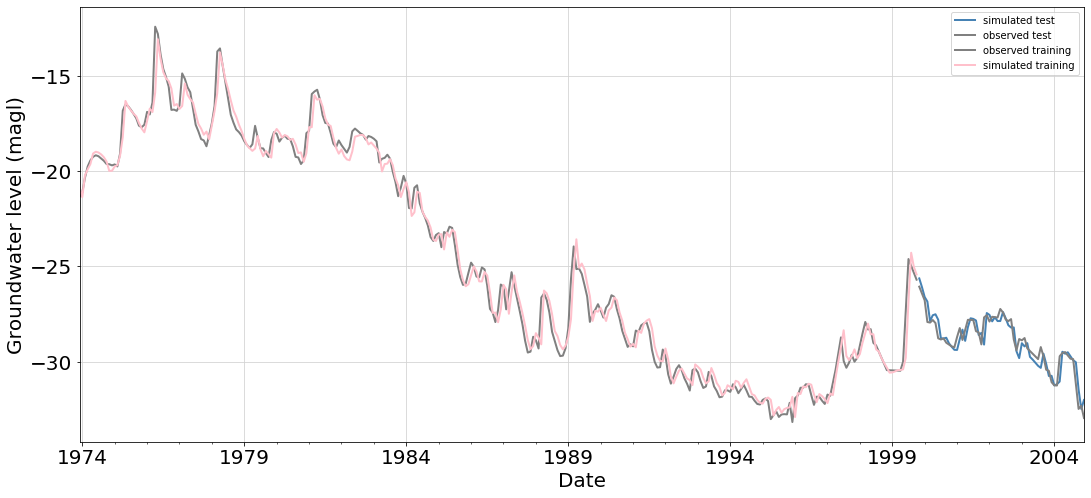

In [67]:
mse_gru = summary['mse_gru'].mean(axis=0)
rmse_gru= summary['rmse_gru'].mean(axis=0)
mae_gru = summary['mae_gru'].mean(axis=0)
r2_gru  = summary['r2_gru'].mean(axis=0)
stdv_gru= stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_gru, 3))
print("Mean squared error is:",round(mse_gru,3))
print("Root mean squared error is:",round(rmse_gru, 3))
print("Mean absolute error is:",round(mae_gru,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[311:373].index)
df1['observed test']      = pima.iloc[311:373, 0].values

df2 = pd.DataFrame(pima.iloc[0:311, 0].values, columns = ['observed training'],index =pima.iloc[0:311].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [68]:
y_gru = out_df['simulated test']

### FFNN

In [76]:
from sklearn.metrics import *
import numpy as np
import csv  

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_ff', 'rmse_ff', 'r2_ff','mae_ff'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    check = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)

    early = EarlyStopping(patience=100)

    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu', input_shape=(1,6)))

    # Add fully connected layer with a ReLU activation function
    model.add(Dense(units=32, activation='relu'))

    # Add fully connected layer with no activation function
    model.add(Dense(units=1))
    #model.add(Flatten())

    # Compile neural network
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mse'])

    X_t_reshaped   = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_val_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


    history = model.fit(X_t_reshaped, 
                    y_train, 
                    validation_data=(X_val_reshaped, y_test),
                    epochs=1000, 
                    batch_size=96, 
                    verbose=1, callbacks=[check, early])
    
    X_val_reshaped = X_val_reshaped.reshape(62, 6)

    #running function
    gwl = -0.16225336
    test_forecast = X_test
    steps_ahead = 62
    y_ff = forecast(model, test_forecast, gwl, steps_ahead)
    y_ff = np.array(y_ff)

     #metrics for test
    y_ff = y_pred
    test_pred.append(y_ff)
    mse_ff = mean_squared_error(y_test, y_ff)
    rmse_ff = np.sqrt(mse_ff)
    r2_ff = r2_score(y_test, y_ff)
    mae_ff = mean_absolute_error(y_test, y_ff)

    #metrics train 
    train     = model.predict(X_t_reshaped)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_ff,Round), round(rmse_ff,Round), round(r2_ff,Round),round(mae_ff,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')  

Running fold 1
(311, 6)
Train on 311 samples, validate on 62 samples
Epoch 1/1000
 96/311 [========>.....................] - ETA: 5s - loss: 1.0620 - mean_squared_error: 1.0620
Epoch 00001: val_loss improved from inf to 0.55311, saving model to model.h5
311/311 [==============================] - 7s 24ms/sample - loss: 0.8983 - mean_squared_error: 0.8983 - val_loss: 0.5531 - val_mean_squared_error: 0.5531
Epoch 2/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.6844 - mean_squared_error: 0.6844
Epoch 00002: val_loss improved from 0.55311 to 0.42850, saving model to model.h5
311/311 [==============================] - 0s 328us/sample - loss: 0.6159 - mean_squared_error: 0.6159 - val_loss: 0.4285 - val_mean_squared_error: 0.4285
Epoch 3/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.3900 - mean_squared_error: 0.3900
Epoch 00003: val_loss improved from 0.42850 to 0.33382, saving model to model.h5
311/311 [==============================] - 0s 337us/sample 

Epoch 51/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0235 - mean_squared_error: 0.0235
Epoch 00051: val_loss did not improve from 0.00959
311/311 [==============================] - 0s 110us/sample - loss: 0.0211 - mean_squared_error: 0.0211 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 52/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0242 - mean_squared_error: 0.0242
Epoch 00052: val_loss did not improve from 0.00959
311/311 [==============================] - 0s 144us/sample - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0124 - val_mean_squared_error: 0.0124
Epoch 53/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 00053: val_loss did not improve from 0.00959
311/311 [==============================] - 0s 168us/sample - loss: 0.0200 - mean_squared_error: 0.0200 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 54/1000
 96/311 [========>.....................] 

 96/311 [========>.....................] - ETA: 0s - loss: 0.0223 - mean_squared_error: 0.0223
Epoch 00077: val_loss did not improve from 0.00959
311/311 [==============================] - 0s 99us/sample - loss: 0.0195 - mean_squared_error: 0.0195 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 78/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0195 - mean_squared_error: 0.0195
Epoch 00078: val_loss did not improve from 0.00959
311/311 [==============================] - 0s 100us/sample - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 79/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 00079: val_loss did not improve from 0.00959
311/311 [==============================] - 0s 104us/sample - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 80/1000
 96/311 [========>.....................] - ETA: 0s - los

Epoch 129/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0126 - mean_squared_error: 0.0126
Epoch 00129: val_loss did not improve from 0.00929
311/311 [==============================] - 0s 152us/sample - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 130/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0192 - mean_squared_error: 0.0192
Epoch 00130: val_loss did not improve from 0.00929
311/311 [==============================] - 0s 86us/sample - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 131/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0140 - mean_squared_error: 0.0140
Epoch 00131: val_loss did not improve from 0.00929
311/311 [==============================] - 0s 147us/sample - loss: 0.0187 - mean_squared_error: 0.0187 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 132/1000
 96/311 [========>....................

Epoch 155/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0158 - mean_squared_error: 0.0158
Epoch 00155: val_loss did not improve from 0.00929
311/311 [==============================] - 0s 99us/sample - loss: 0.0187 - mean_squared_error: 0.0187 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 156/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0225 - mean_squared_error: 0.0225
Epoch 00156: val_loss did not improve from 0.00929
311/311 [==============================] - 0s 113us/sample - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 157/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0242 - mean_squared_error: 0.0242
Epoch 00157: val_loss did not improve from 0.00929
311/311 [==============================] - 0s 94us/sample - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 158/1000
 96/311 [========>.....................

Epoch 181/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0171 - mean_squared_error: 0.0171
Epoch 00181: val_loss did not improve from 0.00929
311/311 [==============================] - 0s 104us/sample - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 182/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 00182: val_loss did not improve from 0.00929
311/311 [==============================] - 0s 138us/sample - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 183/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0177 - mean_squared_error: 0.0177
Epoch 00183: val_loss did not improve from 0.00929
311/311 [==============================] - 0s 142us/sample - loss: 0.0181 - mean_squared_error: 0.0181 - val_loss: 0.0097 - val_mean_squared_error: 0.0097
Epoch 184/1000
 96/311 [========>...................

Epoch 207/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 00207: val_loss did not improve from 0.00928
311/311 [==============================] - 0s 96us/sample - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 208/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0226 - mean_squared_error: 0.0226
Epoch 00208: val_loss did not improve from 0.00928
311/311 [==============================] - 0s 82us/sample - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 209/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0251 - mean_squared_error: 0.0251
Epoch 00209: val_loss did not improve from 0.00928
311/311 [==============================] - 0s 80us/sample - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0101 - val_mean_squared_error: 0.0101
Epoch 210/1000
 96/311 [========>.....................]

Epoch 233/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0173 - mean_squared_error: 0.0173
Epoch 00233: val_loss did not improve from 0.00928
311/311 [==============================] - 0s 83us/sample - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 234/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0202 - mean_squared_error: 0.0202
Epoch 00234: val_loss did not improve from 0.00928
311/311 [==============================] - 0s 113us/sample - loss: 0.0163 - mean_squared_error: 0.0163 - val_loss: 0.0099 - val_mean_squared_error: 0.0099
Epoch 235/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 00235: val_loss did not improve from 0.00928
311/311 [==============================] - 0s 101us/sample - loss: 0.0180 - mean_squared_error: 0.0180 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 236/1000
 96/311 [========>....................

Epoch 259/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0226 - mean_squared_error: 0.0226
Epoch 00259: val_loss did not improve from 0.00928
311/311 [==============================] - 0s 126us/sample - loss: 0.0202 - mean_squared_error: 0.0202 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 260/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 00260: val_loss did not improve from 0.00928
311/311 [==============================] - 0s 143us/sample - loss: 0.0163 - mean_squared_error: 0.0163 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 261/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 00261: val_loss did not improve from 0.00928
311/311 [==============================] - 0s 151us/sample - loss: 0.0176 - mean_squared_error: 0.0176 - val_loss: 0.0100 - val_mean_squared_error: 0.0100
Epoch 262/1000
 96/311 [========>...................

Epoch 285/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 00285: val_loss did not improve from 0.00928
311/311 [==============================] - 0s 84us/sample - loss: 0.0171 - mean_squared_error: 0.0171 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 286/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0188 - mean_squared_error: 0.0188
Epoch 00286: val_loss did not improve from 0.00928
311/311 [==============================] - 0s 84us/sample - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.0164 - val_mean_squared_error: 0.0164
Epoch 287/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0216 - mean_squared_error: 0.0216
Epoch 00287: val_loss did not improve from 0.00928
311/311 [==============================] - 0s 97us/sample - loss: 0.0203 - mean_squared_error: 0.0203 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 288/1000
 96/311 [========>.....................]

Epoch 35/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0234 - mean_squared_error: 0.0234
Epoch 00035: val_loss did not improve from 0.00940
311/311 [==============================] - 0s 90us/sample - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 36/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0135 - mean_squared_error: 0.0135
Epoch 00036: val_loss did not improve from 0.00940
311/311 [==============================] - 0s 88us/sample - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.0199 - val_mean_squared_error: 0.0199
Epoch 37/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0113 - mean_squared_error: 0.0113
Epoch 00037: val_loss did not improve from 0.00940
311/311 [==============================] - 0s 99us/sample - loss: 0.0148 - mean_squared_error: 0.0148 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 38/1000
 96/311 [========>.....................] - E

 96/311 [========>.....................] - ETA: 0s - loss: 0.0145 - mean_squared_error: 0.0145
Epoch 00087: val_loss did not improve from 0.00940
311/311 [==============================] - 0s 100us/sample - loss: 0.0175 - mean_squared_error: 0.0175 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 88/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0216 - mean_squared_error: 0.0216
Epoch 00088: val_loss did not improve from 0.00940
311/311 [==============================] - 0s 90us/sample - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 89/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0200 - mean_squared_error: 0.0200
Epoch 00089: val_loss did not improve from 0.00940
311/311 [==============================] - 0s 91us/sample - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 90/1000
 96/311 [========>.....................] - ETA: 0s - loss

Epoch 9/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0336 - mean_squared_error: 0.0336
Epoch 00009: val_loss improved from 0.01087 to 0.00951, saving model to model.h5
311/311 [==============================] - 0s 339us/sample - loss: 0.0201 - mean_squared_error: 0.0201 - val_loss: 0.0095 - val_mean_squared_error: 0.0095
Epoch 10/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0264 - mean_squared_error: 0.0264
Epoch 00010: val_loss did not improve from 0.00951
311/311 [==============================] - 0s 176us/sample - loss: 0.0195 - mean_squared_error: 0.0195 - val_loss: 0.0103 - val_mean_squared_error: 0.0103
Epoch 11/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0151 - mean_squared_error: 0.0151
Epoch 00011: val_loss did not improve from 0.00951
311/311 [==============================] - 0s 142us/sample - loss: 0.0163 - mean_squared_error: 0.0163 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 12/1000
 96/311 [===

Epoch 35/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0247 - mean_squared_error: 0.0247
Epoch 00035: val_loss did not improve from 0.00951
311/311 [==============================] - 0s 128us/sample - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 36/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0234 - mean_squared_error: 0.0234
Epoch 00036: val_loss did not improve from 0.00951
311/311 [==============================] - 0s 131us/sample - loss: 0.0191 - mean_squared_error: 0.0191 - val_loss: 0.0135 - val_mean_squared_error: 0.0135
Epoch 37/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0224 - mean_squared_error: 0.0224
Epoch 00037: val_loss did not improve from 0.00951
311/311 [==============================] - 0s 112us/sample - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 38/1000
 96/311 [========>.....................] 

 96/311 [========>.....................] - ETA: 0s - loss: 0.0324 - mean_squared_error: 0.0324
Epoch 00061: val_loss did not improve from 0.00951
311/311 [==============================] - 0s 130us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 62/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0182 - mean_squared_error: 0.0182
Epoch 00062: val_loss did not improve from 0.00951
311/311 [==============================] - 0s 126us/sample - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 63/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0217 - mean_squared_error: 0.0217
Epoch 00063: val_loss did not improve from 0.00951
311/311 [==============================] - 0s 131us/sample - loss: 0.0153 - mean_squared_error: 0.0153 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 64/1000
 96/311 [========>.....................] - ETA: 0s - lo

Epoch 4/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.3257 - mean_squared_error: 0.3257
Epoch 00004: val_loss improved from 0.39323 to 0.29410, saving model to model.h5
311/311 [==============================] - 0s 327us/sample - loss: 0.2995 - mean_squared_error: 0.2995 - val_loss: 0.2941 - val_mean_squared_error: 0.2941
Epoch 5/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.2772 - mean_squared_error: 0.2772
Epoch 00005: val_loss improved from 0.29410 to 0.13118, saving model to model.h5
311/311 [==============================] - 0s 300us/sample - loss: 0.2169 - mean_squared_error: 0.2169 - val_loss: 0.1312 - val_mean_squared_error: 0.1312
Epoch 6/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.1545 - mean_squared_error: 0.1545
Epoch 00006: val_loss improved from 0.13118 to 0.02014, saving model to model.h5
311/311 [==============================] - 0s 299us/sample - loss: 0.0979 - mean_squared_error: 0.0979 - val_loss: 0.0201 -

 96/311 [========>.....................] - ETA: 0s - loss: 0.0280 - mean_squared_error: 0.0280
Epoch 00055: val_loss did not improve from 0.00991
311/311 [==============================] - 0s 140us/sample - loss: 0.0201 - mean_squared_error: 0.0201 - val_loss: 0.0125 - val_mean_squared_error: 0.0125
Epoch 56/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0158 - mean_squared_error: 0.0158
Epoch 00056: val_loss did not improve from 0.00991
311/311 [==============================] - 0s 110us/sample - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 57/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0169 - mean_squared_error: 0.0169
Epoch 00057: val_loss did not improve from 0.00991
311/311 [==============================] - 0s 114us/sample - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0184 - val_mean_squared_error: 0.0184
Epoch 58/1000
 96/311 [========>.....................] - ETA: 0s - lo

Epoch 107/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0193 - mean_squared_error: 0.0193
Epoch 00107: val_loss did not improve from 0.00981
311/311 [==============================] - 0s 108us/sample - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 108/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 00108: val_loss did not improve from 0.00981
311/311 [==============================] - 0s 110us/sample - loss: 0.0175 - mean_squared_error: 0.0175 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 109/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0158 - mean_squared_error: 0.0158
Epoch 00109: val_loss did not improve from 0.00981
311/311 [==============================] - 0s 105us/sample - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.0125 - val_mean_squared_error: 0.0125
Epoch 110/1000
 96/311 [========>...................

Epoch 133/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 00133: val_loss did not improve from 0.00981
311/311 [==============================] - 0s 117us/sample - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.0104 - val_mean_squared_error: 0.0104
Epoch 134/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 00134: val_loss did not improve from 0.00981
311/311 [==============================] - 0s 107us/sample - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.0165 - val_mean_squared_error: 0.0165
Epoch 135/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0220 - mean_squared_error: 0.0220
Epoch 00135: val_loss did not improve from 0.00981
311/311 [==============================] - 0s 111us/sample - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 136/1000
 96/311 [========>...................

Epoch 159/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0201 - mean_squared_error: 0.0201
Epoch 00159: val_loss did not improve from 0.00981
311/311 [==============================] - 0s 107us/sample - loss: 0.0245 - mean_squared_error: 0.0245 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 160/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0203 - mean_squared_error: 0.0203
Epoch 00160: val_loss improved from 0.00981 to 0.00976, saving model to model.h5
311/311 [==============================] - 0s 295us/sample - loss: 0.0163 - mean_squared_error: 0.0163 - val_loss: 0.0098 - val_mean_squared_error: 0.0098
Epoch 161/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0214 - mean_squared_error: 0.0214
Epoch 00161: val_loss did not improve from 0.00976
311/311 [==============================] - 0s 108us/sample - loss: 0.0156 - mean_squared_error: 0.0156 - val_loss: 0.0201 - val_mean_squared_error: 0.0201
Epoch 162/1000
 96/311

Epoch 185/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 00185: val_loss did not improve from 0.00976
311/311 [==============================] - 0s 106us/sample - loss: 0.0151 - mean_squared_error: 0.0151 - val_loss: 0.0195 - val_mean_squared_error: 0.0195
Epoch 186/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 00186: val_loss did not improve from 0.00976
311/311 [==============================] - 0s 109us/sample - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 187/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0266 - mean_squared_error: 0.0266
Epoch 00187: val_loss did not improve from 0.00976
311/311 [==============================] - 0s 133us/sample - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 188/1000
 96/311 [========>...................

Epoch 211/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0244 - mean_squared_error: 0.0244
Epoch 00211: val_loss did not improve from 0.00976
311/311 [==============================] - 0s 111us/sample - loss: 0.0186 - mean_squared_error: 0.0186 - val_loss: 0.0185 - val_mean_squared_error: 0.0185
Epoch 212/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0220 - mean_squared_error: 0.0220
Epoch 00212: val_loss did not improve from 0.00976
311/311 [==============================] - 0s 103us/sample - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 213/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0304 - mean_squared_error: 0.0304
Epoch 00213: val_loss did not improve from 0.00976
311/311 [==============================] - 0s 111us/sample - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 214/1000
 96/311 [========>...................

Epoch 237/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0368 - mean_squared_error: 0.0368
Epoch 00237: val_loss did not improve from 0.00976
311/311 [==============================] - 0s 106us/sample - loss: 0.0229 - mean_squared_error: 0.0229 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 238/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 00238: val_loss did not improve from 0.00976
311/311 [==============================] - 0s 113us/sample - loss: 0.0145 - mean_squared_error: 0.0145 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 239/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0176 - mean_squared_error: 0.0176
Epoch 00239: val_loss did not improve from 0.00976
311/311 [==============================] - 0s 104us/sample - loss: 0.0203 - mean_squared_error: 0.0203 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 240/1000
 96/311 [========>...................

Epoch 3/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.2007 - mean_squared_error: 0.2007
Epoch 00003: val_loss did not improve from 0.01053
311/311 [==============================] - 0s 121us/sample - loss: 0.1298 - mean_squared_error: 0.1298 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 4/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0183 - mean_squared_error: 0.0183
Epoch 00004: val_loss did not improve from 0.01053
311/311 [==============================] - 0s 117us/sample - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.0204 - val_mean_squared_error: 0.0204
Epoch 5/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0292 - mean_squared_error: 0.0292
Epoch 00005: val_loss did not improve from 0.01053
311/311 [==============================] - 0s 119us/sample - loss: 0.0203 - mean_squared_error: 0.0203 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 6/1000
 96/311 [========>.....................] - ET

Epoch 29/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 00029: val_loss did not improve from 0.01024
311/311 [==============================] - 0s 124us/sample - loss: 0.0249 - mean_squared_error: 0.0249 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 30/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0239 - mean_squared_error: 0.0239
Epoch 00030: val_loss did not improve from 0.01024
311/311 [==============================] - 0s 123us/sample - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0138 - val_mean_squared_error: 0.0138
Epoch 31/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0233 - mean_squared_error: 0.0233
Epoch 00031: val_loss did not improve from 0.01024
311/311 [==============================] - 0s 124us/sample - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 32/1000
 96/311 [========>.....................] 

 96/311 [========>.....................] - ETA: 0s - loss: 0.0325 - mean_squared_error: 0.0325
Epoch 00055: val_loss did not improve from 0.01024
311/311 [==============================] - 0s 115us/sample - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 56/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0309 - mean_squared_error: 0.0309
Epoch 00056: val_loss did not improve from 0.01024
311/311 [==============================] - 0s 142us/sample - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 57/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0159 - mean_squared_error: 0.0159
Epoch 00057: val_loss did not improve from 0.01024
311/311 [==============================] - 0s 141us/sample - loss: 0.0185 - mean_squared_error: 0.0185 - val_loss: 0.0109 - val_mean_squared_error: 0.0109
Epoch 58/1000
 96/311 [========>.....................] - ETA: 0s - lo

Epoch 1/1000
 96/311 [========>.....................] - ETA: 7s - loss: 1.0282 - mean_squared_error: 1.0282
Epoch 00001: val_loss improved from inf to 0.49102, saving model to model.h5
311/311 [==============================] - 10s 31ms/sample - loss: 1.0009 - mean_squared_error: 1.0009 - val_loss: 0.4910 - val_mean_squared_error: 0.4910
Epoch 2/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.6830 - mean_squared_error: 0.6830
Epoch 00002: val_loss improved from 0.49102 to 0.37894, saving model to model.h5
311/311 [==============================] - 0s 394us/sample - loss: 0.5314 - mean_squared_error: 0.5314 - val_loss: 0.3789 - val_mean_squared_error: 0.3789
Epoch 3/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.3273 - mean_squared_error: 0.3273
Epoch 00003: val_loss improved from 0.37894 to 0.07299, saving model to model.h5
311/311 [==============================] - 0s 410us/sample - loss: 0.2408 - mean_squared_error: 0.2408 - val_loss: 0.0730 - val

Epoch 27/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 00027: val_loss did not improve from 0.01055
311/311 [==============================] - 0s 121us/sample - loss: 0.0174 - mean_squared_error: 0.0174 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 28/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0732 - mean_squared_error: 0.0732
Epoch 00028: val_loss did not improve from 0.01055
311/311 [==============================] - 0s 140us/sample - loss: 0.0359 - mean_squared_error: 0.0359 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 29/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0256 - mean_squared_error: 0.0256
Epoch 00029: val_loss did not improve from 0.01055
311/311 [==============================] - 0s 125us/sample - loss: 0.0217 - mean_squared_error: 0.0217 - val_loss: 0.0148 - val_mean_squared_error: 0.0148
Epoch 30/1000
 96/311 [========>.....................] 

Epoch 53/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0393 - mean_squared_error: 0.0393
Epoch 00053: val_loss did not improve from 0.01043
311/311 [==============================] - 0s 122us/sample - loss: 0.0306 - mean_squared_error: 0.0306 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 54/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0195 - mean_squared_error: 0.0195
Epoch 00054: val_loss did not improve from 0.01043
311/311 [==============================] - 0s 128us/sample - loss: 0.0191 - mean_squared_error: 0.0191 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 55/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0232 - mean_squared_error: 0.0232
Epoch 00055: val_loss did not improve from 0.01043
311/311 [==============================] - 0s 127us/sample - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0133 - val_mean_squared_error: 0.0133
Epoch 56/1000
 96/311 [========>.....................] 

Epoch 79/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0168 - mean_squared_error: 0.0168
Epoch 00079: val_loss did not improve from 0.01029
311/311 [==============================] - 0s 120us/sample - loss: 0.0160 - mean_squared_error: 0.0160 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 80/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 00080: val_loss did not improve from 0.01029
311/311 [==============================] - 0s 120us/sample - loss: 0.0174 - mean_squared_error: 0.0174 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 81/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0213 - mean_squared_error: 0.0213
Epoch 00081: val_loss did not improve from 0.01029
311/311 [==============================] - 0s 120us/sample - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.0169 - val_mean_squared_error: 0.0169
Epoch 82/1000
 96/311 [========>.....................] 

Epoch 105/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0221 - mean_squared_error: 0.0221
Epoch 00105: val_loss did not improve from 0.01029
311/311 [==============================] - 0s 118us/sample - loss: 0.0227 - mean_squared_error: 0.0227 - val_loss: 0.0315 - val_mean_squared_error: 0.0315
Epoch 106/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0334 - mean_squared_error: 0.0334
Epoch 00106: val_loss did not improve from 0.01029
311/311 [==============================] - 0s 123us/sample - loss: 0.0236 - mean_squared_error: 0.0236 - val_loss: 0.0214 - val_mean_squared_error: 0.0214
Epoch 107/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0405 - mean_squared_error: 0.0405
Epoch 00107: val_loss did not improve from 0.01029
311/311 [==============================] - 0s 122us/sample - loss: 0.0285 - mean_squared_error: 0.0285 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 108/1000
 96/311 [========>...................

Epoch 131/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0143 - mean_squared_error: 0.0143
Epoch 00131: val_loss did not improve from 0.01029
311/311 [==============================] - 0s 118us/sample - loss: 0.0221 - mean_squared_error: 0.0221 - val_loss: 0.0169 - val_mean_squared_error: 0.0169
Epoch 132/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 00132: val_loss did not improve from 0.01029
311/311 [==============================] - 0s 120us/sample - loss: 0.0219 - mean_squared_error: 0.0219 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 133/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 00133: val_loss did not improve from 0.01029
311/311 [==============================] - 0s 120us/sample - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 134/1000
 96/311 [========>...................

Epoch 157/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0222 - mean_squared_error: 0.0222
Epoch 00157: val_loss did not improve from 0.01029
311/311 [==============================] - 0s 151us/sample - loss: 0.0207 - mean_squared_error: 0.0207 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 158/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 00158: val_loss did not improve from 0.01029
311/311 [==============================] - 0s 120us/sample - loss: 0.0201 - mean_squared_error: 0.0201 - val_loss: 0.0167 - val_mean_squared_error: 0.0167
Epoch 159/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0351 - mean_squared_error: 0.0351
Epoch 00159: val_loss did not improve from 0.01029
311/311 [==============================] - 0s 120us/sample - loss: 0.0281 - mean_squared_error: 0.0281 - val_loss: 0.0203 - val_mean_squared_error: 0.0203
Epoch 160/1000
 96/311 [========>...................

Epoch 16/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 00016: val_loss did not improve from 0.01115
311/311 [==============================] - 0s 136us/sample - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.0154 - val_mean_squared_error: 0.0154
Epoch 17/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0222 - mean_squared_error: 0.0222
Epoch 00017: val_loss did not improve from 0.01115
311/311 [==============================] - 0s 166us/sample - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.0172 - val_mean_squared_error: 0.0172
Epoch 18/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0465 - mean_squared_error: 0.0465
Epoch 00018: val_loss did not improve from 0.01115
311/311 [==============================] - 0s 129us/sample - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 19/1000
 96/311 [========>.....................] 

 96/311 [========>.....................] - ETA: 0s - loss: 0.0180 - mean_squared_error: 0.0180
Epoch 00042: val_loss did not improve from 0.01115
311/311 [==============================] - 0s 156us/sample - loss: 0.0213 - mean_squared_error: 0.0213 - val_loss: 0.0386 - val_mean_squared_error: 0.0386
Epoch 43/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0469 - mean_squared_error: 0.0469
Epoch 00043: val_loss did not improve from 0.01115
311/311 [==============================] - 0s 130us/sample - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 44/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0143 - mean_squared_error: 0.0143
Epoch 00044: val_loss did not improve from 0.01115
311/311 [==============================] - 0s 128us/sample - loss: 0.0161 - mean_squared_error: 0.0161 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 45/1000
 96/311 [========>.....................] - ETA: 0s - lo

Epoch 68/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 00068: val_loss did not improve from 0.01046
311/311 [==============================] - 0s 141us/sample - loss: 0.0270 - mean_squared_error: 0.0270 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 69/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0153 - mean_squared_error: 0.0153
Epoch 00069: val_loss did not improve from 0.01046
311/311 [==============================] - 0s 142us/sample - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 70/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 00070: val_loss did not improve from 0.01046
311/311 [==============================] - 0s 137us/sample - loss: 0.0178 - mean_squared_error: 0.0178 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 71/1000
 96/311 [========>.....................] 

 96/311 [========>.....................] - ETA: 0s - loss: 0.0157 - mean_squared_error: 0.0157
Epoch 00094: val_loss did not improve from 0.01046
311/311 [==============================] - 0s 139us/sample - loss: 0.0157 - mean_squared_error: 0.0157 - val_loss: 0.0250 - val_mean_squared_error: 0.0250
Epoch 95/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0360 - mean_squared_error: 0.0360
Epoch 00095: val_loss did not improve from 0.01046
311/311 [==============================] - 0s 137us/sample - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.0136 - val_mean_squared_error: 0.0136
Epoch 96/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0188 - mean_squared_error: 0.0188
Epoch 00096: val_loss did not improve from 0.01046
311/311 [==============================] - 0s 205us/sample - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.0348 - val_mean_squared_error: 0.0348
Epoch 97/1000
 96/311 [========>.....................] - ETA: 0s - lo

Epoch 120/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0218 - mean_squared_error: 0.0218
Epoch 00120: val_loss did not improve from 0.01046
311/311 [==============================] - 0s 174us/sample - loss: 0.0214 - mean_squared_error: 0.0214 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 121/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0202 - mean_squared_error: 0.0202
Epoch 00121: val_loss did not improve from 0.01046
311/311 [==============================] - 0s 152us/sample - loss: 0.0179 - mean_squared_error: 0.0179 - val_loss: 0.0200 - val_mean_squared_error: 0.0200
Epoch 122/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0210 - mean_squared_error: 0.0210
Epoch 00122: val_loss did not improve from 0.01046
311/311 [==============================] - 0s 127us/sample - loss: 0.0263 - mean_squared_error: 0.0263 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 123/1000
 96/311 [========>...................

Epoch 146/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0183 - mean_squared_error: 0.0183
Epoch 00146: val_loss did not improve from 0.01046
311/311 [==============================] - 0s 127us/sample - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0.0202 - val_mean_squared_error: 0.0202
Epoch 147/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 00147: val_loss did not improve from 0.01046
311/311 [==============================] - 0s 127us/sample - loss: 0.0267 - mean_squared_error: 0.0267 - val_loss: 0.0158 - val_mean_squared_error: 0.0158
Epoch 148/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0267 - mean_squared_error: 0.0267
Epoch 00148: val_loss did not improve from 0.01046
311/311 [==============================] - 0s 134us/sample - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0129 - val_mean_squared_error: 0.0129
Epoch 149/1000
 96/311 [========>...................

311/311 [==============================] - 0s 618us/sample - loss: 0.0238 - mean_squared_error: 0.0238 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 12/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0187 - mean_squared_error: 0.0187
Epoch 00012: val_loss did not improve from 0.01063
311/311 [==============================] - 0s 171us/sample - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 13/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0316 - mean_squared_error: 0.0316
Epoch 00013: val_loss did not improve from 0.01063
311/311 [==============================] - 0s 137us/sample - loss: 0.0294 - mean_squared_error: 0.0294 - val_loss: 0.0804 - val_mean_squared_error: 0.0804
Epoch 14/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0569 - mean_squared_error: 0.0569
Epoch 00014: val_loss did not improve from 0.01063
311/311 [==============================] - 0s 162us/sam

Epoch 38/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0249 - mean_squared_error: 0.0249
Epoch 00038: val_loss did not improve from 0.01051
311/311 [==============================] - 0s 140us/sample - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 39/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0516 - mean_squared_error: 0.0516
Epoch 00039: val_loss did not improve from 0.01051
311/311 [==============================] - 0s 140us/sample - loss: 0.0324 - mean_squared_error: 0.0324 - val_loss: 0.0243 - val_mean_squared_error: 0.0243
Epoch 40/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0493 - mean_squared_error: 0.0493
Epoch 00040: val_loss did not improve from 0.01051
311/311 [==============================] - 0s 138us/sample - loss: 0.0308 - mean_squared_error: 0.0308 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 41/1000
 96/311 [========>.....................] 

 96/311 [========>.....................] - ETA: 0s - loss: 0.0264 - mean_squared_error: 0.0264
Epoch 00064: val_loss did not improve from 0.01051
311/311 [==============================] - 0s 140us/sample - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.0337 - val_mean_squared_error: 0.0337
Epoch 65/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0355 - mean_squared_error: 0.0355
Epoch 00065: val_loss did not improve from 0.01051
311/311 [==============================] - 0s 143us/sample - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 66/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0138 - mean_squared_error: 0.0138
Epoch 00066: val_loss did not improve from 0.01051
311/311 [==============================] - 0s 140us/sample - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0139 - val_mean_squared_error: 0.0139
Epoch 67/1000
 96/311 [========>.....................] - ETA: 0s - lo

 96/311 [========>.....................] - ETA: 0s - loss: 0.0208 - mean_squared_error: 0.0208
Epoch 00116: val_loss did not improve from 0.01051
311/311 [==============================] - 0s 143us/sample - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0197 - val_mean_squared_error: 0.0197
Epoch 117/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0207 - mean_squared_error: 0.0207
Epoch 00117: val_loss did not improve from 0.01051
311/311 [==============================] - 0s 157us/sample - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 118/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0291 - mean_squared_error: 0.0291
Epoch 00118: val_loss did not improve from 0.01051
311/311 [==============================] - 0s 203us/sample - loss: 0.0281 - mean_squared_error: 0.0281 - val_loss: 0.0119 - val_mean_squared_error: 0.0119
Epoch 119/1000
 96/311 [========>.....................] - ETA: 0s -

Epoch 15/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0490 - mean_squared_error: 0.0490
Epoch 00015: val_loss did not improve from 0.01087
311/311 [==============================] - 0s 163us/sample - loss: 0.0323 - mean_squared_error: 0.0323 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 16/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0223 - mean_squared_error: 0.0223
Epoch 00016: val_loss improved from 0.01087 to 0.01054, saving model to model.h5
311/311 [==============================] - 0s 524us/sample - loss: 0.0212 - mean_squared_error: 0.0212 - val_loss: 0.0105 - val_mean_squared_error: 0.0105
Epoch 17/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 00017: val_loss did not improve from 0.01054
311/311 [==============================] - 0s 171us/sample - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0108 - val_mean_squared_error: 0.0108
Epoch 18/1000
 96/311 [==

Epoch 41/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0386 - mean_squared_error: 0.0386
Epoch 00041: val_loss did not improve from 0.01024
311/311 [==============================] - 0s 159us/sample - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0111 - val_mean_squared_error: 0.0111
Epoch 42/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 00042: val_loss did not improve from 0.01024
311/311 [==============================] - 0s 153us/sample - loss: 0.0230 - mean_squared_error: 0.0230 - val_loss: 0.0202 - val_mean_squared_error: 0.0202
Epoch 43/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0738 - mean_squared_error: 0.0738
Epoch 00043: val_loss did not improve from 0.01024
311/311 [==============================] - 0s 161us/sample - loss: 0.0463 - mean_squared_error: 0.0463 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 44/1000
 96/311 [========>.....................] 

 96/311 [========>.....................] - ETA: 0s - loss: 0.0220 - mean_squared_error: 0.0220
Epoch 00067: val_loss did not improve from 0.01024
311/311 [==============================] - 0s 153us/sample - loss: 0.0172 - mean_squared_error: 0.0172 - val_loss: 0.0117 - val_mean_squared_error: 0.0117
Epoch 68/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 00068: val_loss did not improve from 0.01024
311/311 [==============================] - 0s 177us/sample - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.0337 - val_mean_squared_error: 0.0337
Epoch 69/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0381 - mean_squared_error: 0.0381
Epoch 00069: val_loss did not improve from 0.01024
311/311 [==============================] - 0s 154us/sample - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0112 - val_mean_squared_error: 0.0112
Epoch 70/1000
 96/311 [========>.....................] - ETA: 0s - lo

Epoch 93/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0331 - mean_squared_error: 0.0331
Epoch 00093: val_loss did not improve from 0.01020
311/311 [==============================] - 0s 144us/sample - loss: 0.0289 - mean_squared_error: 0.0289 - val_loss: 0.0205 - val_mean_squared_error: 0.0205
Epoch 94/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0288 - mean_squared_error: 0.0288
Epoch 00094: val_loss did not improve from 0.01020
311/311 [==============================] - 0s 208us/sample - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Epoch 95/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0291 - mean_squared_error: 0.0291
Epoch 00095: val_loss did not improve from 0.01020
311/311 [==============================] - 0s 146us/sample - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 96/1000
 96/311 [========>.....................] 

Epoch 119/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0396 - mean_squared_error: 0.0396
Epoch 00119: val_loss did not improve from 0.01020
311/311 [==============================] - 0s 150us/sample - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.0127 - val_mean_squared_error: 0.0127
Epoch 120/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0280 - mean_squared_error: 0.0280
Epoch 00120: val_loss did not improve from 0.01020
311/311 [==============================] - 0s 147us/sample - loss: 0.0186 - mean_squared_error: 0.0186 - val_loss: 0.0121 - val_mean_squared_error: 0.0121
Epoch 121/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 00121: val_loss did not improve from 0.01020
311/311 [==============================] - 0s 164us/sample - loss: 0.0191 - mean_squared_error: 0.0191 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 122/1000
 96/311 [========>...................

Epoch 145/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0343 - mean_squared_error: 0.0343
Epoch 00145: val_loss did not improve from 0.01020
311/311 [==============================] - 0s 152us/sample - loss: 0.0283 - mean_squared_error: 0.0283 - val_loss: 0.0134 - val_mean_squared_error: 0.0134
Epoch 146/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0183 - mean_squared_error: 0.0183
Epoch 00146: val_loss did not improve from 0.01020
311/311 [==============================] - 0s 154us/sample - loss: 0.0205 - mean_squared_error: 0.0205 - val_loss: 0.0257 - val_mean_squared_error: 0.0257
Epoch 147/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 00147: val_loss did not improve from 0.01020
311/311 [==============================] - 0s 151us/sample - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.0113 - val_mean_squared_error: 0.0113
Epoch 148/1000
 96/311 [========>...................

Epoch 171/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 00171: val_loss did not improve from 0.01020
311/311 [==============================] - 0s 173us/sample - loss: 0.0344 - mean_squared_error: 0.0344 - val_loss: 0.0118 - val_mean_squared_error: 0.0118
Running fold 10
(311, 6)
Train on 311 samples, validate on 62 samples
Epoch 1/1000
 96/311 [========>.....................] - ETA: 10s - loss: 1.2257 - mean_squared_error: 1.2257
Epoch 00001: val_loss improved from inf to 0.02468, saving model to model.h5
311/311 [==============================] - 13s 40ms/sample - loss: 0.8585 - mean_squared_error: 0.8585 - val_loss: 0.0247 - val_mean_squared_error: 0.0247
Epoch 2/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.6680 - mean_squared_error: 0.6680
Epoch 00002: val_loss improved from 0.02468 to 0.01688, saving model to model.h5
311/311 [==============================] - 0s 624us/sample - loss: 0.6726 - mean_squ

Epoch 26/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0364 - mean_squared_error: 0.0364
Epoch 00026: val_loss improved from 0.01282 to 0.01262, saving model to model.h5
311/311 [==============================] - 0s 584us/sample - loss: 0.0280 - mean_squared_error: 0.0280 - val_loss: 0.0126 - val_mean_squared_error: 0.0126
Epoch 27/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0333 - mean_squared_error: 0.0333
Epoch 00027: val_loss did not improve from 0.01262
311/311 [==============================] - 0s 192us/sample - loss: 0.0291 - mean_squared_error: 0.0291 - val_loss: 0.0128 - val_mean_squared_error: 0.0128
Epoch 28/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 00028: val_loss did not improve from 0.01262
311/311 [==============================] - 0s 167us/sample - loss: 0.0189 - mean_squared_error: 0.0189 - val_loss: 0.0184 - val_mean_squared_error: 0.0184
Epoch 29/1000
 96/311 [==

Epoch 52/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0246 - mean_squared_error: 0.0246
Epoch 00052: val_loss did not improve from 0.01176
311/311 [==============================] - 0s 166us/sample - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.0176 - val_mean_squared_error: 0.0176
Epoch 53/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 00053: val_loss did not improve from 0.01176
311/311 [==============================] - 0s 182us/sample - loss: 0.0147 - mean_squared_error: 0.0147 - val_loss: 0.0174 - val_mean_squared_error: 0.0174
Epoch 54/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 00054: val_loss did not improve from 0.01176
311/311 [==============================] - 0s 168us/sample - loss: 0.0260 - mean_squared_error: 0.0260 - val_loss: 0.0424 - val_mean_squared_error: 0.0424
Epoch 55/1000
 96/311 [========>.....................] 

 96/311 [========>.....................] - ETA: 0s - loss: 0.0187 - mean_squared_error: 0.0187
Epoch 00078: val_loss did not improve from 0.01176
311/311 [==============================] - 0s 157us/sample - loss: 0.0159 - mean_squared_error: 0.0159 - val_loss: 0.0227 - val_mean_squared_error: 0.0227
Epoch 79/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0216 - mean_squared_error: 0.0216
Epoch 00079: val_loss did not improve from 0.01176
311/311 [==============================] - 0s 154us/sample - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0317 - val_mean_squared_error: 0.0317
Epoch 80/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0283 - mean_squared_error: 0.0283
Epoch 00080: val_loss did not improve from 0.01176
311/311 [==============================] - 0s 181us/sample - loss: 0.0251 - mean_squared_error: 0.0251 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 81/1000
 96/311 [========>.....................] - ETA: 0s - lo

Epoch 104/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0194 - mean_squared_error: 0.0194
Epoch 00104: val_loss did not improve from 0.01143
311/311 [==============================] - 0s 220us/sample - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 105/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0171 - mean_squared_error: 0.0171
Epoch 00105: val_loss did not improve from 0.01143
311/311 [==============================] - 0s 310us/sample - loss: 0.0265 - mean_squared_error: 0.0265 - val_loss: 0.0218 - val_mean_squared_error: 0.0218
Epoch 106/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0250 - mean_squared_error: 0.0250
Epoch 00106: val_loss did not improve from 0.01143
311/311 [==============================] - 0s 267us/sample - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 107/1000
 96/311 [========>...................

Epoch 130/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0673 - mean_squared_error: 0.0673
Epoch 00130: val_loss did not improve from 0.01142
311/311 [==============================] - 0s 187us/sample - loss: 0.0472 - mean_squared_error: 0.0472 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 131/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 00131: val_loss did not improve from 0.01142
311/311 [==============================] - 0s 170us/sample - loss: 0.0188 - mean_squared_error: 0.0188 - val_loss: 0.0152 - val_mean_squared_error: 0.0152
Epoch 132/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0183 - mean_squared_error: 0.0183
Epoch 00132: val_loss did not improve from 0.01142
311/311 [==============================] - 0s 161us/sample - loss: 0.0234 - mean_squared_error: 0.0234 - val_loss: 0.0220 - val_mean_squared_error: 0.0220
Epoch 133/1000
 96/311 [========>...................

Epoch 156/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0231 - mean_squared_error: 0.0231
Epoch 00156: val_loss did not improve from 0.01118
311/311 [==============================] - 0s 168us/sample - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 0.0313 - val_mean_squared_error: 0.0313
Epoch 157/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0280 - mean_squared_error: 0.0280
Epoch 00157: val_loss did not improve from 0.01118
311/311 [==============================] - 0s 169us/sample - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.0261 - val_mean_squared_error: 0.0261
Epoch 158/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0343 - mean_squared_error: 0.0343
Epoch 00158: val_loss did not improve from 0.01118
311/311 [==============================] - 0s 165us/sample - loss: 0.0305 - mean_squared_error: 0.0305 - val_loss: 0.0328 - val_mean_squared_error: 0.0328
Epoch 159/1000
 96/311 [========>...................

Epoch 182/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0228 - mean_squared_error: 0.0228
Epoch 00182: val_loss did not improve from 0.01118
311/311 [==============================] - 0s 158us/sample - loss: 0.0410 - mean_squared_error: 0.0410 - val_loss: 0.0141 - val_mean_squared_error: 0.0141
Epoch 183/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0262 - mean_squared_error: 0.0262
Epoch 00183: val_loss did not improve from 0.01118
311/311 [==============================] - 0s 168us/sample - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0125 - val_mean_squared_error: 0.0125
Epoch 184/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 00184: val_loss did not improve from 0.01118
311/311 [==============================] - 0s 197us/sample - loss: 0.0170 - mean_squared_error: 0.0170 - val_loss: 0.0220 - val_mean_squared_error: 0.0220
Epoch 185/1000
 96/311 [========>...................

Epoch 208/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0192 - mean_squared_error: 0.0192
Epoch 00208: val_loss did not improve from 0.01118
311/311 [==============================] - 0s 171us/sample - loss: 0.0215 - mean_squared_error: 0.0215 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 209/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0176 - mean_squared_error: 0.0176
Epoch 00209: val_loss did not improve from 0.01118
311/311 [==============================] - 0s 165us/sample - loss: 0.0165 - mean_squared_error: 0.0165 - val_loss: 0.0123 - val_mean_squared_error: 0.0123
Epoch 210/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0309 - mean_squared_error: 0.0309
Epoch 00210: val_loss did not improve from 0.01118
311/311 [==============================] - 0s 163us/sample - loss: 0.0321 - mean_squared_error: 0.0321 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 211/1000
 96/311 [========>...................

Epoch 234/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0479 - mean_squared_error: 0.0479
Epoch 00234: val_loss did not improve from 0.01118
311/311 [==============================] - 0s 190us/sample - loss: 0.0303 - mean_squared_error: 0.0303 - val_loss: 0.0122 - val_mean_squared_error: 0.0122
Epoch 235/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0137 - mean_squared_error: 0.0137
Epoch 00235: val_loss did not improve from 0.01118
311/311 [==============================] - 0s 163us/sample - loss: 0.0190 - mean_squared_error: 0.0190 - val_loss: 0.0131 - val_mean_squared_error: 0.0131
Epoch 236/1000
 96/311 [========>.....................] - ETA: 0s - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 00236: val_loss did not improve from 0.01118
311/311 [==============================] - 0s 169us/sample - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.0137 - val_mean_squared_error: 0.0137
Epoch 237/1000
 96/311 [========>...................

In [77]:
summary

Iteration_No  mse_ff  rmse_ff  r2_ff  mae_ff
0   Iteration_1   0.008    0.089   0.87   0.063
1   Iteration_2   0.008    0.089   0.87   0.063
2   Iteration_3   0.008    0.089   0.87   0.063
3   Iteration_4   0.008    0.089   0.87   0.063
4   Iteration_5   0.008    0.089   0.87   0.063
5   Iteration_6   0.008    0.089   0.87   0.063
6   Iteration_7   0.008    0.089   0.87   0.063
7   Iteration_8   0.008    0.089   0.87   0.063
8   Iteration_9   0.008    0.089   0.87   0.063
9  Iteration_10   0.008    0.089   0.87   0.063

In [78]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]

train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:311, 6].values

In [79]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]

test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']
test_iterations['actual'] = pima1.iloc[311:373, 6].values


In [80]:
#transform train
a = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
a = a.iloc[:311]
a ['simulated training'] = train_iterations['Mean'].values
train_inverse_trans = pd.DataFrame(scaler.inverse_transform(a))


#transform test
b = pima1[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2']]
b = b.iloc[311:373]
b ['simulated test'] = test_iterations['Mean'].values
test_inverse_trans = pd.DataFrame(scaler.inverse_transform(b))

# neab
test_mean = pd.DataFrame(test_iterations['Mean'])
train_mean = pd.DataFrame(train_iterations['Mean'])
mean =  train_mean.append(test_mean, sort=True)

# standared deviation
test_stdv  = pd.DataFrame(test_iterations['Stdv'])
train_stdv = pd.DataFrame(train_iterations['Stdv'])
stdv =  train_stdv.append(test_stdv, sort=True)

# Min test+train
test_min = pd.DataFrame(test_iterations['Min'])
train_min= pd.DataFrame(train_iterations['Min'])
Min =  train_min.append(test_min, sort=True)

# Max train + test
test_max = pd.DataFrame(test_iterations['Max'])
train_max = pd.DataFrame(train_iterations['Max'])
Max =  train_max.append(test_max, sort=True)

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.027
Root mean squared error is: 0.165
Mean absolute error is: 0.14
R^2 score is:  0.975

The model performance for the test set
--------------------------------------
R^2 score is:  0.87
Mean squared error is: 0.008
Root mean squared error is: 0.089
Mean absolute error is: 0.063


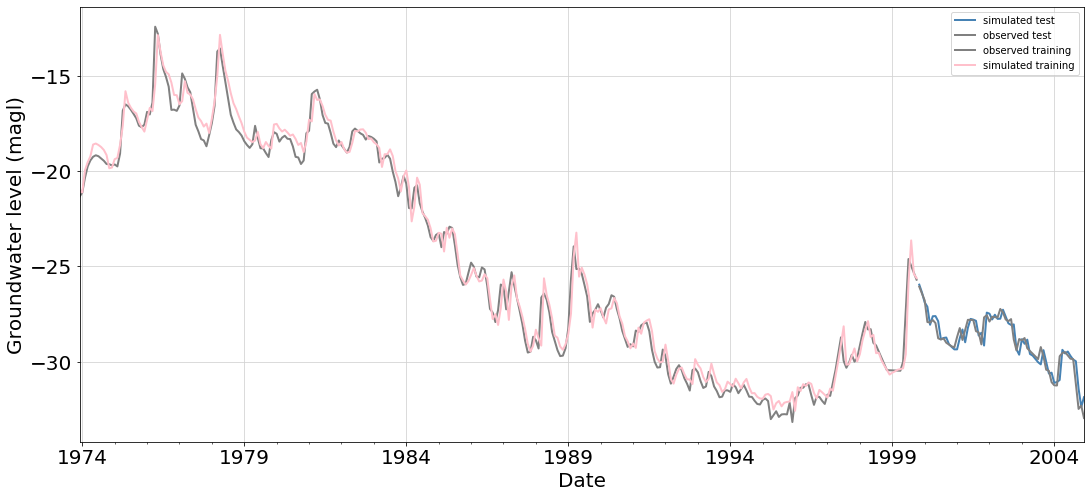

In [81]:
mse_ff = summary['mse_ff'].mean(axis=0)
rmse_ff= summary['rmse_ff'].mean(axis=0)
mae_ff = summary['mae_ff'].mean(axis=0)
r2_ff  = summary['r2_ff'].mean(axis=0)
stdv_ff= stdv.mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_ff, 3))
print("Mean squared error is:",round(mse_ff,3))
print("Root mean squared error is:",round(rmse_ff, 3))
print("Mean absolute error is:",round(mae_ff,3))


df1 = pd.DataFrame(test_inverse_trans[6].values, columns  = ['simulated test'],index  =pima.iloc[311:373].index)
df1['observed test']      = pima.iloc[311:373, 0].values

df2 = pd.DataFrame(pima.iloc[0:311, 0].values, columns = ['observed training'],index =pima.iloc[0:311].index)
df2['simulated training'] = train_inverse_trans[6].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [82]:
y_ff = out_df['simulated test']

## Static Models

In [83]:
pima2  = pima[['Discharge_log', 'Temperature_log', 'precip_trend_log', 'Abstraction_log', 't_1', 't_2','D4N0037']]

In [84]:
X = pima2[['Discharge_log' ,'precip_trend_log' ,'Discharge_log','Abstraction_log' ,'t_1', 't_2']].values
y = pima2['D4N0037'].values
y = y.reshape(-1,1)

In [85]:
from sklearn.model_selection import TimeSeriesSplit
tss = TimeSeriesSplit(n_splits = 5)
for train_index, test_index in tss.split(X):
    X_train, X_test = X[train_index, :], X[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(311, 6) (311, 1)
(62, 6) (62, 1)


In [86]:
def forecast(model, test_forecast, gwl, steps_ahead):
    y_pred = []
    current_output = gwl
    for step in range(steps_ahead):
        #print(test_forecast[step])
        input_test = np.concatenate([test_forecast[step][:-1], [current_output]])
        #input_test = [test_forecast[0][0][:-1], gwl]
        #print(input_test)
        pred = model.fit(input_test.reshape(1,1,6))
        y_pred.append(pred[0][0])
        #print(pred)
        current_output = pred[0][0]
    return y_pred

### Decision Tree

In [87]:
from sklearn.metrics import *
import numpy as np
import csv  

from sklearn.tree import DecisionTreeRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_dc', 'rmse_dc', 'r2_dc','mae_dc'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = DecisionTreeRegressor(max_features='auto') #random state is so i get same results whenever i run the regressor
    regressor.fit(X_train,y_train)
    y_dc = regressor.predict(X_test)

    #metrics for test
    y_dc = y_dc
    test_pred.append(y_dc)
    mse_dc = mean_squared_error(y_test, y_dc)
    rmse_dc = np.sqrt(mse_dc)
    r2_dc = r2_score(y_test, y_dc)
    mae_dc = mean_absolute_error(y_test, y_dc)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_dc,Round), round(rmse_dc,Round), round(r2_dc,Round),round(mae_dc,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(311, 6)
Running fold 2
(311, 6)
Running fold 3
(311, 6)
Running fold 4
(311, 6)
Running fold 5
(311, 6)
Running fold 6
(311, 6)
Running fold 7
(311, 6)
Running fold 8
(311, 6)
Running fold 9
(311, 6)
Running fold 10
(311, 6)


In [88]:
summary

Iteration_No  mse_dc  rmse_dc  r2_dc  mae_dc
0   Iteration_1   1.564    1.251  0.185   0.928
1   Iteration_2   1.465    1.210  0.237   0.886
2   Iteration_3   1.355    1.164  0.295   0.871
3   Iteration_4   0.884    0.940  0.540   0.711
4   Iteration_5   1.404    1.185  0.269   0.874
5   Iteration_6   1.380    1.175  0.281   0.875
6   Iteration_7   0.860    0.927  0.552   0.672
7   Iteration_8   1.535    1.239  0.201   0.929
8   Iteration_9   1.370    1.171  0.286   0.873
9  Iteration_10   1.556    1.248  0.189   0.922

In [89]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:311, 6].values

In [90]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.0
Root mean squared error is: 0.0
Mean absolute error is: 0.0
R^2 score is:  1.0

The model performance for the test set
--------------------------------------
R^2 score is:  0.303
Mean squared error is: 1.337
Root mean squared error is: 1.151
Mean absolute error is: 0.854


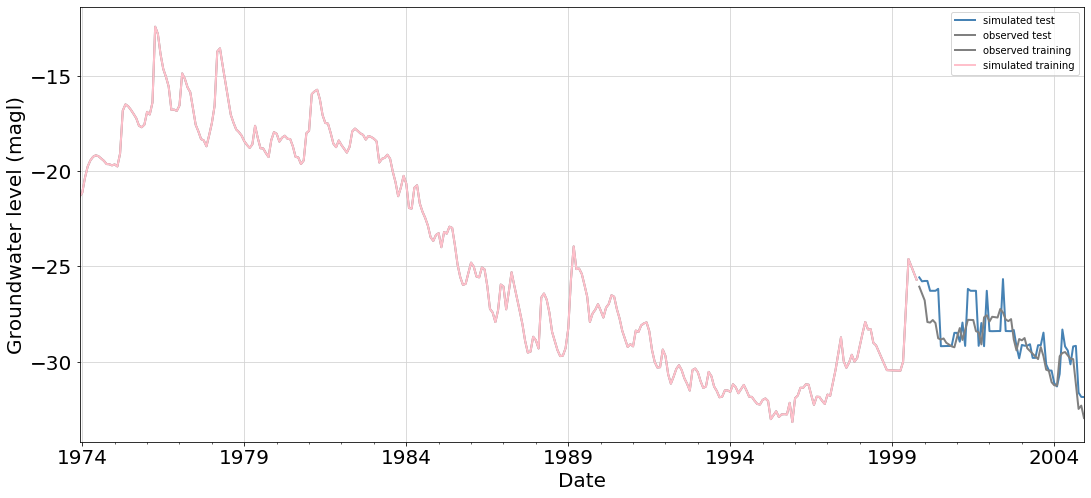

In [91]:
mse_dc = summary['mse_dc'].mean(axis=0)
rmse_dc = summary['rmse_dc'].mean(axis=0)
mae_dc = summary['mae_dc'].mean(axis=0)
r2_dc  = summary['r2_dc'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_dc, 3))
print("Mean squared error is:",round(mse_dc,3))
print("Root mean squared error is:",round(rmse_dc, 3))
print("Mean absolute error is:",round(mae_dc,3))




df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[311:373].index)
df1['observed test']      = pima.iloc[311:373, 0].values

df2 = pd.DataFrame(pima.iloc[0:311, 0].values, columns = ['observed training'],index =pima.iloc[0:311].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### SVR

In [92]:
from sklearn.svm import SVR

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_svr', 'rmse_svr', 'r2_svr','mae_svr'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)
    
    regressor = SVR(kernel='rbf', epsilon=0.1, C=1, degree=4 ,gamma='auto') 
    regressor.fit(X_train,y_train)
    y_svr = regressor.predict(X_test)

    #metrics for test
    y_svr = y_svr
    test_pred.append(y_svr)
    mse_svr = mean_squared_error(y_test, y_svr)
    rmse_svr = np.sqrt(mse_svr)
    r2_svr = r2_score(y_test, y_svr)
    mae_svr = mean_absolute_error(y_test, y_svr)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_svr,Round), round(rmse_svr,Round), round(r2_svr,Round),round(mae_svr,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(311, 6)
Running fold 2
(311, 6)
Running fold 3
(311, 6)
Running fold 4
(311, 6)
Running fold 5
(311, 6)
Running fold 6
(311, 6)
Running fold 7
(311, 6)
Running fold 8
(311, 6)
Running fold 9
(311, 6)
Running fold 10
(311, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

In [93]:
summary

Iteration_No  mse_svr  rmse_svr  r2_svr  mae_svr
0   Iteration_1    0.798     0.893   0.584    0.721
1   Iteration_2    0.798     0.893   0.584    0.721
2   Iteration_3    0.798     0.893   0.584    0.721
3   Iteration_4    0.798     0.893   0.584    0.721
4   Iteration_5    0.798     0.893   0.584    0.721
5   Iteration_6    0.798     0.893   0.584    0.721
6   Iteration_7    0.798     0.893   0.584    0.721
7   Iteration_8    0.798     0.893   0.584    0.721
8   Iteration_9    0.798     0.893   0.584    0.721
9  Iteration_10    0.798     0.893   0.584    0.721

In [94]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:311, 6].values

In [95]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.679
Root mean squared error is: 0.824
Mean absolute error is: 0.485
R^2 score is:  0.98

The model performance for the test set
--------------------------------------
R^2 score is:  0.584
Mean squared error is: 0.798
Root mean squared error is: 0.893
Mean absolute error is: 0.721


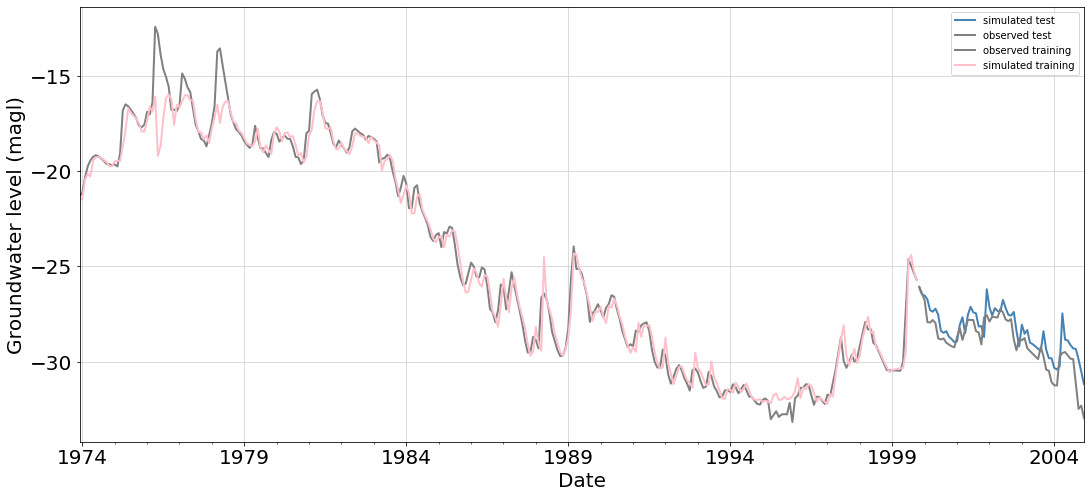

In [96]:
mse_svr  = summary['mse_svr'].mean(axis=0)
rmse_svr = summary['rmse_svr'].mean(axis=0)
mae_svr  = summary['mae_svr'].mean(axis=0)
r2_svr   = summary['r2_svr'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_svr, 3))
print("Mean squared error is:",round(mse_svr,3))
print("Root mean squared error is:",round(rmse_svr, 3))
print("Mean absolute error is:",round(mae_svr,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[311:373].index)
df1['observed test']      = pima.iloc[311:373, 0].values

df2 = pd.DataFrame(pima.iloc[0:311, 0].values, columns = ['observed training'],index =pima.iloc[0:311].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### GradientBoostingRegressor

In [97]:
from sklearn.ensemble import GradientBoostingRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_gb', 'rmse_gb', 'r2_gb','mae_gb'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)


    regressor = GradientBoostingRegressor()
    regressor.fit(X_train,y_train)
    y_gb = regressor.predict(X_test)

    #metrics for test
    y_gb = y_gb
    test_pred.append(y_gb)
    mse_gb = mean_squared_error(y_test, y_gb)
    rmse_gb = np.sqrt(mse_gb)
    r2_gb = r2_score(y_test, y_gb)
    mae_gb = mean_absolute_error(y_test, y_gb)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_gb,Round), round(rmse_gb,Round), round(r2_gb,Round),round(mae_gb,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(311, 6)
Running fold 2
(311, 6)
Running fold 3
(311, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Running fold 4
(311, 6)
Running fold 5
(311, 6)
Running fold 6
(311, 6)
Running fold 7
(311, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

Running fold 8
(311, 6)
Running fold 9
(311, 6)
Running fold 10
(311, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [98]:
summary

Iteration_No  mse_gb  rmse_gb  r2_gb  mae_gb
0   Iteration_1   0.700    0.836  0.636   0.701
1   Iteration_2   0.691    0.831  0.640   0.697
2   Iteration_3   0.742    0.861  0.614   0.722
3   Iteration_4   0.736    0.858  0.617   0.717
4   Iteration_5   0.736    0.858  0.617   0.718
5   Iteration_6   0.735    0.857  0.617   0.717
6   Iteration_7   0.700    0.836  0.636   0.704
7   Iteration_8   0.740    0.860  0.615   0.721
8   Iteration_9   0.696    0.834  0.638   0.703
9  Iteration_10   0.732    0.856  0.619   0.718

In [99]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:311, 6].values

In [100]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.098
Root mean squared error is: 0.312
Mean absolute error is: 0.244
R^2 score is:  0.997

The model performance for the test set
--------------------------------------
R^2 score is:  0.625
Mean squared error is: 0.721
Root mean squared error is: 0.849
Mean absolute error is: 0.712


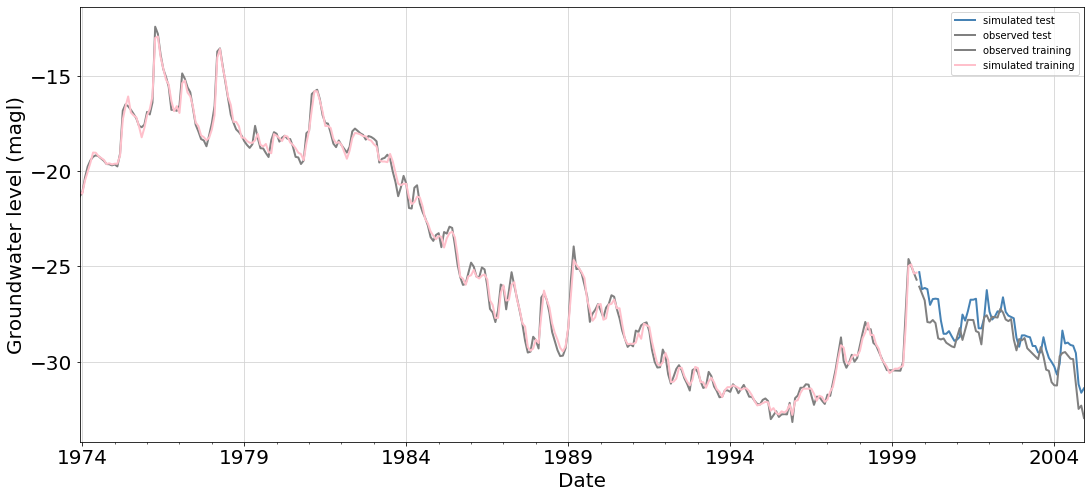

In [101]:
mse_gb  = summary['mse_gb'].mean(axis=0)
rmse_gb = summary['rmse_gb'].mean(axis=0)
mae_gb  = summary['mae_gb'].mean(axis=0)
r2_gb   = summary['r2_gb'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_gb, 3))
print("Mean squared error is:",round(mse_gb,3))
print("Root mean squared error is:",round(rmse_gb, 3))
print("Mean absolute error is:",round(mae_gb,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[311:373].index)
df1['observed test']      = pima.iloc[311:373, 0].values

df2 = pd.DataFrame(pima.iloc[0:311, 0].values, columns = ['observed training'],index =pima.iloc[0:311].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

### Randon Forest

In [102]:
from sklearn.ensemble import RandomForestRegressor

# rounding off
Round = 3      

train_pred = []
test_pred  = []

fields = ['Iteration_No', 'mse_rf', 'rmse_rf', 'r2_rf','mae_rf'] 
csvfile = open('Summary.csv', 'w') 
csvwriter = csv.writer(csvfile)  
csvwriter.writerow(fields) 

for fold in range(1,11):
    print(f'Running fold {fold}')
    print(X_train.shape)



    rf = RandomForestRegressor(n_estimators=10)
    rf.fit(X_train, y_train)
    y_rf = rf.predict(X_test)

    #metrics for test
    y_rf= y_rf
    test_pred.append(y_rf)
    mse_rf= mean_squared_error(y_test, y_rf)
    rmse_rf= np.sqrt(mse_rf)
    r2_rf= r2_score(y_test, y_rf)
    mae_rf= mean_absolute_error(y_test, y_rf)

    #metrics train 
    train     = regressor.predict(X_train)
    train_pred.append(train)
    msetrain  = mean_squared_error(y_train, train)
    rmsetrain = np.sqrt(msetrain)
    mae_train = mean_absolute_error(y_train, train)
    r2train   = r2_score(y_train, train)
    
    csvwriter.writerow([f'Iteration_{fold}',round(mse_rf,Round), round(rmse_rf,Round), round(r2_rf,Round),round(mae_rf,Round)]) 

csvfile.close()
summary= pd.read_csv('Summary.csv')
    

Running fold 1
(311, 6)
Running fold 2
(311, 6)
Running fold 3
(311, 6)
Running fold 4
(311, 6)
Running fold 5
(311, 6)
Running fold 6
(311, 6)
Running fold 7
(311, 6)
Running fold 8
(311, 6)
Running fold 9
(311, 6)
Running fold 10
(311, 6)


/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/yolanda/opt/anaconda3/lib/python3.7/site-

In [103]:
summary

Iteration_No  mse_rf  rmse_rf  r2_rf  mae_rf
0   Iteration_1   0.802    0.895  0.583   0.696
1   Iteration_2   0.470    0.686  0.755   0.556
2   Iteration_3   0.577    0.759  0.700   0.631
3   Iteration_4   0.473    0.688  0.754   0.538
4   Iteration_5   0.376    0.613  0.804   0.470
5   Iteration_6   0.726    0.852  0.622   0.659
6   Iteration_7   0.615    0.784  0.680   0.612
7   Iteration_8   0.540    0.735  0.719   0.606
8   Iteration_9   0.619    0.787  0.678   0.629
9  Iteration_10   0.683    0.827  0.644   0.640

In [104]:
it_1 = train_pred[:][0]
it_2 = train_pred[:][1]
it_3 = train_pred[:][2]
it_4 = train_pred[:][3]
it_5 = train_pred[:][4]
it_6 = train_pred[:][5]
it_7 = train_pred[:][6]
it_8 = train_pred[:][8]
it_9 = train_pred[:][9]
train_iterations = pd.DataFrame(data = it_1, columns= ["Iteration1"])
train_iterations['Iteration2'] = it_2
train_iterations['Iteration3'] = it_3
train_iterations['Iteration4'] = it_4
train_iterations['Iteration5'] = it_5
train_iterations['Iteration6'] = it_6
train_iterations['Iteration7'] = it_7
train_iterations['Iteration8'] = it_8
train_iterations['Iteration9'] = it_9
train_iterations['Mean'] =  train_iterations.mean(axis=1)
train_iterations['Stdv'] =  train_iterations.std(axis=1)
train_iterations['Max']  =  train_iterations['Mean'] + train_iterations['Stdv']
train_iterations['Min']  =  train_iterations['Mean'] - train_iterations['Stdv']
train_iterations['actual'] = pima1.iloc[0:311, 6].values

In [105]:
it_1t = test_pred[:][0]
it_2t = test_pred[:][1]
it_3t = test_pred[:][2]
it_4t = test_pred[:][3]
it_5t = test_pred[:][4]
it_6t = test_pred[:][5]
it_7t = test_pred[:][6]
it_8t = test_pred[:][8]
it_9t = test_pred[:][9]
test_iterations = pd.DataFrame(data = it_1t, columns= ["Iteration1"])
test_iterations['Iteration2'] = it_2t
test_iterations['Iteration3'] = it_3t
test_iterations['Iteration4'] = it_4t
test_iterations['Iteration5'] = it_5t
test_iterations['Iteration6'] = it_6t
test_iterations['Iteration7'] = it_7t
test_iterations['Iteration8'] = it_8t
test_iterations['Iteration9'] = it_9t
#test_iterations['Iteration10']= it_10t
test_iterations['Mean'] =  test_iterations.mean(axis=1)
test_iterations['Stdv'] =  test_iterations.std(axis=1)
test_iterations['Max']  =  test_iterations['Mean'] + test_iterations['Stdv']
test_iterations['Min']  =  test_iterations['Mean'] - test_iterations['Stdv']

The model performance for the train set
-------------------------------------------
Mean squared error is: 0.098
Root mean squared error is: 0.312
Mean absolute error is: 0.244
R^2 score is:  0.997

The model performance for the test set
--------------------------------------
R^2 score is:  0.694
Mean squared error is: 0.588
Root mean squared error is: 0.763
Mean absolute error is: 0.604


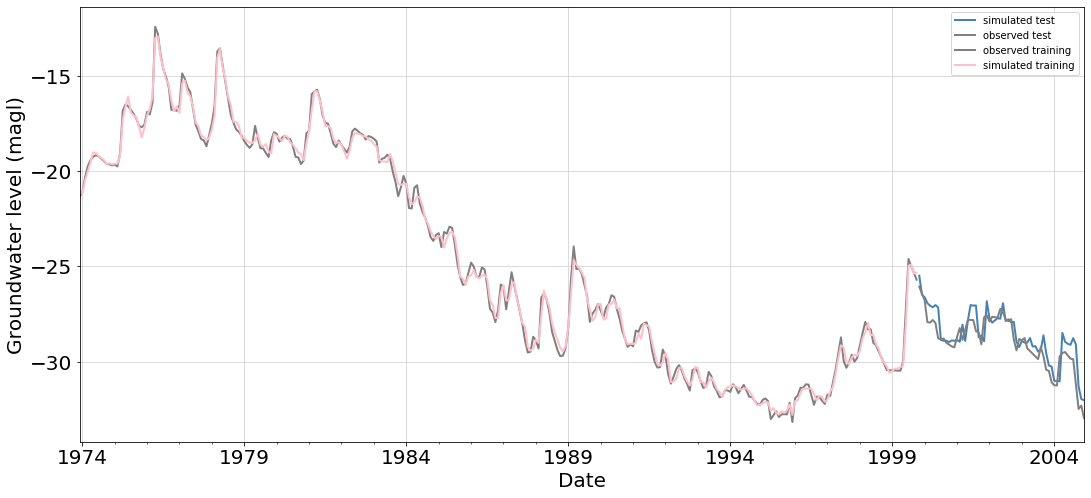

In [106]:
mse_rf  = summary['mse_rf'].mean(axis=0)
rmse_rf = summary['rmse_rf'].mean(axis=0)
mae_rf  = summary['mae_rf'].mean(axis=0)
r2_rf   = summary['r2_rf'].mean(axis=0)


print("The model performance for the train set")
print("-------------------------------------------")
print("Mean squared error is:",msetrain.round(3))
print("Root mean squared error is:",rmsetrain.round(3))
print("Mean absolute error is:",mae_train.round(3))
print("R^2 score is: ", r2train.round(3))
print("")

print("The model performance for the test set")
print("--------------------------------------")
print("R^2 score is: ",round(r2_rf, 3))
print("Mean squared error is:",round(mse_rf,3))
print("Root mean squared error is:",round(rmse_rf, 3))
print("Mean absolute error is:",round(mae_rf,3))



df1 = pd.DataFrame(test_iterations['Mean'].values, columns  = ['simulated test'],index  =pima.iloc[311:373].index)
df1['observed test']      = pima.iloc[311:373, 0].values

df2 = pd.DataFrame(pima.iloc[0:311, 0].values, columns = ['observed training'],index =pima.iloc[0:311].index)
df2['simulated training'] = train_iterations['Mean'].values

out_df = df2.append(df1, sort=True)

#plot
out_df['simulated test'].plot(color='steelblue', linewidth=2)
out_df['observed test'].plot(fontsize=20, color='grey', linewidth=2)
out_df['observed training'].plot(color='grey', linewidth=2)
out_df['simulated training'].plot(color='pink', linewidth=2)
plt.grid(axis='both', color='lightgrey')
plt.rcParams['axes.facecolor'] = 'w'
plt.xlabel("Date",fontsize=20)
plt.ylabel("Groundwater level (magl)",fontsize=20)
plt.legend(loc='best')
plt.gcf().set_size_inches(18,8)

In [109]:
vs = pd.DataFrame(pima.iloc[311:373, 0].values, columns = ['Observed'],index =pima.iloc[311:373].index)
vs['SVR'] = y_svr
vs['GB'] = y_gb
vs['RF'] = y_rf
vs['DC'] = y_dc
vs['LSTM'] = y_lstm
vs['GRU'] = y_gru
vs['FFNN'] = y_ff

Text(0, 0.5, 'Groundwater levels (magl)')

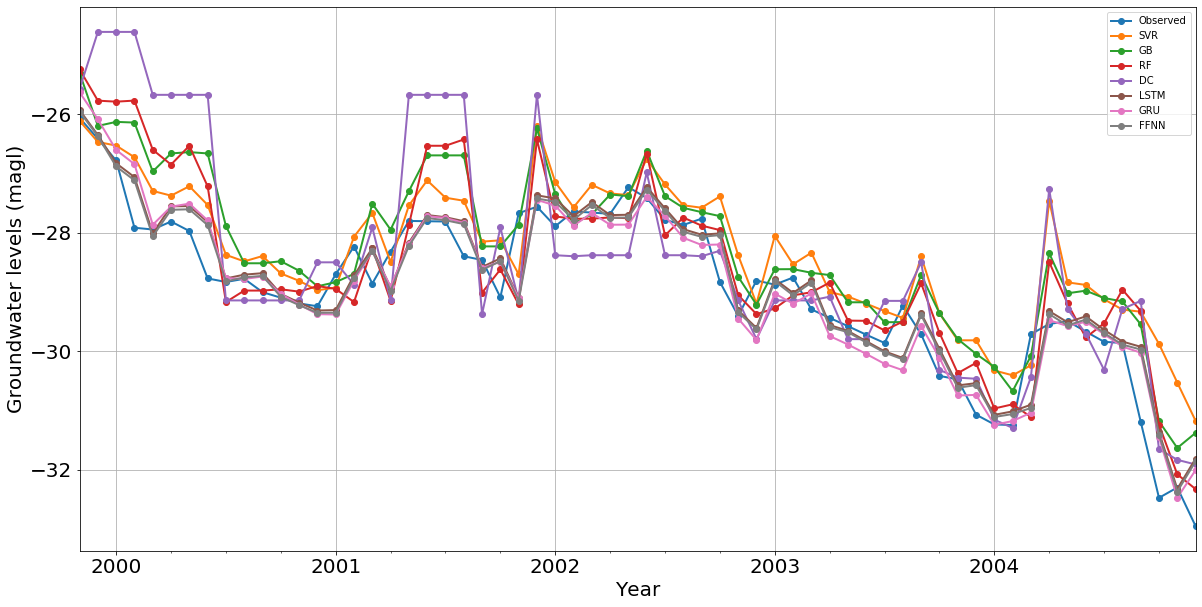

In [110]:
vs.plot(figsize=(20,10), linewidth=2, fontsize = 20, grid=True, marker='o')
plt.xlabel("Year",fontsize=20)
plt.ylabel("Groundwater levels (magl)",fontsize=20)